In [2]:
import os
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

from matplotlib import dates
import datetime

from heapq import nsmallest

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

import prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
import seaborn as sns

import warnings

In [3]:
def metrics(y, y_hat):
    koszt = 0
    for i in range(len(y)):
        #koszt += (y[i] - y_hat[i]) // 10 * 10 + ((y[i]- y_hat[i]) // 10 - 1) * 5
        koszt += math.floor(np.abs(y[i]-y_hat[i])) + (math.floor(np.abs(y[i]-y_hat[i])) // 10 ) * 5
    koszt = round(koszt * 30 / len(y), 4)
    mae = round(np.mean(np.abs(y - y_hat)), 4)
    rmse = round(np.sqrt(np.mean(np.square(y - y_hat))), 4)
    mape = round(np.mean(np.abs((y - y_hat)/y)*100), 4)
    max1 = round(np.max(np.abs(y - y_hat)), 4)
    print(mae)
    print(rmse)
    print(mape)
    print(max1)
    print(koszt)
    #print('\n')

In [4]:
# def shops_number(df):
    

In [5]:
holidays=['2020-01-01','2020-01-06','2020-04-12','2020-04-13','2020-05-01','2020-05-03',
          '2020-05-31', '2020-06-11','2020-08-15','2020-11-01','2020-11-11','2020-12-25',
          '2020-12-26','2021-01-01','2021-01-06','2021-04-04','2021-04-05','2021-05-01',
          '2021-05-03','2021-05-23','2021-06-03','2021-08-15','2021-11-01','2021-11-11',
          '2021-12-25','2021-12-26', '2022-01-01','2022-01-06', '2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05',
          '2022-04-27','2022-04-28','2022-04-29','2022-04-30',
          '2022-05-01', '2022-05-02','2022-05-03','2022-05-04',
          '2022-05-23','2022-06-03','2022-08-15','2022-11-01','2022-11-11',
          '2022-12-25','2022-12-26'
         ]

state = pd.DataFrame({'ds': pd.to_datetime(holidays),
                      'holiday': 'state_holiday'
                      })
holidays = state
holidays

,ds,holiday
0,2020-01-01,state_holiday
1,2020-01-06,state_holiday
2,2020-04-12,state_holiday
3,2020-04-13,state_holiday
4,2020-05-01,state_holiday
5,2020-05-03,state_holiday
6,2020-05-31,state_holiday
7,2020-06-11,state_holiday
8,2020-08-15,state_holiday
9,2020-11-01,state_holiday


In [6]:
path = os.getcwd()
files = os.listdir(path)
files

['czujniki_analiza(2).ipynb',
 'ZlecenieTransportowe 2021.xlsx',
 'Zakupy.html',
 '.~lock.zakupy 2021.xlsx#',
 'Czujniki_nowe_dane.ipynb',
 'Czujniki_nowe_dane(1).html',
 'ZlecenieTransportowe 2017.xlsx',
 '.~lock.ZlecenieTransportowe 2020.xlsx#',
 '.ipynb_checkpoints',
 'zakupy 2021.xlsx',
 'ZlecenieTransportowe 2016.xlsx',
 'czujniki_analiza(2).html',
 'ZlecenieTransportowe 2018.xlsx',
 'zakupy 2020.xlsx',
 'data',
 'Zakupy.ipynb',
 'ZlecenieTransportowe 2020.xlsx',
 'zakupy 2022.xlsx',
 'ZlecenieTransportowe 2019.xlsx',
 '.~lock.zakupy 2020.xlsx#']

In [7]:
files_csv = [f for f in files if f[:6] == 'zakupy']
files_csv

['zakupy 2021.xlsx', 'zakupy 2020.xlsx', 'zakupy 2022.xlsx']

In [8]:
df = pd.DataFrame()

In [9]:
for f in files_csv:
    data = pd.read_excel(f)
    df = df.append(data)

df.head(3)

/tmp/ipykernel_59476/3428239449.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
/tmp/ipykernel_59476/3428239449.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
/tmp/ipykernel_59476/3428239449.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


,NumerZlecenia,LokalizacjaAkcji,LokalizacjaPoczatkowa,LokalizacjaKoncowa,CzasPrzejazdu,PrzebytyDystans,SredniaPredkosc,OcenaJazdyExpress,OcenaPredkosciExpress,OcenaOgolnaExpress,...,SamochodId,NumerRejestracyjny,Subsystem,Stan,DataDodania,Uwagi,SklepTrafiszopId,NazwaSklepu,AdresSklepu,MiastoSklepu
0,ZT/2021/2248344,Kraków,"Kraków, Tyniecka 188","Kraków, Tyniecka 188",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,brak,Zamkniete,2021-01-01 12:05:50.7683578,Osoba kontaktowa: 508905857 | Godzina dostar...,4,SPOŁEM Kraków,Daszyńskiego 3 31-537 Kraków,Kraków
1,ZT/2021/2248353,Łódź,"Łódź, ul. Żeligowskiego 8/10 - 24h","Łódź, ul. Żeligowskiego 8/10 - 24h",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,brak,Zamkniete,2021-01-01 12:34:11.5504132,Osoba kontaktowa: 608824286 | Godzina dostar...,28,Carrefour Bandurskiego,Bandurskiego 49 94-020 Łódź,Łódź
2,ZT/2021/2248355,Katowice,"Katowice, Siemianowicka 52C - 24h","Katowice, Siemianowicka 52C - 24h",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,brak,Zamkniete,2021-01-01 13:02:39.4225176,Osoba kontaktowa: 511461537 Notatka klienta: ...,3,SPOŁEM Katowice,Mickiewicza 4 40-954 Katowice,Katowice


In [10]:
df=df.reset_index()
del df['index']

In [11]:
# df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155773 entries, 0 to 155772
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NumerZlecenia                 155773 non-null  object 
 1   LokalizacjaAkcji              154854 non-null  object 
 2   LokalizacjaPoczatkowa         155773 non-null  object 
 3   LokalizacjaKoncowa            155773 non-null  object 
 4   CzasPrzejazdu                 872 non-null     float64
 5   PrzebytyDystans               872 non-null     float64
 6   SredniaPredkosc               872 non-null     float64
 7   OcenaJazdyExpress             872 non-null     float64
 8   OcenaPredkosciExpress         872 non-null     float64
 9   OcenaOgolnaExpress            872 non-null     float64
 10  NajwyzszaPredkosc             872 non-null     float64
 11  OcenaRezerwacjiCms            0 non-null       float64
 12  IdWsparciaCms                 0 non-null    

In [12]:
#Lokalizacje akcji zapełnic miastem sklepu
df.LokalizacjaAkcji.fillna(df.MiastoSklepu, inplace=True)
df.head(3)

,NumerZlecenia,LokalizacjaAkcji,LokalizacjaPoczatkowa,LokalizacjaKoncowa,CzasPrzejazdu,PrzebytyDystans,SredniaPredkosc,OcenaJazdyExpress,OcenaPredkosciExpress,OcenaOgolnaExpress,...,SamochodId,NumerRejestracyjny,Subsystem,Stan,DataDodania,Uwagi,SklepTrafiszopId,NazwaSklepu,AdresSklepu,MiastoSklepu
0,ZT/2021/2248344,Kraków,"Kraków, Tyniecka 188","Kraków, Tyniecka 188",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,brak,Zamkniete,2021-01-01 12:05:50.7683578,Osoba kontaktowa: 508905857 | Godzina dostar...,4,SPOŁEM Kraków,Daszyńskiego 3 31-537 Kraków,Kraków
1,ZT/2021/2248353,Łódź,"Łódź, ul. Żeligowskiego 8/10 - 24h","Łódź, ul. Żeligowskiego 8/10 - 24h",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,brak,Zamkniete,2021-01-01 12:34:11.5504132,Osoba kontaktowa: 608824286 | Godzina dostar...,28,Carrefour Bandurskiego,Bandurskiego 49 94-020 Łódź,Łódź
2,ZT/2021/2248355,Katowice,"Katowice, Siemianowicka 52C - 24h","Katowice, Siemianowicka 52C - 24h",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,brak,Zamkniete,2021-01-01 13:02:39.4225176,Osoba kontaktowa: 511461537 Notatka klienta: ...,3,SPOŁEM Katowice,Mickiewicza 4 40-954 Katowice,Katowice


In [13]:
#Wyrzucenie kolumn z brakiem DatyRozpoczęcia / data rozpoczęcia może wystąpić w następnych dniach od planowanej
df = df.dropna(subset=['DataRozpoczecia'])

In [14]:
df=df.reset_index()
del df['index']

In [15]:
df['PlanowanaDataRozpoczecia']= pd.to_datetime(df['PlanowanaDataRozpoczecia'])
df['PlanowanaDataZakonczenia']= pd.to_datetime(df['PlanowanaDataZakonczenia'])
df['DataZakonczenia']= pd.to_datetime(df['DataZakonczenia'])
df['ZadeklarowanaData']= pd.to_datetime(df['ZadeklarowanaData'])
df['DataRozpoczecia']= pd.to_datetime(df['DataRozpoczecia'])
df['DataDodania']= pd.to_datetime(df['DataDodania'])

In [16]:
type(df['PlanowanaDataZakonczenia'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152792 entries, 0 to 152791
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   NumerZlecenia                 152792 non-null  object        
 1   LokalizacjaAkcji              152792 non-null  object        
 2   LokalizacjaPoczatkowa         152792 non-null  object        
 3   LokalizacjaKoncowa            152792 non-null  object        
 4   CzasPrzejazdu                 872 non-null     float64       
 5   PrzebytyDystans               872 non-null     float64       
 6   SredniaPredkosc               872 non-null     float64       
 7   OcenaJazdyExpress             872 non-null     float64       
 8   OcenaPredkosciExpress         872 non-null     float64       
 9   OcenaOgolnaExpress            872 non-null     float64       
 10  NajwyzszaPredkosc             872 non-null     float64       
 11  OcenaRezerwac

In [18]:
#Czy pozbyć się Stan - Anulowane / Anulowane w trakcie
print(len(df))

152792


In [19]:
#Wyrzucenie kolumn gdzie data zakonczenia jest przed data rozpoczecia
df = df[df['DataZakonczenia']>df['DataRozpoczecia']]
print(len(df))

152371


In [20]:
#Dodanie kolumny z numeryczna wartością dla dnia tygodnia(0-poniedziałek itd.)
#df['day_of_week'] = df['PlanowanaDataRozpoczecia'].dt.day_name() #wartość string
df['day_of_week'] = df['PlanowanaDataRozpoczecia'].dt.dayofweek #wartosć numeryczna


In [21]:
# Zliczanie liczby sklepow w poszczegolnych tygodniach
tmp_df = df
# tmp_df['DataRozpoczeciaDzien'] = pd.to_datetime(tmp_df['DataRozpoczecia']).dt.date
tmp_df.apply(lambda x: pd.Series([tmp_df['day_of_week']], index=['week_start_date']), axis=1)

for i, row in tmp_df.iterrows():
    start_time_day = tmp_df['DataRozpoczecia'][i].to_pydatetime()
    weekday = start_time_day.weekday()
    week_start = start_time_day - datetime.timedelta(days = weekday)
    week_start = week_start.date()
    tmp_df.at[i,'week_start'] = week_start


/home/bdroix/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Discarding nonzero nanoseconds in conversion.
  exec(code_obj, self.user_global_ns, self.user_ns)


week_start
2020-10-26    11
2020-11-02    11
2020-11-09    19
2020-11-16    33
2020-11-23    42
              ..
2022-07-25    24
2022-08-01    24
2022-08-08    25
2022-08-15    26
2022-08-22    25
Name: NazwaSklepu, Length: 96, dtype: int64


<AxesSubplot:xlabel='Tydzień w roku'>

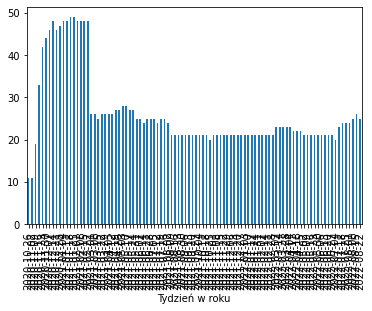

In [22]:
# Zliczanie liczby sklepow w poszczegolnych dniach
tmp_df['week_start'].head(10)
shops_num_by_date = tmp_df.groupby(tmp_df['week_start'])['NazwaSklepu'].nunique()
print(shops_num_by_date)
shops_num_by_date.plot(xlabel='Tydzień w roku',kind="bar")

In [23]:
#do zliczenia ilosci zamowien na dzien
df['Lp']=1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152371 entries, 0 to 152781
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   NumerZlecenia                 152371 non-null  object        
 1   LokalizacjaAkcji              152371 non-null  object        
 2   LokalizacjaPoczatkowa         152371 non-null  object        
 3   LokalizacjaKoncowa            152371 non-null  object        
 4   CzasPrzejazdu                 872 non-null     float64       
 5   PrzebytyDystans               872 non-null     float64       
 6   SredniaPredkosc               872 non-null     float64       
 7   OcenaJazdyExpress             872 non-null     float64       
 8   OcenaPredkosciExpress         872 non-null     float64       
 9   OcenaOgolnaExpress            872 non-null     float64       
 10  NajwyzszaPredkosc             872 non-null     float64       
 11  OcenaRezerwac

In [27]:
# usunięcie niedziel
df_weekdays = df[df['DataRozpoczecia'].dt.dayofweek < 6]
df_weekdays = df_weekdays.reset_index()
df_weekdays = df_weekdays.drop(columns=['index'])

df.info()
# test_df_no_weekdays.head(3)

print(len(df))
print(len(df_weekdays))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152371 entries, 0 to 152781
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   NumerZlecenia                 152371 non-null  object        
 1   LokalizacjaAkcji              152371 non-null  object        
 2   LokalizacjaPoczatkowa         152371 non-null  object        
 3   LokalizacjaKoncowa            152371 non-null  object        
 4   CzasPrzejazdu                 872 non-null     float64       
 5   PrzebytyDystans               872 non-null     float64       
 6   SredniaPredkosc               872 non-null     float64       
 7   OcenaJazdyExpress             872 non-null     float64       
 8   OcenaPredkosciExpress         872 non-null     float64       
 9   OcenaOgolnaExpress            872 non-null     float64       
 10  NajwyzszaPredkosc             872 non-null     float64       
 11  OcenaRezerwac

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2020-10-30 to 2020-12-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Lp      30 non-null     int64
dtypes: int64(1)
memory usage: 480.0+ bytes


<AxesSubplot:xlabel='Data', ylabel='Liczba zamowien'>

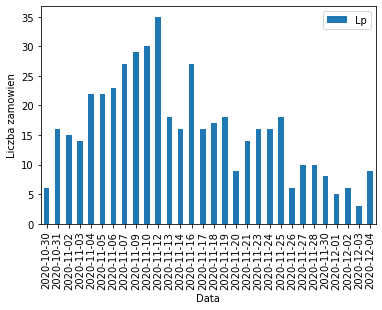

In [28]:
# dict z unikatowymi sklepami
unique_shops = df_weekdays['AdresSklepu'].unique()
shop_orders_dict = {}

for shop in unique_shops:
    shop_orders = df_weekdays.loc[df_weekdays['AdresSklepu'] == shop]
    shop_orders_dict[shop] = shop_orders


# przykladowe zamowienia dla sklepu
shop_names = list(shop_orders_dict.keys())
shop_orders_df = shop_orders_dict[shop_names[0]]
shop_data_sales_month = shop_orders_df.groupby(shop_orders_df['DataRozpoczecia'].dt.date).agg({"Lp":"sum"})
shop_data_sales_day = shop_orders_df.groupby(pd.to_datetime(shop_orders_df['DataRozpoczecia']).
dt.date).agg({"Lp":"sum"})

shop_data_sales_day = shop_data_sales_day[:30]
shop_data_sales_day.info()

shop_data_sales_day.plot(xlabel="Data", ylabel="Liczba zamowien", kind="bar")

In [31]:
# sprawdzanie czy dodany sklep wchodzi na rynek, czy przejmuje zamowienia innego sklepu
def check_if_new_shop(shop_address):
    
    few_orders_at_first_days = False
    rising_curve_of_orders = False
    few_orders_at_first_days_comparing_to_monthly_avg = False
    
#   1. sprawdzenie czy liczba zamowien w pierszym dniu funkcjonowania byla mala w porownaniu do sredniej
# dla innych sklepow z tego miasta
    
    shop_orders_df = shop_orders_dict[shop_address]
    sorted_shop_orders_df = shop_orders_df.sort_values(['DataRozpoczecia'])
    first_order = sorted_shop_orders_df.head(1)
#     shop_name = first_order['NazwaSklepu'][0]
#     shop_city = first_order['MiastoSklepu'][0]
#     first_order_date = first_order['DataRozpoczecia'].dt.date[0]

    shop_name = str(first_order['NazwaSklepu'].to_numpy()[0])
    shop_city = str(first_order['MiastoSklepu'].to_numpy()[0])
    first_order_date = first_order['DataRozpoczecia'].to_numpy()[0]
    d = pd.to_datetime(str(first_order_date)) 
    datestring = d.strftime('%Y-%m-%d')
    first_order_date = datetime.datetime.strptime(datestring, '%Y-%m-%d').date()
    print(shop_name)
    print(shop_city)
    print(first_order_date)
    
    shop_orders_on_date = sorted_shop_orders_df.loc[shop_orders_df['DataRozpoczecia'].dt.date == first_order_date]
    sum_shop_orders_on_date = shop_orders_on_date['Lp'].sum()
    avg_orders_for_city_on_date = fun_avg_orders_for_city_on_date(first_order_date, shop_city)
#     avg_orders_for_city_on_date = float(avg_orders_for_city_on_date.to_numpy()[0])
    avg_orders_for_city_on_date = float(avg_orders_for_city_on_date)

    print("AVG orders by shop in " + shop_city + " on " + str(first_order_date))
    print(avg_orders_for_city_on_date)
    print("Orders by shop " + shop_name + " on " + str(first_order_date))
    print(sum_shop_orders_on_date)
    
# porownanie liczby zamowien sklepu z liczba zamowien srednia dla danego miasta w danym dniu
    if sum_shop_orders_on_date < few_orders_at_first_days * 0.5:
        few_orders_at_first_days = True

#   2. Sprawdzenie czy krzywa zamowien w pierwszych 10 dniach jest rosnaca
    
    

sample = df.head(1)
address = sample['AdresSklepu'][0]
print(address)
check_if_new_shop(address)

Daszyńskiego 3  31-537 Kraków 
SPOŁEM Kraków
Kraków
2020-10-30


/tmp/ipykernel_59476/3915986557.py:16: RuntimeWarning: invalid value encountered in long_scalars
  city_date_avg_orders_dict[city] = num_of_city_date_orders/len(unique_shops_in_city_by_date)


AVG orders by shop in Kraków on 2020-10-30
3.0
Orders by shop SPOŁEM Kraków on 2020-10-30
6


In [34]:
# Wyznaczenie sredniej liczby zamowien we wszystkich sklepach w poszczegolnych miastach z danego dnia
# def avg_orders(date):

def fun_avg_orders_for_city_on_date(date, city_name):
    cities = df['MiastoSklepu'].unique()
    shop_orders_dict = {}

    orders_by_date = df.loc[df['DataRozpoczecia'].dt.date == date]
    city_date_avg_orders_dict = {}

    for city in cities:
        city_date_orders = orders_by_date.loc[df['MiastoSklepu'] == city]
        unique_shops_in_city_by_date = city_date_orders['AdresSklepu'].unique()
#         num_of_city_date_orders = city_date_orders.sum({"Lp":"sum"})
        num_of_city_date_orders = city_date_orders.count()['NumerZlecenia']
        city_date_avg_orders_dict[city] = num_of_city_date_orders/len(unique_shops_in_city_by_date)
    
    return(city_date_avg_orders_dict[city_name])
    
# city_orders_by_date = df.groupby('MiastoSklepu').count()['Lp']
# city_orders_by_date.head()

In [33]:
# wyznaczenie sredniej sprzedazy we wszystkich miastach w kazdym dniu
def avg_sales_in_cities():
    df = df_weekdays
    cities = df['MiastoSklepu'].unique()
    sorted_df = df.sort_values(['DataRozpoczecia'])
    first_date = sorted_df.head(1)['DataRozpoczecia'].to_numpy()[0]
    last_date = sorted_df.tail(1)['DataRozpoczecia'].to_numpy()[0]
    f = pd.to_datetime(str(first_date)) 
    l = pd.to_datetime(str(last_date)) 
    first_date = datetime.datetime.strptime(f.strftime('%Y-%m-%d'), '%Y-%m-%d').date()
    last_date = datetime.datetime.strptime(l.strftime('%Y-%m-%d'), '%Y-%m-%d').date()
    curr_date = first_date
    date_interval = datetime.timedelta(days=1)
    date_avg_dict = {} 
    city_avg_sales_dict = {}
    
    print(cities)
    
    for city in cities:
        curr_date = first_date
        i = 0
        while curr_date <= last_date:
            i+=1
            print(i)
            print(city)
            if curr_date.weekday() < 6:
                temp_df = df.loc[df['MiastoSklepu'] == city]
                temp_df = temp_df.loc[temp_df['DataRozpoczecia'].dt.date == curr_date]        
                unique_shops = temp_df.groupby(['NazwaSklepu']).nunique()
                if len(unique_shops) != 0:
                    date_avg_dict[curr_date] = len(temp_df)/len(unique_shops)
                else:
                    date_avg_dict[curr_date] = 0
            curr_date += date_interval
        date_avg_df = pd.DataFrame.from_dict({'date': date_avg_dict.keys(), 'avg': date_avg_dict.values()})
        city_avg_sales_dict[city] = date_avg_df
    return(city_avg_sales_dict)

city_avg_sales_dict = avg_sales_in_cities()


['Kraków' 'Łódź' 'Katowice' 'Warszawa' 'Wrocław' 'Poznań' 'Gdańsk'
 'Chorzów' 'Białystok' 'Lublin' 'Gliwice' 'Szczecin' 'Sosnowiec'
 'Bielsko-Biała' 'Piotrków Trybunalski' 'Bytom' 'Jaworzno' 'Rybnik'
 'Wołomin' 'Radom' 'Mińsk Mazowiecki']
1
Kraków
2
Kraków
3
Kraków
4
Kraków
5
Kraków
6
Kraków
7
Kraków
8
Kraków
9
Kraków
10
Kraków
11
Kraków
12
Kraków
13
Kraków
14
Kraków
15
Kraków
16
Kraków
17
Kraków
18
Kraków
19
Kraków
20
Kraków
21
Kraków
22
Kraków
23
Kraków
24
Kraków
25
Kraków
26
Kraków
27
Kraków
28
Kraków
29
Kraków
30
Kraków
31
Kraków
32
Kraków
33
Kraków
34
Kraków
35
Kraków
36
Kraków
37
Kraków
38
Kraków
39
Kraków
40
Kraków
41
Kraków
42
Kraków
43
Kraków
44
Kraków
45
Kraków
46
Kraków
47
Kraków
48
Kraków
49
Kraków
50
Kraków
51
Kraków
52
Kraków
53
Kraków
54
Kraków
55
Kraków
56
Kraków
57
Kraków
58
Kraków
59
Kraków
60
Kraków
61
Kraków
62
Kraków
63
Kraków
64
Kraków
65
Kraków
66
Kraków
67
Kraków
68
Kraków
69
Kraków
70
Kraków
71
Kraków
72
Kraków
73
Kraków
74
Kraków
75
Kraków
76
Kraków
77
Kraków


96
Łódź
97
Łódź
98
Łódź
99
Łódź
100
Łódź
101
Łódź
102
Łódź
103
Łódź
104
Łódź
105
Łódź
106
Łódź
107
Łódź
108
Łódź
109
Łódź
110
Łódź
111
Łódź
112
Łódź
113
Łódź
114
Łódź
115
Łódź
116
Łódź
117
Łódź
118
Łódź
119
Łódź
120
Łódź
121
Łódź
122
Łódź
123
Łódź
124
Łódź
125
Łódź
126
Łódź
127
Łódź
128
Łódź
129
Łódź
130
Łódź
131
Łódź
132
Łódź
133
Łódź
134
Łódź
135
Łódź
136
Łódź
137
Łódź
138
Łódź
139
Łódź
140
Łódź
141
Łódź
142
Łódź
143
Łódź
144
Łódź
145
Łódź
146
Łódź
147
Łódź
148
Łódź
149
Łódź
150
Łódź
151
Łódź
152
Łódź
153
Łódź
154
Łódź
155
Łódź
156
Łódź
157
Łódź
158
Łódź
159
Łódź
160
Łódź
161
Łódź
162
Łódź
163
Łódź
164
Łódź
165
Łódź
166
Łódź
167
Łódź
168
Łódź
169
Łódź
170
Łódź
171
Łódź
172
Łódź
173
Łódź
174
Łódź
175
Łódź
176
Łódź
177
Łódź
178
Łódź
179
Łódź
180
Łódź
181
Łódź
182
Łódź
183
Łódź
184
Łódź
185
Łódź
186
Łódź
187
Łódź
188
Łódź
189
Łódź
190
Łódź
191
Łódź
192
Łódź
193
Łódź
194
Łódź
195
Łódź
196
Łódź
197
Łódź
198
Łódź
199
Łódź
200
Łódź
201
Łódź
202
Łódź
203
Łódź
204
Łódź
205
Łódź
206
Łódź
207
Ł

252
Katowice
253
Katowice
254
Katowice
255
Katowice
256
Katowice
257
Katowice
258
Katowice
259
Katowice
260
Katowice
261
Katowice
262
Katowice
263
Katowice
264
Katowice
265
Katowice
266
Katowice
267
Katowice
268
Katowice
269
Katowice
270
Katowice
271
Katowice
272
Katowice
273
Katowice
274
Katowice
275
Katowice
276
Katowice
277
Katowice
278
Katowice
279
Katowice
280
Katowice
281
Katowice
282
Katowice
283
Katowice
284
Katowice
285
Katowice
286
Katowice
287
Katowice
288
Katowice
289
Katowice
290
Katowice
291
Katowice
292
Katowice
293
Katowice
294
Katowice
295
Katowice
296
Katowice
297
Katowice
298
Katowice
299
Katowice
300
Katowice
301
Katowice
302
Katowice
303
Katowice
304
Katowice
305
Katowice
306
Katowice
307
Katowice
308
Katowice
309
Katowice
310
Katowice
311
Katowice
312
Katowice
313
Katowice
314
Katowice
315
Katowice
316
Katowice
317
Katowice
318
Katowice
319
Katowice
320
Katowice
321
Katowice
322
Katowice
323
Katowice
324
Katowice
325
Katowice
326
Katowice
327
Katowice
328
Katowice

230
Warszawa
231
Warszawa
232
Warszawa
233
Warszawa
234
Warszawa
235
Warszawa
236
Warszawa
237
Warszawa
238
Warszawa
239
Warszawa
240
Warszawa
241
Warszawa
242
Warszawa
243
Warszawa
244
Warszawa
245
Warszawa
246
Warszawa
247
Warszawa
248
Warszawa
249
Warszawa
250
Warszawa
251
Warszawa
252
Warszawa
253
Warszawa
254
Warszawa
255
Warszawa
256
Warszawa
257
Warszawa
258
Warszawa
259
Warszawa
260
Warszawa
261
Warszawa
262
Warszawa
263
Warszawa
264
Warszawa
265
Warszawa
266
Warszawa
267
Warszawa
268
Warszawa
269
Warszawa
270
Warszawa
271
Warszawa
272
Warszawa
273
Warszawa
274
Warszawa
275
Warszawa
276
Warszawa
277
Warszawa
278
Warszawa
279
Warszawa
280
Warszawa
281
Warszawa
282
Warszawa
283
Warszawa
284
Warszawa
285
Warszawa
286
Warszawa
287
Warszawa
288
Warszawa
289
Warszawa
290
Warszawa
291
Warszawa
292
Warszawa
293
Warszawa
294
Warszawa
295
Warszawa
296
Warszawa
297
Warszawa
298
Warszawa
299
Warszawa
300
Warszawa
301
Warszawa
302
Warszawa
303
Warszawa
304
Warszawa
305
Warszawa
306
Warszawa

225
Wrocław
226
Wrocław
227
Wrocław
228
Wrocław
229
Wrocław
230
Wrocław
231
Wrocław
232
Wrocław
233
Wrocław
234
Wrocław
235
Wrocław
236
Wrocław
237
Wrocław
238
Wrocław
239
Wrocław
240
Wrocław
241
Wrocław
242
Wrocław
243
Wrocław
244
Wrocław
245
Wrocław
246
Wrocław
247
Wrocław
248
Wrocław
249
Wrocław
250
Wrocław
251
Wrocław
252
Wrocław
253
Wrocław
254
Wrocław
255
Wrocław
256
Wrocław
257
Wrocław
258
Wrocław
259
Wrocław
260
Wrocław
261
Wrocław
262
Wrocław
263
Wrocław
264
Wrocław
265
Wrocław
266
Wrocław
267
Wrocław
268
Wrocław
269
Wrocław
270
Wrocław
271
Wrocław
272
Wrocław
273
Wrocław
274
Wrocław
275
Wrocław
276
Wrocław
277
Wrocław
278
Wrocław
279
Wrocław
280
Wrocław
281
Wrocław
282
Wrocław
283
Wrocław
284
Wrocław
285
Wrocław
286
Wrocław
287
Wrocław
288
Wrocław
289
Wrocław
290
Wrocław
291
Wrocław
292
Wrocław
293
Wrocław
294
Wrocław
295
Wrocław
296
Wrocław
297
Wrocław
298
Wrocław
299
Wrocław
300
Wrocław
301
Wrocław
302
Wrocław
303
Wrocław
304
Wrocław
305
Wrocław
306
Wrocław
307
Wrocław
308


278
Poznań
279
Poznań
280
Poznań
281
Poznań
282
Poznań
283
Poznań
284
Poznań
285
Poznań
286
Poznań
287
Poznań
288
Poznań
289
Poznań
290
Poznań
291
Poznań
292
Poznań
293
Poznań
294
Poznań
295
Poznań
296
Poznań
297
Poznań
298
Poznań
299
Poznań
300
Poznań
301
Poznań
302
Poznań
303
Poznań
304
Poznań
305
Poznań
306
Poznań
307
Poznań
308
Poznań
309
Poznań
310
Poznań
311
Poznań
312
Poznań
313
Poznań
314
Poznań
315
Poznań
316
Poznań
317
Poznań
318
Poznań
319
Poznań
320
Poznań
321
Poznań
322
Poznań
323
Poznań
324
Poznań
325
Poznań
326
Poznań
327
Poznań
328
Poznań
329
Poznań
330
Poznań
331
Poznań
332
Poznań
333
Poznań
334
Poznań
335
Poznań
336
Poznań
337
Poznań
338
Poznań
339
Poznań
340
Poznań
341
Poznań
342
Poznań
343
Poznań
344
Poznań
345
Poznań
346
Poznań
347
Poznań
348
Poznań
349
Poznań
350
Poznań
351
Poznań
352
Poznań
353
Poznań
354
Poznań
355
Poznań
356
Poznań
357
Poznań
358
Poznań
359
Poznań
360
Poznań
361
Poznań
362
Poznań
363
Poznań
364
Poznań
365
Poznań
366
Poznań
367
Poznań
368
Poznań

374
Gdańsk
375
Gdańsk
376
Gdańsk
377
Gdańsk
378
Gdańsk
379
Gdańsk
380
Gdańsk
381
Gdańsk
382
Gdańsk
383
Gdańsk
384
Gdańsk
385
Gdańsk
386
Gdańsk
387
Gdańsk
388
Gdańsk
389
Gdańsk
390
Gdańsk
391
Gdańsk
392
Gdańsk
393
Gdańsk
394
Gdańsk
395
Gdańsk
396
Gdańsk
397
Gdańsk
398
Gdańsk
399
Gdańsk
400
Gdańsk
401
Gdańsk
402
Gdańsk
403
Gdańsk
404
Gdańsk
405
Gdańsk
406
Gdańsk
407
Gdańsk
408
Gdańsk
409
Gdańsk
410
Gdańsk
411
Gdańsk
412
Gdańsk
413
Gdańsk
414
Gdańsk
415
Gdańsk
416
Gdańsk
417
Gdańsk
418
Gdańsk
419
Gdańsk
420
Gdańsk
421
Gdańsk
422
Gdańsk
423
Gdańsk
424
Gdańsk
425
Gdańsk
426
Gdańsk
427
Gdańsk
428
Gdańsk
429
Gdańsk
430
Gdańsk
431
Gdańsk
432
Gdańsk
433
Gdańsk
434
Gdańsk
435
Gdańsk
436
Gdańsk
437
Gdańsk
438
Gdańsk
439
Gdańsk
440
Gdańsk
441
Gdańsk
442
Gdańsk
443
Gdańsk
444
Gdańsk
445
Gdańsk
446
Gdańsk
447
Gdańsk
448
Gdańsk
449
Gdańsk
450
Gdańsk
451
Gdańsk
452
Gdańsk
453
Gdańsk
454
Gdańsk
455
Gdańsk
456
Gdańsk
457
Gdańsk
458
Gdańsk
459
Gdańsk
460
Gdańsk
461
Gdańsk
462
Gdańsk
463
Gdańsk
464
Gdańsk

430
Chorzów
431
Chorzów
432
Chorzów
433
Chorzów
434
Chorzów
435
Chorzów
436
Chorzów
437
Chorzów
438
Chorzów
439
Chorzów
440
Chorzów
441
Chorzów
442
Chorzów
443
Chorzów
444
Chorzów
445
Chorzów
446
Chorzów
447
Chorzów
448
Chorzów
449
Chorzów
450
Chorzów
451
Chorzów
452
Chorzów
453
Chorzów
454
Chorzów
455
Chorzów
456
Chorzów
457
Chorzów
458
Chorzów
459
Chorzów
460
Chorzów
461
Chorzów
462
Chorzów
463
Chorzów
464
Chorzów
465
Chorzów
466
Chorzów
467
Chorzów
468
Chorzów
469
Chorzów
470
Chorzów
471
Chorzów
472
Chorzów
473
Chorzów
474
Chorzów
475
Chorzów
476
Chorzów
477
Chorzów
478
Chorzów
479
Chorzów
480
Chorzów
481
Chorzów
482
Chorzów
483
Chorzów
484
Chorzów
485
Chorzów
486
Chorzów
487
Chorzów
488
Chorzów
489
Chorzów
490
Chorzów
491
Chorzów
492
Chorzów
493
Chorzów
494
Chorzów
495
Chorzów
496
Chorzów
497
Chorzów
498
Chorzów
499
Chorzów
500
Chorzów
501
Chorzów
502
Chorzów
503
Chorzów
504
Chorzów
505
Chorzów
506
Chorzów
507
Chorzów
508
Chorzów
509
Chorzów
510
Chorzów
511
Chorzów
512
Chorzów
513


394
Białystok
395
Białystok
396
Białystok
397
Białystok
398
Białystok
399
Białystok
400
Białystok
401
Białystok
402
Białystok
403
Białystok
404
Białystok
405
Białystok
406
Białystok
407
Białystok
408
Białystok
409
Białystok
410
Białystok
411
Białystok
412
Białystok
413
Białystok
414
Białystok
415
Białystok
416
Białystok
417
Białystok
418
Białystok
419
Białystok
420
Białystok
421
Białystok
422
Białystok
423
Białystok
424
Białystok
425
Białystok
426
Białystok
427
Białystok
428
Białystok
429
Białystok
430
Białystok
431
Białystok
432
Białystok
433
Białystok
434
Białystok
435
Białystok
436
Białystok
437
Białystok
438
Białystok
439
Białystok
440
Białystok
441
Białystok
442
Białystok
443
Białystok
444
Białystok
445
Białystok
446
Białystok
447
Białystok
448
Białystok
449
Białystok
450
Białystok
451
Białystok
452
Białystok
453
Białystok
454
Białystok
455
Białystok
456
Białystok
457
Białystok
458
Białystok
459
Białystok
460
Białystok
461
Białystok
462
Białystok
463
Białystok
464
Białystok
465
Bi

413
Lublin
414
Lublin
415
Lublin
416
Lublin
417
Lublin
418
Lublin
419
Lublin
420
Lublin
421
Lublin
422
Lublin
423
Lublin
424
Lublin
425
Lublin
426
Lublin
427
Lublin
428
Lublin
429
Lublin
430
Lublin
431
Lublin
432
Lublin
433
Lublin
434
Lublin
435
Lublin
436
Lublin
437
Lublin
438
Lublin
439
Lublin
440
Lublin
441
Lublin
442
Lublin
443
Lublin
444
Lublin
445
Lublin
446
Lublin
447
Lublin
448
Lublin
449
Lublin
450
Lublin
451
Lublin
452
Lublin
453
Lublin
454
Lublin
455
Lublin
456
Lublin
457
Lublin
458
Lublin
459
Lublin
460
Lublin
461
Lublin
462
Lublin
463
Lublin
464
Lublin
465
Lublin
466
Lublin
467
Lublin
468
Lublin
469
Lublin
470
Lublin
471
Lublin
472
Lublin
473
Lublin
474
Lublin
475
Lublin
476
Lublin
477
Lublin
478
Lublin
479
Lublin
480
Lublin
481
Lublin
482
Lublin
483
Lublin
484
Lublin
485
Lublin
486
Lublin
487
Lublin
488
Lublin
489
Lublin
490
Lublin
491
Lublin
492
Lublin
493
Lublin
494
Lublin
495
Lublin
496
Lublin
497
Lublin
498
Lublin
499
Lublin
500
Lublin
501
Lublin
502
Lublin
503
Lublin

463
Gliwice
464
Gliwice
465
Gliwice
466
Gliwice
467
Gliwice
468
Gliwice
469
Gliwice
470
Gliwice
471
Gliwice
472
Gliwice
473
Gliwice
474
Gliwice
475
Gliwice
476
Gliwice
477
Gliwice
478
Gliwice
479
Gliwice
480
Gliwice
481
Gliwice
482
Gliwice
483
Gliwice
484
Gliwice
485
Gliwice
486
Gliwice
487
Gliwice
488
Gliwice
489
Gliwice
490
Gliwice
491
Gliwice
492
Gliwice
493
Gliwice
494
Gliwice
495
Gliwice
496
Gliwice
497
Gliwice
498
Gliwice
499
Gliwice
500
Gliwice
501
Gliwice
502
Gliwice
503
Gliwice
504
Gliwice
505
Gliwice
506
Gliwice
507
Gliwice
508
Gliwice
509
Gliwice
510
Gliwice
511
Gliwice
512
Gliwice
513
Gliwice
514
Gliwice
515
Gliwice
516
Gliwice
517
Gliwice
518
Gliwice
519
Gliwice
520
Gliwice
521
Gliwice
522
Gliwice
523
Gliwice
524
Gliwice
525
Gliwice
526
Gliwice
527
Gliwice
528
Gliwice
529
Gliwice
530
Gliwice
531
Gliwice
532
Gliwice
533
Gliwice
534
Gliwice
535
Gliwice
536
Gliwice
537
Gliwice
538
Gliwice
539
Gliwice
540
Gliwice
541
Gliwice
542
Gliwice
543
Gliwice
544
Gliwice
545
Gliwice
546


453
Szczecin
454
Szczecin
455
Szczecin
456
Szczecin
457
Szczecin
458
Szczecin
459
Szczecin
460
Szczecin
461
Szczecin
462
Szczecin
463
Szczecin
464
Szczecin
465
Szczecin
466
Szczecin
467
Szczecin
468
Szczecin
469
Szczecin
470
Szczecin
471
Szczecin
472
Szczecin
473
Szczecin
474
Szczecin
475
Szczecin
476
Szczecin
477
Szczecin
478
Szczecin
479
Szczecin
480
Szczecin
481
Szczecin
482
Szczecin
483
Szczecin
484
Szczecin
485
Szczecin
486
Szczecin
487
Szczecin
488
Szczecin
489
Szczecin
490
Szczecin
491
Szczecin
492
Szczecin
493
Szczecin
494
Szczecin
495
Szczecin
496
Szczecin
497
Szczecin
498
Szczecin
499
Szczecin
500
Szczecin
501
Szczecin
502
Szczecin
503
Szczecin
504
Szczecin
505
Szczecin
506
Szczecin
507
Szczecin
508
Szczecin
509
Szczecin
510
Szczecin
511
Szczecin
512
Szczecin
513
Szczecin
514
Szczecin
515
Szczecin
516
Szczecin
517
Szczecin
518
Szczecin
519
Szczecin
520
Szczecin
521
Szczecin
522
Szczecin
523
Szczecin
524
Szczecin
525
Szczecin
526
Szczecin
527
Szczecin
528
Szczecin
529
Szczecin

400
Sosnowiec
401
Sosnowiec
402
Sosnowiec
403
Sosnowiec
404
Sosnowiec
405
Sosnowiec
406
Sosnowiec
407
Sosnowiec
408
Sosnowiec
409
Sosnowiec
410
Sosnowiec
411
Sosnowiec
412
Sosnowiec
413
Sosnowiec
414
Sosnowiec
415
Sosnowiec
416
Sosnowiec
417
Sosnowiec
418
Sosnowiec
419
Sosnowiec
420
Sosnowiec
421
Sosnowiec
422
Sosnowiec
423
Sosnowiec
424
Sosnowiec
425
Sosnowiec
426
Sosnowiec
427
Sosnowiec
428
Sosnowiec
429
Sosnowiec
430
Sosnowiec
431
Sosnowiec
432
Sosnowiec
433
Sosnowiec
434
Sosnowiec
435
Sosnowiec
436
Sosnowiec
437
Sosnowiec
438
Sosnowiec
439
Sosnowiec
440
Sosnowiec
441
Sosnowiec
442
Sosnowiec
443
Sosnowiec
444
Sosnowiec
445
Sosnowiec
446
Sosnowiec
447
Sosnowiec
448
Sosnowiec
449
Sosnowiec
450
Sosnowiec
451
Sosnowiec
452
Sosnowiec
453
Sosnowiec
454
Sosnowiec
455
Sosnowiec
456
Sosnowiec
457
Sosnowiec
458
Sosnowiec
459
Sosnowiec
460
Sosnowiec
461
Sosnowiec
462
Sosnowiec
463
Sosnowiec
464
Sosnowiec
465
Sosnowiec
466
Sosnowiec
467
Sosnowiec
468
Sosnowiec
469
Sosnowiec
470
Sosnowiec
471
So

260
Bielsko-Biała
261
Bielsko-Biała
262
Bielsko-Biała
263
Bielsko-Biała
264
Bielsko-Biała
265
Bielsko-Biała
266
Bielsko-Biała
267
Bielsko-Biała
268
Bielsko-Biała
269
Bielsko-Biała
270
Bielsko-Biała
271
Bielsko-Biała
272
Bielsko-Biała
273
Bielsko-Biała
274
Bielsko-Biała
275
Bielsko-Biała
276
Bielsko-Biała
277
Bielsko-Biała
278
Bielsko-Biała
279
Bielsko-Biała
280
Bielsko-Biała
281
Bielsko-Biała
282
Bielsko-Biała
283
Bielsko-Biała
284
Bielsko-Biała
285
Bielsko-Biała
286
Bielsko-Biała
287
Bielsko-Biała
288
Bielsko-Biała
289
Bielsko-Biała
290
Bielsko-Biała
291
Bielsko-Biała
292
Bielsko-Biała
293
Bielsko-Biała
294
Bielsko-Biała
295
Bielsko-Biała
296
Bielsko-Biała
297
Bielsko-Biała
298
Bielsko-Biała
299
Bielsko-Biała
300
Bielsko-Biała
301
Bielsko-Biała
302
Bielsko-Biała
303
Bielsko-Biała
304
Bielsko-Biała
305
Bielsko-Biała
306
Bielsko-Biała
307
Bielsko-Biała
308
Bielsko-Biała
309
Bielsko-Biała
310
Bielsko-Biała
311
Bielsko-Biała
312
Bielsko-Biała
313
Bielsko-Biała
314
Bielsko-Biała
315
Bielsk

40
Piotrków Trybunalski
41
Piotrków Trybunalski
42
Piotrków Trybunalski
43
Piotrków Trybunalski
44
Piotrków Trybunalski
45
Piotrków Trybunalski
46
Piotrków Trybunalski
47
Piotrków Trybunalski
48
Piotrków Trybunalski
49
Piotrków Trybunalski
50
Piotrków Trybunalski
51
Piotrków Trybunalski
52
Piotrków Trybunalski
53
Piotrków Trybunalski
54
Piotrków Trybunalski
55
Piotrków Trybunalski
56
Piotrków Trybunalski
57
Piotrków Trybunalski
58
Piotrków Trybunalski
59
Piotrków Trybunalski
60
Piotrków Trybunalski
61
Piotrków Trybunalski
62
Piotrków Trybunalski
63
Piotrków Trybunalski
64
Piotrków Trybunalski
65
Piotrków Trybunalski
66
Piotrków Trybunalski
67
Piotrków Trybunalski
68
Piotrków Trybunalski
69
Piotrków Trybunalski
70
Piotrków Trybunalski
71
Piotrków Trybunalski
72
Piotrków Trybunalski
73
Piotrków Trybunalski
74
Piotrków Trybunalski
75
Piotrków Trybunalski
76
Piotrków Trybunalski
77
Piotrków Trybunalski
78
Piotrków Trybunalski
79
Piotrków Trybunalski
80
Piotrków Trybunalski
81
Piotrków Tryb

373
Piotrków Trybunalski
374
Piotrków Trybunalski
375
Piotrków Trybunalski
376
Piotrków Trybunalski
377
Piotrków Trybunalski
378
Piotrków Trybunalski
379
Piotrków Trybunalski
380
Piotrków Trybunalski
381
Piotrków Trybunalski
382
Piotrków Trybunalski
383
Piotrków Trybunalski
384
Piotrków Trybunalski
385
Piotrków Trybunalski
386
Piotrków Trybunalski
387
Piotrków Trybunalski
388
Piotrków Trybunalski
389
Piotrków Trybunalski
390
Piotrków Trybunalski
391
Piotrków Trybunalski
392
Piotrków Trybunalski
393
Piotrków Trybunalski
394
Piotrków Trybunalski
395
Piotrków Trybunalski
396
Piotrków Trybunalski
397
Piotrków Trybunalski
398
Piotrków Trybunalski
399
Piotrków Trybunalski
400
Piotrków Trybunalski
401
Piotrków Trybunalski
402
Piotrków Trybunalski
403
Piotrków Trybunalski
404
Piotrków Trybunalski
405
Piotrków Trybunalski
406
Piotrków Trybunalski
407
Piotrków Trybunalski
408
Piotrków Trybunalski
409
Piotrków Trybunalski
410
Piotrków Trybunalski
411
Piotrków Trybunalski
412
Piotrków Trybunalski


100
Bytom
101
Bytom
102
Bytom
103
Bytom
104
Bytom
105
Bytom
106
Bytom
107
Bytom
108
Bytom
109
Bytom
110
Bytom
111
Bytom
112
Bytom
113
Bytom
114
Bytom
115
Bytom
116
Bytom
117
Bytom
118
Bytom
119
Bytom
120
Bytom
121
Bytom
122
Bytom
123
Bytom
124
Bytom
125
Bytom
126
Bytom
127
Bytom
128
Bytom
129
Bytom
130
Bytom
131
Bytom
132
Bytom
133
Bytom
134
Bytom
135
Bytom
136
Bytom
137
Bytom
138
Bytom
139
Bytom
140
Bytom
141
Bytom
142
Bytom
143
Bytom
144
Bytom
145
Bytom
146
Bytom
147
Bytom
148
Bytom
149
Bytom
150
Bytom
151
Bytom
152
Bytom
153
Bytom
154
Bytom
155
Bytom
156
Bytom
157
Bytom
158
Bytom
159
Bytom
160
Bytom
161
Bytom
162
Bytom
163
Bytom
164
Bytom
165
Bytom
166
Bytom
167
Bytom
168
Bytom
169
Bytom
170
Bytom
171
Bytom
172
Bytom
173
Bytom
174
Bytom
175
Bytom
176
Bytom
177
Bytom
178
Bytom
179
Bytom
180
Bytom
181
Bytom
182
Bytom
183
Bytom
184
Bytom
185
Bytom
186
Bytom
187
Bytom
188
Bytom
189
Bytom
190
Bytom
191
Bytom
192
Bytom
193
Bytom
194
Bytom
195
Bytom
196
Bytom
197
Bytom
198
Bytom
199
Bytom


208
Jaworzno
209
Jaworzno
210
Jaworzno
211
Jaworzno
212
Jaworzno
213
Jaworzno
214
Jaworzno
215
Jaworzno
216
Jaworzno
217
Jaworzno
218
Jaworzno
219
Jaworzno
220
Jaworzno
221
Jaworzno
222
Jaworzno
223
Jaworzno
224
Jaworzno
225
Jaworzno
226
Jaworzno
227
Jaworzno
228
Jaworzno
229
Jaworzno
230
Jaworzno
231
Jaworzno
232
Jaworzno
233
Jaworzno
234
Jaworzno
235
Jaworzno
236
Jaworzno
237
Jaworzno
238
Jaworzno
239
Jaworzno
240
Jaworzno
241
Jaworzno
242
Jaworzno
243
Jaworzno
244
Jaworzno
245
Jaworzno
246
Jaworzno
247
Jaworzno
248
Jaworzno
249
Jaworzno
250
Jaworzno
251
Jaworzno
252
Jaworzno
253
Jaworzno
254
Jaworzno
255
Jaworzno
256
Jaworzno
257
Jaworzno
258
Jaworzno
259
Jaworzno
260
Jaworzno
261
Jaworzno
262
Jaworzno
263
Jaworzno
264
Jaworzno
265
Jaworzno
266
Jaworzno
267
Jaworzno
268
Jaworzno
269
Jaworzno
270
Jaworzno
271
Jaworzno
272
Jaworzno
273
Jaworzno
274
Jaworzno
275
Jaworzno
276
Jaworzno
277
Jaworzno
278
Jaworzno
279
Jaworzno
280
Jaworzno
281
Jaworzno
282
Jaworzno
283
Jaworzno
284
Jaworzno

220
Rybnik
221
Rybnik
222
Rybnik
223
Rybnik
224
Rybnik
225
Rybnik
226
Rybnik
227
Rybnik
228
Rybnik
229
Rybnik
230
Rybnik
231
Rybnik
232
Rybnik
233
Rybnik
234
Rybnik
235
Rybnik
236
Rybnik
237
Rybnik
238
Rybnik
239
Rybnik
240
Rybnik
241
Rybnik
242
Rybnik
243
Rybnik
244
Rybnik
245
Rybnik
246
Rybnik
247
Rybnik
248
Rybnik
249
Rybnik
250
Rybnik
251
Rybnik
252
Rybnik
253
Rybnik
254
Rybnik
255
Rybnik
256
Rybnik
257
Rybnik
258
Rybnik
259
Rybnik
260
Rybnik
261
Rybnik
262
Rybnik
263
Rybnik
264
Rybnik
265
Rybnik
266
Rybnik
267
Rybnik
268
Rybnik
269
Rybnik
270
Rybnik
271
Rybnik
272
Rybnik
273
Rybnik
274
Rybnik
275
Rybnik
276
Rybnik
277
Rybnik
278
Rybnik
279
Rybnik
280
Rybnik
281
Rybnik
282
Rybnik
283
Rybnik
284
Rybnik
285
Rybnik
286
Rybnik
287
Rybnik
288
Rybnik
289
Rybnik
290
Rybnik
291
Rybnik
292
Rybnik
293
Rybnik
294
Rybnik
295
Rybnik
296
Rybnik
297
Rybnik
298
Rybnik
299
Rybnik
300
Rybnik
301
Rybnik
302
Rybnik
303
Rybnik
304
Rybnik
305
Rybnik
306
Rybnik
307
Rybnik
308
Rybnik
309
Rybnik
310
Rybnik

286
Wołomin
287
Wołomin
288
Wołomin
289
Wołomin
290
Wołomin
291
Wołomin
292
Wołomin
293
Wołomin
294
Wołomin
295
Wołomin
296
Wołomin
297
Wołomin
298
Wołomin
299
Wołomin
300
Wołomin
301
Wołomin
302
Wołomin
303
Wołomin
304
Wołomin
305
Wołomin
306
Wołomin
307
Wołomin
308
Wołomin
309
Wołomin
310
Wołomin
311
Wołomin
312
Wołomin
313
Wołomin
314
Wołomin
315
Wołomin
316
Wołomin
317
Wołomin
318
Wołomin
319
Wołomin
320
Wołomin
321
Wołomin
322
Wołomin
323
Wołomin
324
Wołomin
325
Wołomin
326
Wołomin
327
Wołomin
328
Wołomin
329
Wołomin
330
Wołomin
331
Wołomin
332
Wołomin
333
Wołomin
334
Wołomin
335
Wołomin
336
Wołomin
337
Wołomin
338
Wołomin
339
Wołomin
340
Wołomin
341
Wołomin
342
Wołomin
343
Wołomin
344
Wołomin
345
Wołomin
346
Wołomin
347
Wołomin
348
Wołomin
349
Wołomin
350
Wołomin
351
Wołomin
352
Wołomin
353
Wołomin
354
Wołomin
355
Wołomin
356
Wołomin
357
Wołomin
358
Wołomin
359
Wołomin
360
Wołomin
361
Wołomin
362
Wołomin
363
Wołomin
364
Wołomin
365
Wołomin
366
Wołomin
367
Wołomin
368
Wołomin
369


381
Radom
382
Radom
383
Radom
384
Radom
385
Radom
386
Radom
387
Radom
388
Radom
389
Radom
390
Radom
391
Radom
392
Radom
393
Radom
394
Radom
395
Radom
396
Radom
397
Radom
398
Radom
399
Radom
400
Radom
401
Radom
402
Radom
403
Radom
404
Radom
405
Radom
406
Radom
407
Radom
408
Radom
409
Radom
410
Radom
411
Radom
412
Radom
413
Radom
414
Radom
415
Radom
416
Radom
417
Radom
418
Radom
419
Radom
420
Radom
421
Radom
422
Radom
423
Radom
424
Radom
425
Radom
426
Radom
427
Radom
428
Radom
429
Radom
430
Radom
431
Radom
432
Radom
433
Radom
434
Radom
435
Radom
436
Radom
437
Radom
438
Radom
439
Radom
440
Radom
441
Radom
442
Radom
443
Radom
444
Radom
445
Radom
446
Radom
447
Radom
448
Radom
449
Radom
450
Radom
451
Radom
452
Radom
453
Radom
454
Radom
455
Radom
456
Radom
457
Radom
458
Radom
459
Radom
460
Radom
461
Radom
462
Radom
463
Radom
464
Radom
465
Radom
466
Radom
467
Radom
468
Radom
469
Radom
470
Radom
471
Radom
472
Radom
473
Radom
474
Radom
475
Radom
476
Radom
477
Radom
478
Radom
479
Radom
480
Radom


269
Mińsk Mazowiecki
270
Mińsk Mazowiecki
271
Mińsk Mazowiecki
272
Mińsk Mazowiecki
273
Mińsk Mazowiecki
274
Mińsk Mazowiecki
275
Mińsk Mazowiecki
276
Mińsk Mazowiecki
277
Mińsk Mazowiecki
278
Mińsk Mazowiecki
279
Mińsk Mazowiecki
280
Mińsk Mazowiecki
281
Mińsk Mazowiecki
282
Mińsk Mazowiecki
283
Mińsk Mazowiecki
284
Mińsk Mazowiecki
285
Mińsk Mazowiecki
286
Mińsk Mazowiecki
287
Mińsk Mazowiecki
288
Mińsk Mazowiecki
289
Mińsk Mazowiecki
290
Mińsk Mazowiecki
291
Mińsk Mazowiecki
292
Mińsk Mazowiecki
293
Mińsk Mazowiecki
294
Mińsk Mazowiecki
295
Mińsk Mazowiecki
296
Mińsk Mazowiecki
297
Mińsk Mazowiecki
298
Mińsk Mazowiecki
299
Mińsk Mazowiecki
300
Mińsk Mazowiecki
301
Mińsk Mazowiecki
302
Mińsk Mazowiecki
303
Mińsk Mazowiecki
304
Mińsk Mazowiecki
305
Mińsk Mazowiecki
306
Mińsk Mazowiecki
307
Mińsk Mazowiecki
308
Mińsk Mazowiecki
309
Mińsk Mazowiecki
310
Mińsk Mazowiecki
311
Mińsk Mazowiecki
312
Mińsk Mazowiecki
313
Mińsk Mazowiecki
314
Mińsk Mazowiecki
315
Mińsk Mazowiecki
316
Mińsk Maz

<AxesSubplot:xlabel='Dzień'>

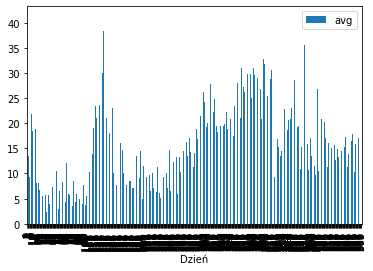

In [35]:
# wykres sredniej sprzedazy w danym miescie w danym dniu
# temp_date_avg_df = date_avg_df[0:100]

city_avg_sales_df = city_avg_sales_dict['Warszawa']
city_avg_sales_df.plot(xlabel="Dzień",kind="bar")
# date_avg_df[0:100].plot(xlabel="Dzień",kind="bar")

In [36]:
def regression_of_orders_marketwise(shop_address, days):
    shop_orders_df = shop_orders_dict[shop_address]
    sorted_shop_orders_df = shop_orders_df.sort_values(['DataRozpoczecia'])
    first_order = sorted_shop_orders_df.head(1)
    first_date = first_order['DataRozpoczecia'].to_numpy()[0]
    f = pd.to_datetime(str(first_date)) 
    first_date = datetime.datetime.strptime(f.strftime('%Y-%m-%d'), '%Y-%m-%d').date()
    city = str(first_order['MiastoSklepu'].to_numpy()[0])
    city_avg_sales_df = city_avg_sales_dict[city]
    
    subset_shop_orders_df = shop_orders_df[:days]
    subset_shop_orders_df = shop_orders_df.groupby(pd.to_datetime(shop_orders_df['DataRozpoczecia']).
    dt.date).agg({"Lp":"sum"})[:days]
    subset_shop_orders_dict = subset_shop_orders_df.to_dict()['Lp']
    shop_orders = list(subset_shop_orders_dict.values())
    dates = list(subset_shop_orders_dict.keys())    
    
#     id rzedu df w ktorym znajduje sie dana z data first_date
    start_idx = city_avg_sales_df.index[city_avg_sales_df['date'] == first_date].tolist()[0]
#     podzbior danych dotyczacych sredniej ilosci zamowien dla miasta
    subset_city_avg_sales_df = city_avg_sales_df[start_idx:start_idx+days]
#     lista srednich ilosci zamowien
    city_avg_sales = list(subset_city_avg_sales_df['avg'])
#     lista stosunku sprzedazy w sklepie do sprzedarzy sredniej w miescie danego dnia

    ratios_list = []
    for s, c in zip(shop_orders, city_avg_sales):
        if c != 0:
            ratios_list.append(s/c)
        else:
            ratios_list.append(0)

#     dict dzien - stosunek sprzedazy
    
    day_ratio_dict = {}
    for i in range(len(ratios_list)):
        day_ratio_dict[dates[i]] = ratios_list[i]
        
    day_ratio_df = pd.DataFrame.from_dict({'date': day_ratio_dict.keys(), 'ratio': day_ratio_dict.values()})
    day_ratio_df.set_index(['date'], inplace=True, drop=True)
    return (day_ratio_df)
#     day_ratio_df.plot(xlabel="Data", ylabel="Stosunek liczby zamowien dla sklepu do sredniej liczby zamowien w miescie",kind="bar")
    
# sample = df.head(1)
# address = sample['AdresSklepu'][0]
# print(address)
# regression_of_orders_marketwise(address, 10)

In [37]:
# stworznie modelu wejscia nowego sklepu dla miasta na podst. regresji wzgl rynku
def new_shop_model_for_city(city, days=100):
    city_ratios_lists = []
    ratios_sum_list = []
    avg_city_ratios_list = []
    
    for key, value in shop_orders_dict.items():
        address = key
        orders_df = value
        first_order = orders_df.head(1)
        shop_city = str(first_order['MiastoSklepu'].to_numpy()[0])
        if shop_city == city:
            day_ratio_df = regression_of_orders_marketwise(address, days)
#             print(len(list(day_ratio_df['ratio'])))
            
            if (len(list(day_ratio_df['ratio']))) == days:
                city_ratios_lists.append(list(day_ratio_df['ratio']))    
    
#     print(city)
#     print(len(city_ratios_lists))
    for i in range(days):  
        for ratio_list in city_ratios_lists:
            if len(ratios_sum_list) < i+1:
                ratios_sum_list.append(ratio_list[i])
            else:
                ratios_sum_list[i] += ratio_list[i]
                
    
       
    avg_city_ratios_list = [r / len(city_ratios_lists) for r in ratios_sum_list]
    avg_city_ratios_dict = {}
    for it in range(1, len(avg_city_ratios_list)+1):
        avg_city_ratios_dict[it] = avg_city_ratios_list[it-1]
    
#     jesli nie ma sklepow w miescie ktore dzialaja przez okreslona przez wywolujacego funkcje ilosc dni

    if len(city_ratios_lists)>0:
        day_ratio_df = pd.DataFrame(avg_city_ratios_dict.items(), columns=['Day', 'Orders'])
    else:
        day_ratio_df = None
#     return day_ratio_df
#     day_ratio_df.set_index(['Day'], inplace=True, drop=True)
    return [day_ratio_df, len(city_ratios_lists)]
#     day_ratio_df.plot(xlabel="Data", ylabel="Sredni stosunek liczby zamowien dla sklepu do sredniej liczby zamowien w miescie",kind="bar")


# cities = df['MiastoSklepu'].unique()
# for city in cities:

In [38]:
def mixed_new_shop_model_for_city(city, days=500):
    mixed_avg_list = []
    mixed_dates_list = []
    for days in range(10, days, 10):
        temp_model_df = new_shop_model_for_city(city, days)[0]
        if temp_model_df is not None:
            mixed_avg_list.extend(temp_model_df['Orders'][-10:])
    #         print(mixed_avg_list)
            mixed_dates_list = temp_model_df['Day']
        
    avg_dict = {}
    i = 0
    for date in mixed_dates_list:
        avg_dict[date] = mixed_avg_list[i]
        i += 1
    
    avg_df = pd.DataFrame(avg_dict.items(), columns=['Day', 'Order'])
    x_data = avg_df['Day']
    y_data = avg_df['Order']
    y_data = list(np.array(y_data)*1)
    avg_df.set_index(['Day'], inplace=True, drop=True)
#     plt.figure(figsize=(20, 10))
#     avg_df.plot(xlabel="Data", ylabel="Sredni stosunek liczby zamowien dla sklepu do sredniej liczby zamowien w miescie",kind="bar")
    return avg_df
    
# regresja logarytmiczna
#     fit = np.polyfit(x_data, np.log(y_data), 1)
#     a = np.exp(fit[1])
#     b = fit[0]
#     y_model = a * np.exp(b * x_data)
    
#     print(y_model[:50])
    
# #     ax = plt.axes()
#     plt.figure(figsize=(20, 10))
# #     plt.scatter(x_data[-100:], y_data[-100:], label='Raw data')
#     plt.plot(x_data[:], y_model[:], 'k', label='Fitted curve')
#     plt.ylim((0.5, 1.5))
               
#     ax.set_title('Using polyfit() to fit an exponential function')
#     ax.set_ylabel('y-Values')
#     ax.set_ylim(0, 500)
#     ax.set_xlabel('x-Values')
#     ax.legend()
#     print(fit)


#     parametry funkcji regresji liniowej
#     sns.lmplot(x ="Dzien", y ="Sredni stosunek liczby zamowien", data = avg_df, order = 1, ci = None)
#     lm = LinearRegression()
#     model = lm.fit(avg_df['Dzien'].values.reshape(-1, 1), avg_df['Sredni stosunek liczby zamowien'].values)
#     print(f'b = {model.intercept_}')
#     print(f'a = {model.coef_[0]}')

    
# city = 'Lublin'
# mix_df = mixed_new_shop_model_for_city(city)


In [39]:
city_list = ['Kraków' 'Łódź' 'Katowice' 'Warszawa' 'Wrocław' 'Poznań' 'Gdańsk'
 'Chorzów' 'Białystok' 'Lublin' 'Gliwice' 'Szczecin' 'Sosnowiec'
 'Bielsko-Biała' 'Piotrków Trybunalski' 'Bytom' 'Jaworzno' 'Rybnik'
 'Wołomin' 'Radom' 'Mińsk Mazowiecki']

big_city_list = ['Kraków' 'Łódź' 'Katowice' 'Warszawa' 'Wrocław' 'Poznań' 'Gdańsk' 'Szczecin']
warsaw = ['Warszawa']

In [128]:
# mixed model for whole country
    
def mixed_new_shop_model_for_country(days=365):
    cities = df['MiastoSklepu'].unique()
    
    all_days_mixed_avg_days = []
    all_days_mixed_avg_list = []
    for days in range(10, days+10, 10):
        shop_counter = 0
        mixed_avg_list = []
        mixed_dates_list = []
        mixed_sum_list = []

        for city in cities:        
            temp_model_df = new_shop_model_for_city(city, days)[0]
            num_of_shops = new_shop_model_for_city(city, days)[1]
            if temp_model_df is not None:
                mixed_avg_list.append(list(np.array(temp_model_df['Orders'][-10:])*num_of_shops))
                mixed_dates_list = list(temp_model_df['Day'])
                shop_counter += num_of_shops

        for i in range(len(mixed_avg_list[0])):
            for avg_list in mixed_avg_list:
                if len(mixed_sum_list) < i+1:
                    mixed_sum_list.append(avg_list[i])
                else:
                    mixed_sum_list[i] += avg_list[i]
#         print(days)
#         print("SHOPS")
#         print(shop_counter)
        mixed_avg_list = list(np.array(mixed_sum_list)/shop_counter)
#         print("MIXED AVG LIST")
#         print(mixed_avg_list)
        all_days_mixed_avg_list.extend(mixed_avg_list)
        all_days_mixed_avg_days = mixed_dates_list
#     print("Mixed AVG list")
#     print(all_days_mixed_avg_list)
    
    avg_dict = {}
    i = 0
    for date in all_days_mixed_avg_days:
        avg_dict[date] = all_days_mixed_avg_list[i]
        i += 1

    avg_df = pd.DataFrame(avg_dict.items(), columns=['Day', 'Order'])
#     avg_df.set_index(['Day'], inplace=True, drop=True)
    return avg_df

# avg_df = mixed_new_shop_model_for_country()
    

<AxesSubplot:xlabel='Dzien', ylabel='Sredni stosunek liczby zamowien dla sklepu do sredniej liczby zamowien w miescie'>

<Figure size 2160x1080 with 0 Axes>

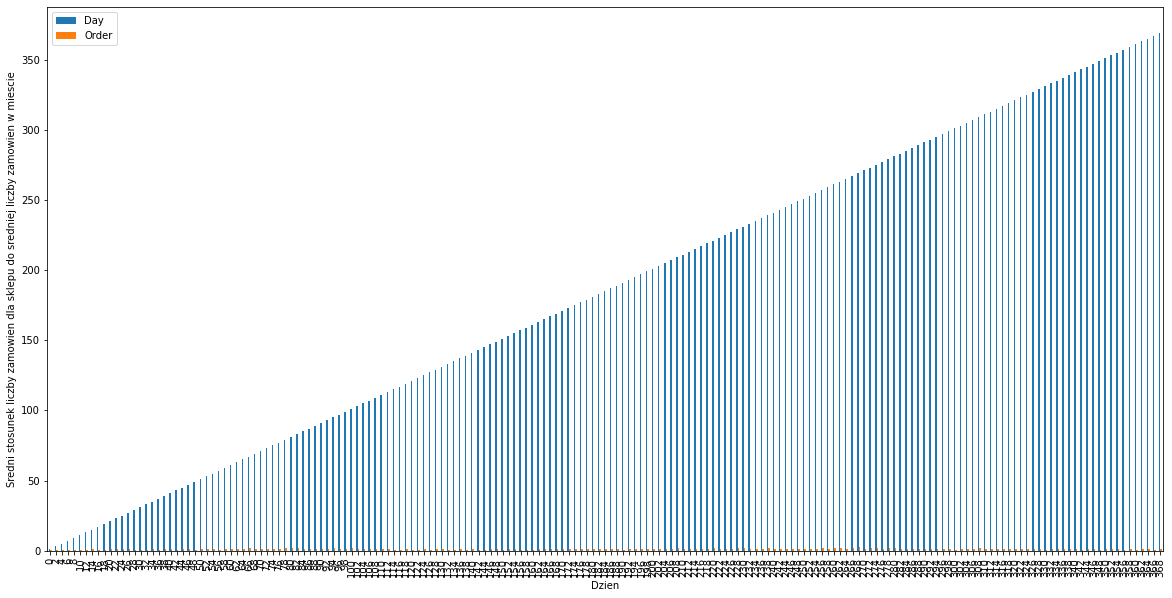

In [42]:
avg_df.head()
temp_avg_df = pd.DataFrame()

temp_avg_df['Day'] = avg_df['Day'][::2]
temp_avg_df['Order'] = avg_df['Order'][::2]


plt.figure(figsize=(30, 15))
temp_avg_df.plot(figsize = (20, 10), grid=None, xlabel="Dzien", ylabel="Sredni stosunek liczby zamowien dla sklepu do sredniej liczby zamowien w miescie",kind="bar")


In [43]:
# porownanie modeli zwyklego i laczonego dla Warszawy
city = 'Warszawa'
# standard_df = new_shop_model_for_city(city)

mix_orders = mix_df['Orders']
std_orders = std_df['Orders']

days = list(np.arange(1, 101, 1, dtype=int))

heights_a = mix_orders
heights_b = std_orders
position = days
colors = ['blue', 'red', 'green']

plt.figure()

for x, ha, hb in zip(position, heights_a, heights_b):
    for i, (h, c) in enumerate(sorted(zip([ha, hb], colors))):
        plt.bar(x, h, color=c, zorder=-i)

plt.show()

# print(mix_df.head())
# print(standard_df.head())
# print(len(standard_df))
# print(len(mix_df))


NameError: name 'mix_df' is not defined

Daszyńskiego 3  31-537 Kraków 
b = 14.875151515151519
a = -0.13792379237923796


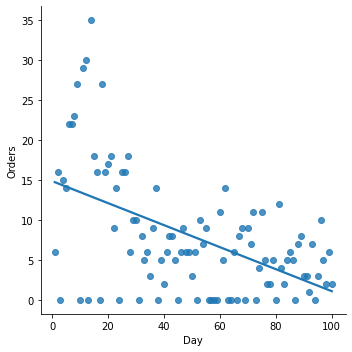

In [44]:
def regression_of_orders(shop_address, days_forward=100):
    shop_orders_df = shop_orders_dict[shop_address]
    sorted_shop_orders_df = shop_orders_df.sort_values(['DataRozpoczecia'])
    first_order = sorted_shop_orders_df.head(1)
#     first_order_date = first_order['DataRozpoczecia'].dt.date[0]
    first_order_date = first_order['DataRozpoczecia'].to_numpy()[0]
    d = pd.to_datetime(str(first_order_date)) 
    datestring = d.strftime('%Y-%m-%d')
    first_order_date = datetime.datetime.strptime(datestring, '%Y-%m-%d').date()
    date_orders_dict = {}
    day_orders_dict = {}
    
    time_delta = datetime.timedelta(days=days_forward)
    order_date = first_order_date
    day_it = 1

    while order_date < first_order_date + time_delta:
        shop_orders_on_date = sorted_shop_orders_df.loc[shop_orders_df['DataRozpoczecia'].dt.date == order_date]
        sum_shop_orders_on_date = shop_orders_on_date['Lp'].sum()
        date_orders_dict[order_date] = sum_shop_orders_on_date
        day_orders_dict[day_it] = sum_shop_orders_on_date
        order_date += datetime.timedelta(days=1)
        day_it += 1
    
    day_orders_df = pd.DataFrame.from_dict({'X': day_orders_dict.keys(), 'Y': day_orders_dict.values()})
    date_orders_df = pd.DataFrame.from_dict({'X': day_orders_dict.keys(), 'Y': day_orders_dict.values()})
    day_orders_df.columns = ['Day', 'Orders']
    date_orders_df.columns = ['Day', 'Orders']

    sns.lmplot(x ="Day", y ="Orders", data = day_orders_df, order = 1, ci = None)
    
#     parametry funkcji regresji liniowej
    lm = LinearRegression()
    model = lm.fit(day_orders_df['Day'].values.reshape(-1, 1), day_orders_df['Orders'].values)
    print(f'b = {model.intercept_}')
    print(f'a = {model.coef_[0]}')
    
sample = df.head(1)
address = sample['AdresSklepu'][0]
print(address)
regression_of_orders(address)

In [45]:
def avg_orders_in_first_days_by_city(days):
    cities = df['MiastoSklepu'].unique()
    cities_orders_in_first_days = {}
    cities_avg_in_first_days = {}
    
    for city in cities:
        for shop_id, orders_df in shop_orders_dict.items():
            if orders_df.head(1)['MiastoSklepu'].to_numpy()[0] == city:

#         sortowanie rekordow dotyczacych sprzedazy w df dla danego sklepu
                orders_df = orders_df.sort_values(['DataRozpoczecia'])
#             data pierwszego zamowienia danego sklepu, ktory znajduje sie w danym miescie
                first_order = orders_df.head(1)
                first_order_date = first_order['DataRozpoczecia'].to_numpy()[0]
                d = pd.to_datetime(str(first_order_date)) 
                datestring = d.strftime('%Y-%m-%d')
                first_order_date = datetime.datetime.strptime(datestring, '%Y-%m-%d').date()
        
                order_date = first_order_date
                time_delta = datetime.timedelta(days=days)
                day_orders_dict = {}
                date_orders_dict = {}
                day_it = 1
                
                while order_date < first_order_date + time_delta:
                    orders_on_date = orders_df.loc[orders_df['DataRozpoczecia'].dt.date == order_date]
                    sum_orders_on_date = orders_on_date['Lp'].sum()
                    date_orders_dict[order_date] = sum_orders_on_date
                    day_orders_dict[day_it] = sum_orders_on_date
                    order_date += datetime.timedelta(days=1)
                    day_it += 1
                
                day_orders_list = list(day_orders_dict.values())
                
                if city not in cities_orders_in_first_days.keys():
                    cities_orders_in_first_days[city] = [day_orders_list]
                else:
                    cities_orders_in_first_days[city].append(day_orders_list)
    
#     print(cities_orders_in_first_days['Kraków'])
                    
# jest dict z list list zamowien dla kolejnych dni dla wszystkich sklepow z danego miasta
# tworzymi dict w ktorym lista list zostanie zastapiona lista z usrednionymi wartosciami ilosci zamowien
# dla danego miasta
    for city_name, city_orders in cities_orders_in_first_days.items():
        avg_list = []
        sum_list = []
        order_list_len = len(city_orders[0])
        it = 0
        while it < order_list_len:
            for order_list in city_orders:
                if it >= len(sum_list):
                    sum_list.append(order_list[it])
                else:
                    sum_list[it] += order_list[it]
            avg_list[:] = [x / len(city_orders) for x in sum_list]
            it += 1
                    
        cities_avg_in_first_days[city_name] = avg_list
        cities_avg_in_first_days_dfs = {}

    for city, avg in cities_avg_in_first_days.items():
        cities_avg_in_first_days_dfs[city] = pd.DataFrame(avg)
        cities_avg_in_first_days_dfs[city].columns =['Avg Orders']
    
    return (cities_avg_in_first_days_dfs)
    
#     print(cities_avg_in_first_days_dfs['Kraków'])

# cities_avg = avg_orders_in_first_days_by_city(100)
# cities_avg['Warszawa'].plot(xlabel='Dzien dzialanosci',kind="bar")


In [46]:
def avg_orders_in_first_days(days):
    orders_list = []
    for shop_id, orders_df in shop_orders_dict.items():
#         sortowanie rekordow dotyczacych sprzedazy w df dla danego sklepu
        orders_df = orders_df.sort_values(['DataRozpoczecia'])
#             data pierwszego zamowienia danego sklepu, ktory znajduje sie w danym miescie
        first_order = orders_df.head(1)
        first_order_date = first_order['DataRozpoczecia'].to_numpy()[0]
        d = pd.to_datetime(str(first_order_date)) 
        datestring = d.strftime('%Y-%m-%d')
        first_order_date = datetime.datetime.strptime(datestring, '%Y-%m-%d').date()

        order_date = first_order_date
        time_delta = datetime.timedelta(days=days)
        day_orders_dict = {}
        date_orders_dict = {}
        day_it = 1

        while order_date < first_order_date + time_delta:
            orders_on_date = orders_df.loc[orders_df['DataRozpoczecia'].dt.date == order_date]
            sum_orders_on_date = orders_on_date['Lp'].sum()
            date_orders_dict[order_date] = sum_orders_on_date
            day_orders_dict[day_it] = sum_orders_on_date
            order_date += datetime.timedelta(days=1)
            day_it += 1

        day_orders_list = list(day_orders_dict.values())
        orders_list.append(day_orders_list)
        
    avg_list = []
    sum_list = []
    order_list_len = len(orders_list[0])
    it = 0
    
    while it < order_list_len: 
        for order_list in orders_list:
            if it >= len(sum_list):
                sum_list.append(order_list[it])
            else:
                sum_list[it] += order_list[it]
        it += 1
                
    avg_list[:] = [x / len(orders_list) for x in sum_list]
    avg_list_df = pd.DataFrame(avg_list)
    avg_list_df.columns =['Avg Orders']

    return (avg_list_df)

# cities_avg = avg_orders_in_first_days(200)
# print(cities_avg)


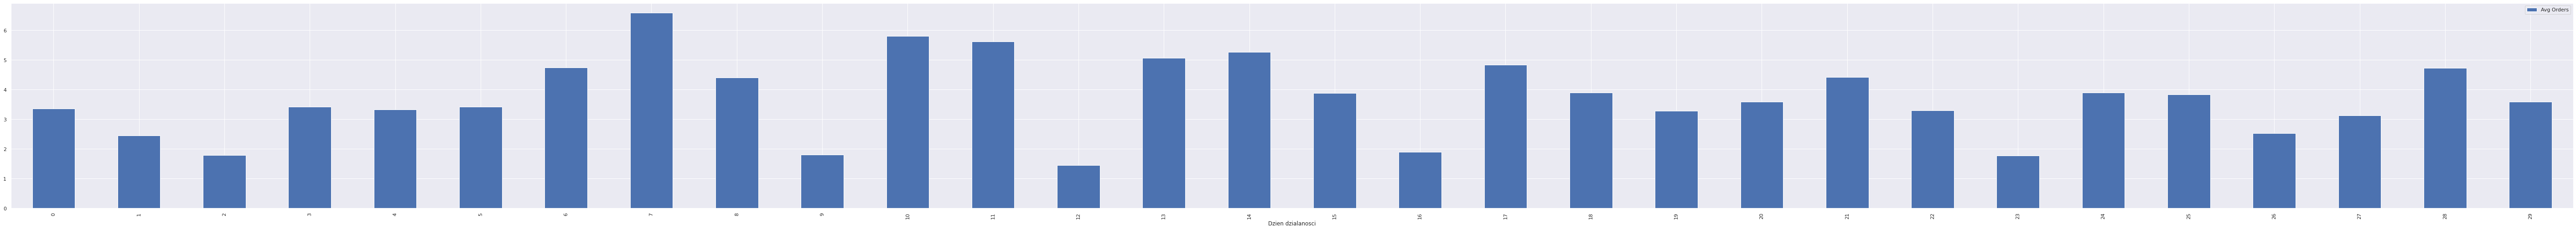

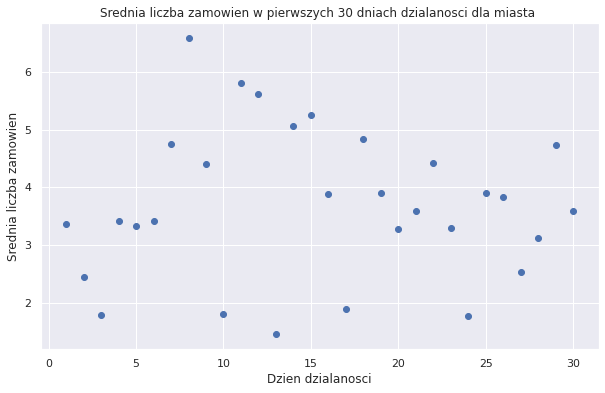

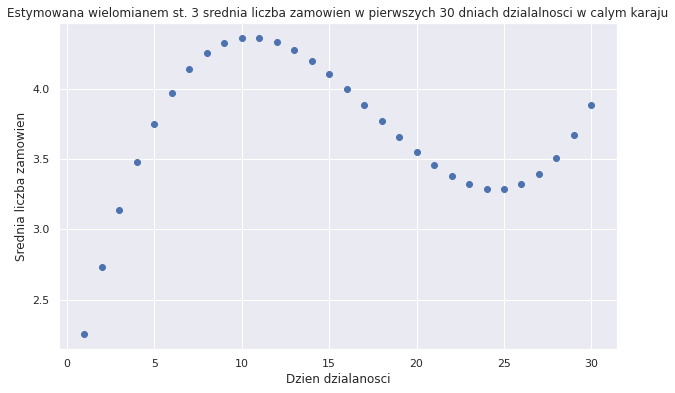

4

In [746]:
def check_sales_for_new_shop(days, city = ""):
    
    if city != "":
        avg_sales = avg_orders_in_first_days_by_city(days)[city]
    else:
        avg_sales = avg_orders_in_first_days(days)
        
    y = list(avg_sales['Avg Orders'])
    x = np.arange(1, 31)

#     wykres sredniej ilosci zamowien dla danego miasta dla nowych sklepow
    avg_sales.plot(xlabel='Dzien dzialanosci',kind="bar")
    plt.figure(figsize=(10,6))
    plt.xlabel("Dzien dzialanosci")
    plt.ylabel("Srednia liczba zamowien")
    plt.title("Srednia liczba zamowien w pierwszych " + str(days) + " dniach dzialanosci dla miasta " + city)
    plt.scatter(x, y)
    plt.show()
    
#     regresja wielomianowa 
    poly_deg = 3
    poly = PolynomialFeatures(degree=poly_deg, include_bias=False)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y)
    y_predicted = poly_reg_model.predict(poly_features)
    
    plt.figure(figsize=(10,6))
    plt.xlabel("Dzien dzialanosci")
    plt.ylabel("Srednia liczba zamowien")
    
    if city != '':
        plt.title("Estymowana wielomianem st. " + str(poly_deg) +" srednia liczba zamowien w pierwszych " + str(days) + " dniach dzialanosci dla miasta " + city)
    else:
        plt.title("Estymowana wielomianem st. " + str(poly_deg) +" srednia liczba zamowien w pierwszych " + str(days) + " dniach dzialalnosci w calym karaju")

    plt.scatter(x, y_predicted)
    plt.show()
    
#     przewidywane zamowienia po n dniach dzialanosci 
    predicted_orders = y_predicted[days-1]
    return math.ceil(predicted_orders)


check_sales_for_new_shop(30)

<AxesSubplot:xlabel='Tydzień w roku'>

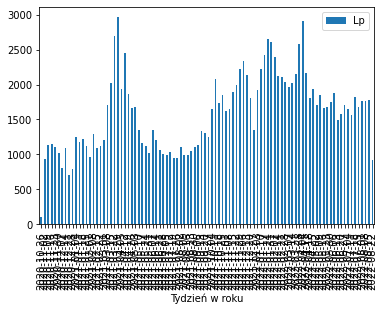

In [47]:
# Zliczanie liczby zamowien w poszczegolnych tygodniach
data_sales_by_week = df.groupby(df['week_start']).agg({"Lp":"sum"})
data_sales_by_week.plot(xlabel='Tydzień w roku',kind="bar")


In [48]:
#Sprzedaż danego dnia tygodnia
data_sales_weekday = df.groupby(df['day_of_week']).agg({"Lp":"sum"})
#Sprzedaż w danych godzinach
data_sales_hour = df.groupby(df['DataRozpoczecia'].dt.hour).agg({"Lp":"sum"})
#Sprzedaż danego dnia miesiąca
data_sales_day = df.groupby(df['DataRozpoczecia'].dt.day).agg({"Lp":"sum"})
#Sprzedaż danego miesiąca
data_sales_month = df.groupby(df['DataRozpoczecia'].dt.month).agg({"Lp":"sum"})
#Sprzedaż danego roku
data_sales_year = df.groupby(df['DataRozpoczecia'].dt.year).agg({"Lp":"sum"})
#Sprzedaż w danych godzinach - Data zakończenia
data_sales_hour_z = df.groupby(df['DataZakonczenia'].dt.hour).agg({"Lp":"sum"})
#Sprzedaż danego tygodnia w roku
data_sales_week = df.groupby(df['DataRozpoczecia'].dt.week).agg({"Lp":"sum"})

/tmp/ipykernel_59476/1539491939.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_sales_week = df.groupby(df['DataRozpoczecia'].dt.week).agg({"Lp":"sum"})


In [49]:
data_sales_weekday.index += 1 

In [50]:
plt.rcParams["figure.figsize"] = (12,8)

<AxesSubplot:xlabel='Tydzień w roku'>

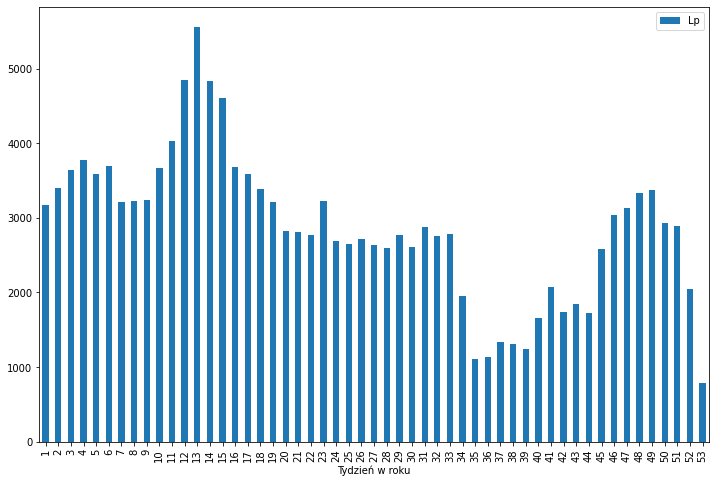

In [51]:
data_sales_week.plot(xlabel='Tydzień w roku',kind="bar")

<AxesSubplot:xlabel='Dzień Tygodnia'>

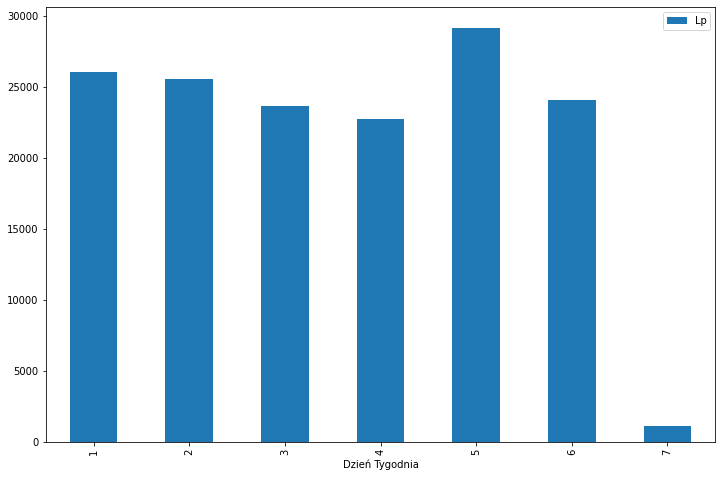

In [52]:
data_sales_weekday.plot(xlabel='Dzień Tygodnia',kind="bar")

<AxesSubplot:xlabel='Godzina'>

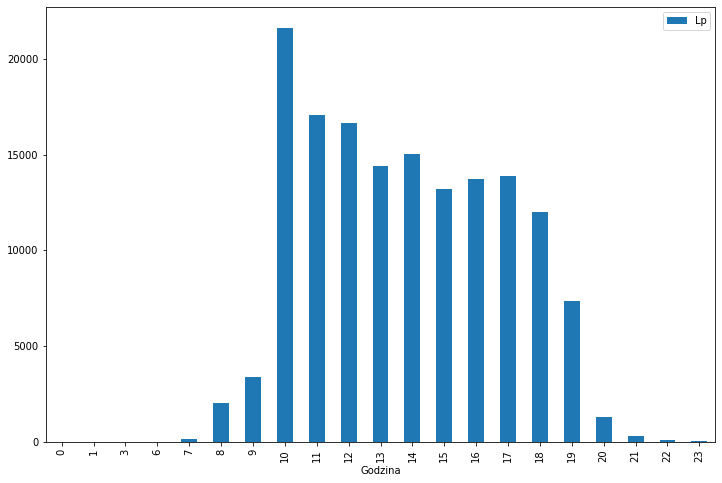

In [53]:
data_sales_hour.plot(xlabel='Godzina',kind="bar")

<AxesSubplot:xlabel='Godzina'>

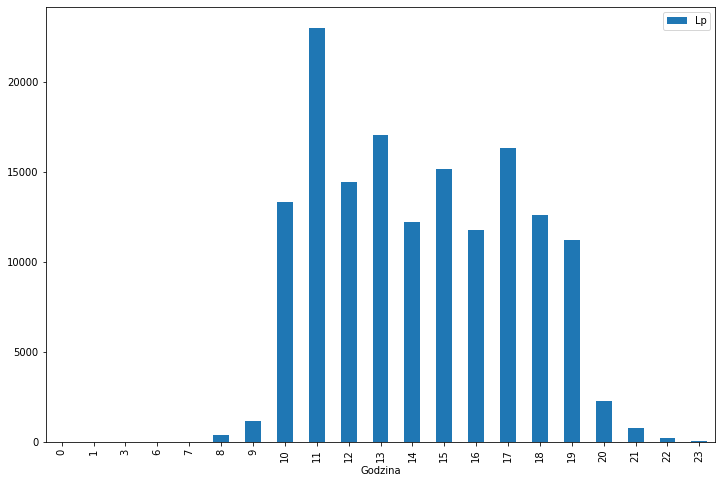

In [54]:
data_sales_hour_z.plot(xlabel='Godzina',kind="bar")

<AxesSubplot:xlabel='Dzień'>

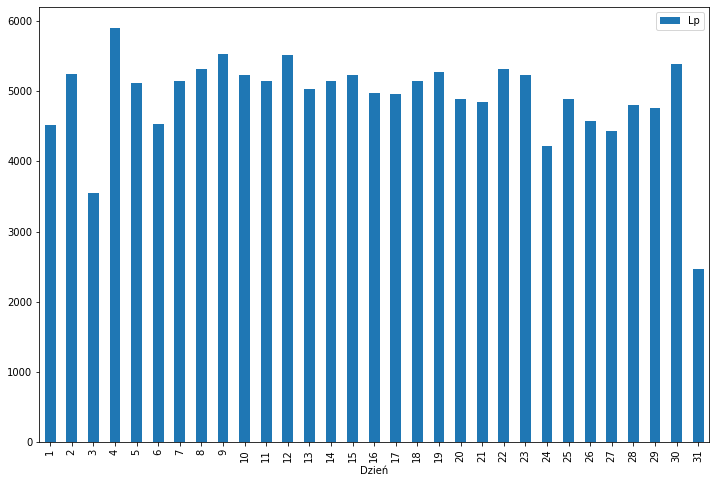

In [55]:
data_sales_day.plot(xlabel='Dzień',kind="bar")

<AxesSubplot:xlabel='Miesiąc'>

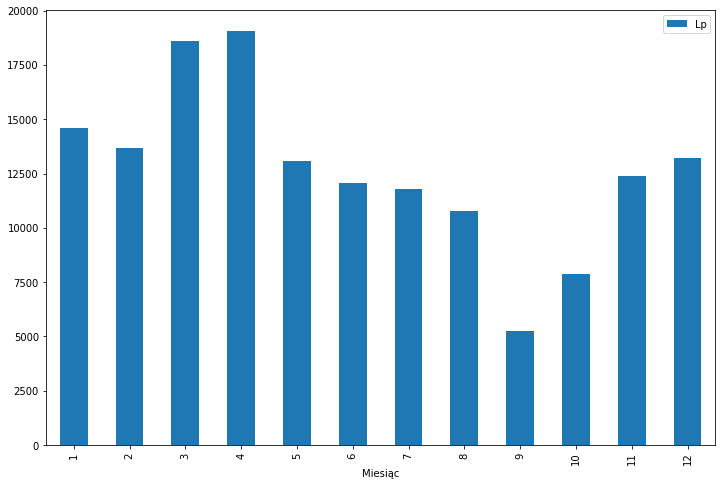

In [56]:
data_sales_month.plot(xlabel="Miesiąc",kind="bar")

<AxesSubplot:xlabel='Rok'>

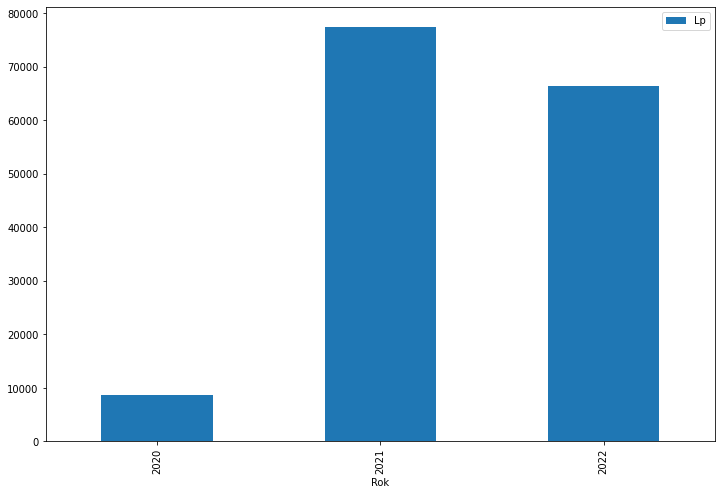

In [57]:
data_sales_year.plot(xlabel="Rok",kind="bar")

<AxesSubplot:xlabel='Godzina'>

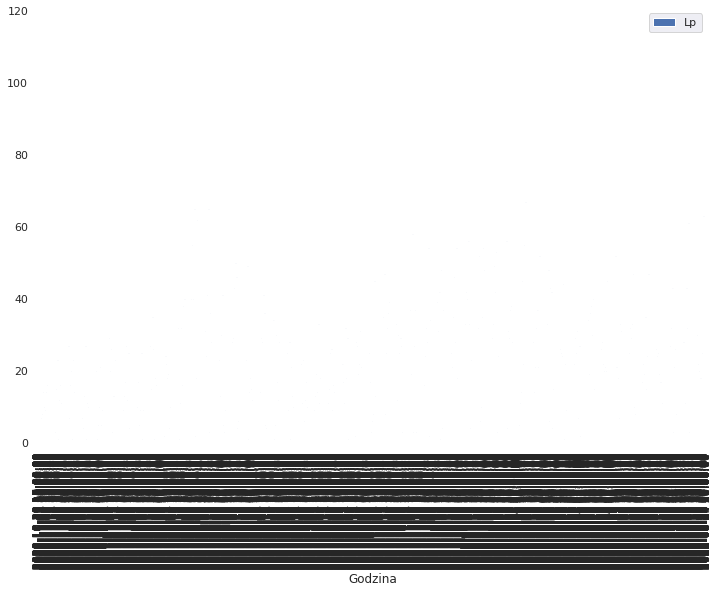

In [758]:
#podział na godziny
hour_date = df.groupby(pd.to_datetime(df['DataRozpoczecia']).dt.floor('H')).agg({"Lp":"sum"})

hour_date.plot(xlabel="Godzina",kind="bar")

<AxesSubplot:xlabel='Godzina'>

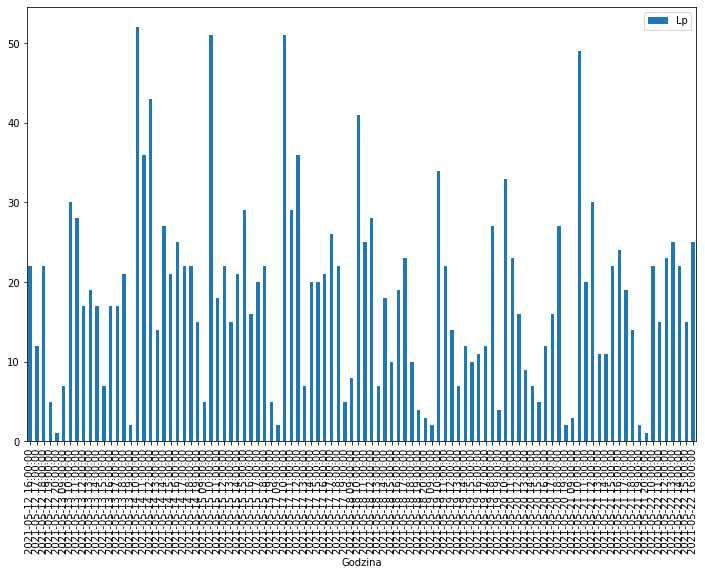

In [189]:
hour_date[2000:2100].plot(xlabel="Godzina",kind="bar")

In [136]:
#podział na dni

data_date = df.groupby(pd.to_datetime(df['DataRozpoczecia']).dt.date).agg({"Lp":"sum"})
data_date.head(3)

# data_date = data_date[:-1]
# data_date.plot(xlabel="Dzień",kind="bar")

,Lp
DataRozpoczecia,
2020-10-30,28
2020-10-31,76
2020-11-01,2


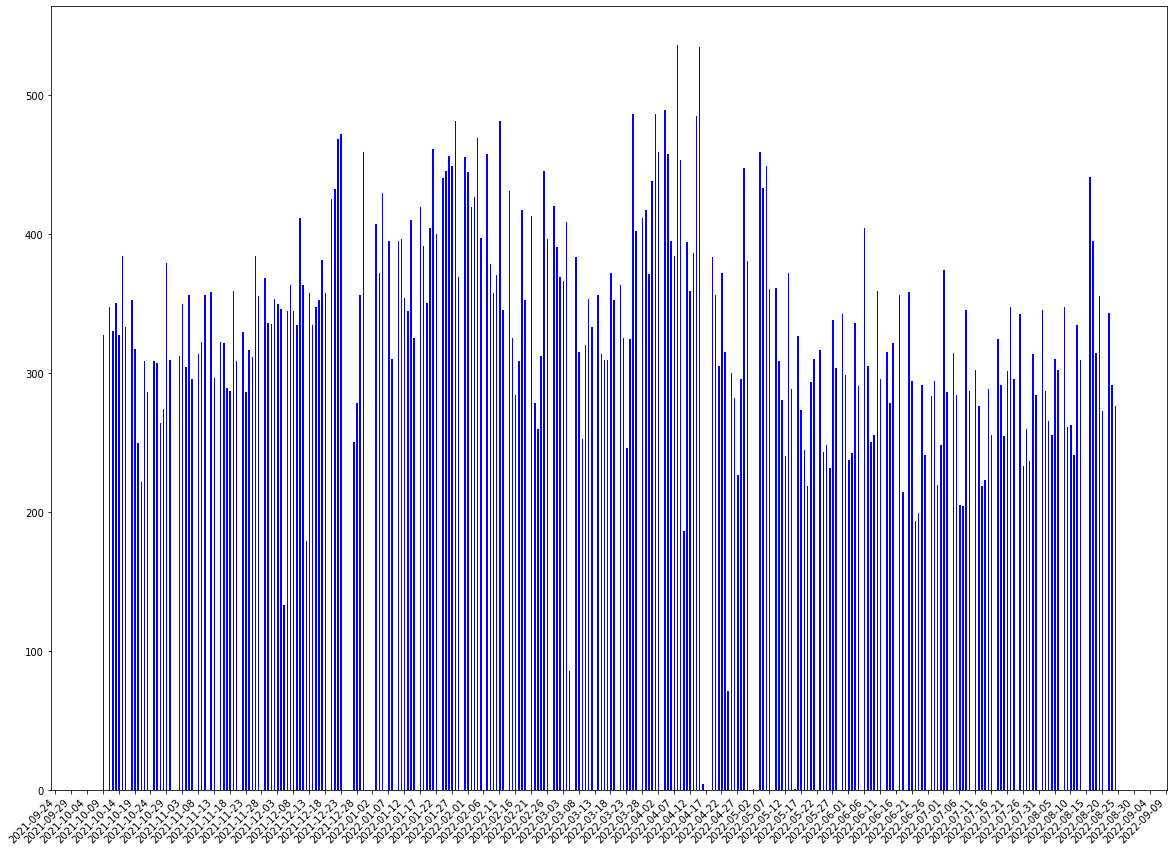

In [59]:
#dodanie dni posiadających wartość 0

fig, ax = plt.subplots(figsize=(20, 16))
#converted_dates_1 = list(map(datetime.datetime.strptime, data_date.index, len(data_date.index)*['%Y-%m-%d']))
formatter = dates.DateFormatter('%Y-%m-%d')

#plt.bar(data_date.index[120:190],data_date['Lp'][120:190],color="blue",edgecolor='white', width=0.8)
#plt.bar(data_date.index[210:300],data_date['Lp'][210:300],color="blue",edgecolor='white', width=0.8)
plt.bar(data_date.index[300:],data_date['Lp'][300:],color="blue",edgecolor='white', width=0.8)

ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=45)
ax.xaxis.set_major_locator(dates.DayLocator(interval=5))


plt.show()

#poczatek listopada 2020 - polowa styczen 2021
#połowa lutego 2021 - polowa maja 2021
#początek wrzesnia 2021 - do konca 2021

                             Lp
PlanowanaDataRozpoczecia       
2020-09-01                  106
2020-10-01                 4672
2020-11-01                 3923
2020-12-01                 5075
2021-01-01                 4480
2021-02-01                 9698
2021-03-01                 8636
2021-04-01                 5698
2021-05-01                 4911
2021-06-01                 4278
2021-07-01                 4718
2021-08-01                 5320
2021-09-01                 7550
2021-10-01                 8191
2021-11-01                 8813
2021-12-01                10126
2022-01-01                 9153
2022-02-01                 9491
2022-03-01                 9279
2022-04-01                 7797
2022-05-01                 7239
2022-06-01                 7337
2022-07-01                 5880


<AxesSubplot:xlabel='Miesiąc'>

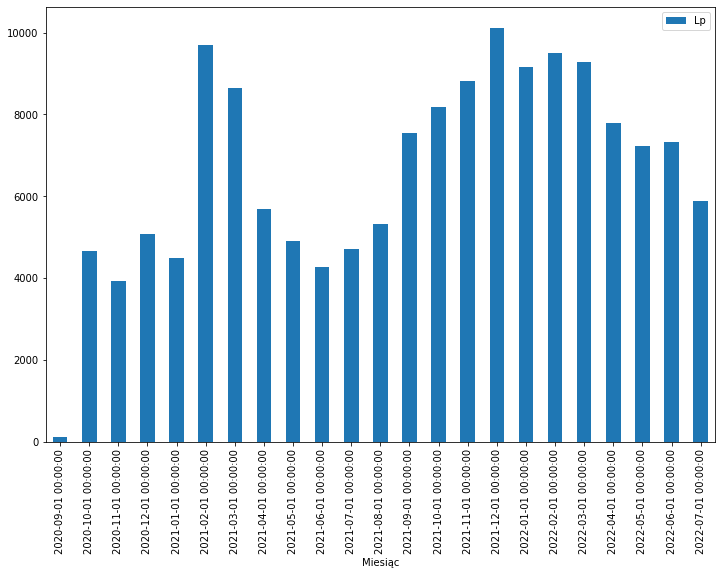

In [60]:
# #podział na miesiące
month_date = df.groupby(pd.to_datetime(df['PlanowanaDataRozpoczecia']).dt.date - pd.offsets.MonthBegin(2)).agg({"Lp":"sum"})

print(month_date)
month_date.plot(xlabel="Miesiąc",kind="bar")

   DataRozpoczecia    Lp
0       2020-11-02   212
1       2020-11-09  1067
2       2020-11-16  1165
3       2020-11-23  1093
4       2020-11-30  1085
..             ...   ...
91      2022-08-01  1676
92      2022-08-08  1772
93      2022-08-15  1412
94      2022-08-22  2126
95      2022-08-29   570

[96 rows x 2 columns]


<BarContainer object of 96 artists>

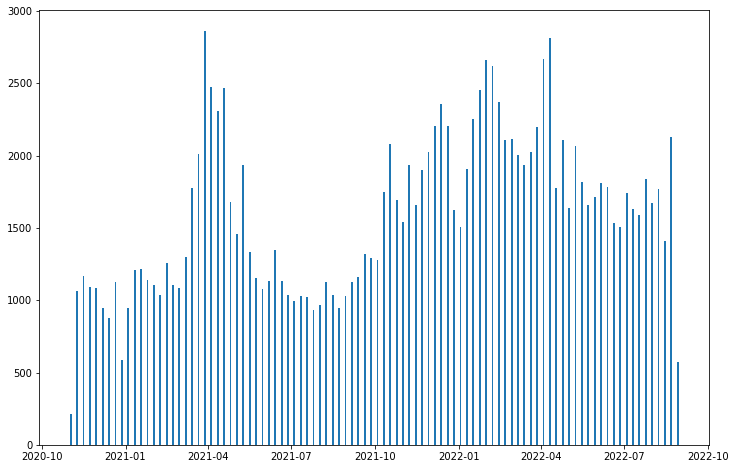

In [61]:
week_date = df.resample('W-Mon', on='DataRozpoczecia').sum().reset_index().sort_values(by='DataRozpoczecia')[['DataRozpoczecia','Lp']]
print(week_date)

plt.bar(week_date['DataRozpoczecia'], week_date['Lp'], label='Tydzień', width=2)

In [62]:
## Predykcja
data_date

,Lp
DataRozpoczecia,
2020-10-30,28
2020-10-31,76
2020-11-01,2
2020-11-02,106
2020-11-03,84
...,...
2022-08-19,356
2022-08-20,273
2022-08-22,344


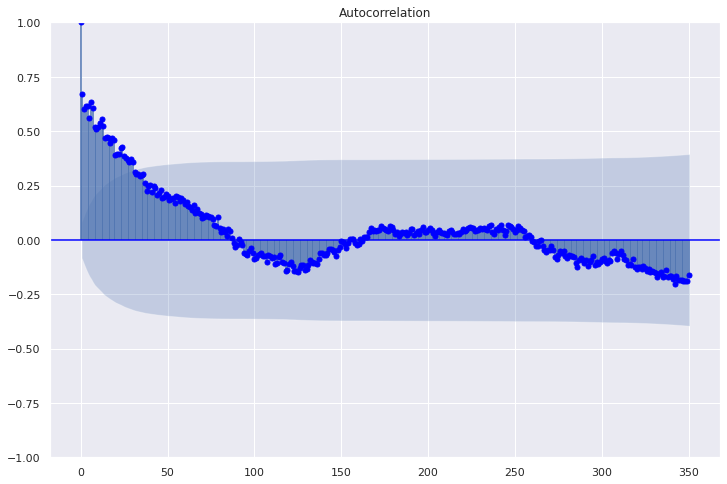

In [763]:
plot_acf(data_date, lags = 350, ax = plt.gca(), color = 'blue');

/home/bdroix/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


KeyboardInterrupt: 

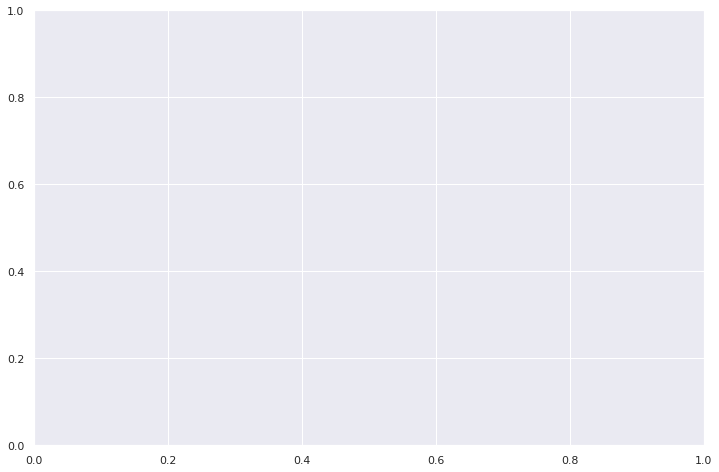

In [764]:
plot_pacf(data_date, lags = 150, ax = plt.gca(), color = 'blue');

In [63]:
#Prophet
sales = data_date
sales.head(3)

,Lp
DataRozpoczecia,
2020-10-30,28
2020-10-31,76
2020-11-01,2


In [64]:
sales['Date'] = sales.index
sales = sales.reset_index()
sales.head(3)
sales=sales.drop(columns=['DataRozpoczecia'])
sales=sales.rename(columns={"Lp": "Sales"}, errors="raise")
sales['Date']= pd.to_datetime(sales['Date'], format='%Y-%m-%d')
sales = sales[['Date','Sales']]
sales.head(3)

,Date,Sales
0,2020-10-30,28
1,2020-10-31,76
2,2020-11-01,2


In [65]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    568 non-null    datetime64[ns]
 1   Sales   568 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.0 KB


In [66]:
sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales.head()

,ds,y
0,2020-10-30,28
1,2020-10-31,76
2,2020-11-01,2
3,2020-11-02,106
4,2020-11-03,84


In [67]:
sales.tail()

,ds,y
563,2022-08-19,356
564,2022-08-20,273
565,2022-08-22,344
566,2022-08-23,292
567,2022-08-24,277


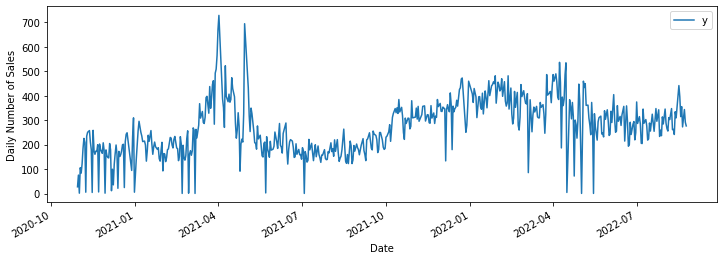

In [68]:
# surowy zbiór
ax = sales.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

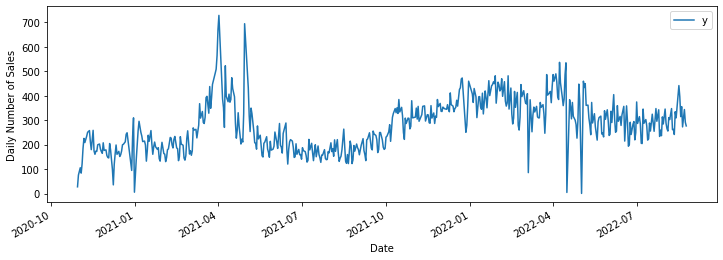

,ds,y
0,2020-10-30,28
1,2020-10-31,76
2,2020-11-02,106


In [69]:
#usunięcie niedziel
df_no_weekdays = sales[sales['ds'].dt.dayofweek < 6]
df_no_weekdays = df_no_weekdays.reset_index()
df_no_weekdays=df_no_weekdays.drop(columns=['index'])

ax = df_no_weekdays.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

df_no_weekdays.head(3)

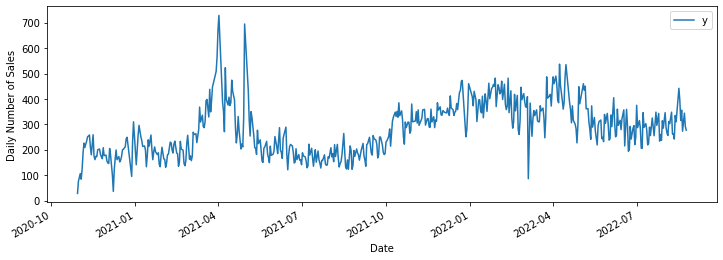

In [70]:
#usunięcie ilości dni poniżej 25
df_no_weekdays = df_no_weekdays[df_no_weekdays['y'] > 25]
df_no_weekdays = df_no_weekdays.reset_index()
df_no_weekdays=df_no_weekdays.drop(columns=['index'])

ax = df_no_weekdays.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [71]:
df_no_weekdays.tail()

,ds,y
539,2022-08-19,356
540,2022-08-20,273
541,2022-08-22,344
542,2022-08-23,292
543,2022-08-24,277


In [773]:
sales.tail()

,ds,y
563,2022-08-19,356
564,2022-08-20,273
565,2022-08-22,344
566,2022-08-23,292
567,2022-08-24,277


In [215]:
#Usunięcie 4 ostatnich dni, po świętach
old_sales = sales
old_df_no_weekdays = df_no_weekdays

print(sales[364:367])

# sales = sales[:-4]
# df_no_weekdays = df_no_weekdays[:-4]

            ds    y
364 2021-12-23  473
365 2021-12-27  251
366 2021-12-28  279


In [75]:
#przypisanie usuniętym dniom wartości 0
d1 = df_no_weekdays
d1=d1.set_index('ds')

idx = pd.date_range('2020-10-30', '2021-08-24')
d1.index = pd.DatetimeIndex(d1.index)
d1 = d1.reindex(idx, fill_value=0)

d1['ds'] = d1.index
d1 = d1.reset_index()
d1=d1.drop(columns=['index'])
d1 = d1[['ds','y']]


In [76]:
# d1=d1[:-5]
d1.tail(10)

,ds,y
289,2021-08-15,0
290,2021-08-16,264
291,2021-08-17,194
292,2021-08-18,133
293,2021-08-19,124
294,2021-08-20,160
295,2021-08-21,123
296,2021-08-22,0
297,2021-08-23,215
298,2021-08-24,196


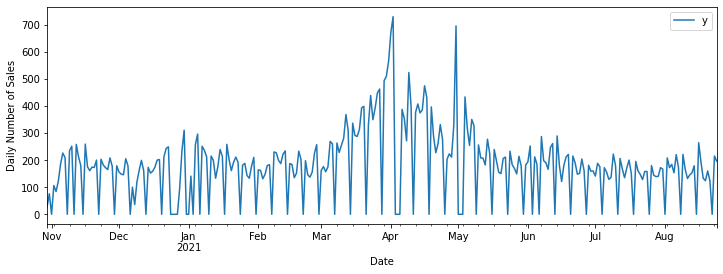

In [77]:
ax = d1.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [78]:
#wyznaczenie zbiorów treningowych dla różnych okresów(7,14,30dni)
train1, train2, train3 = [], [], [], []

In [164]:
#Wybór zestawu do przeprowadzenia predykcji - #sales, df_no_weekdays, d1
data = df_no_weekdays
data.tail(10)


,ds,y
534,2022-08-12,335
535,2022-08-13,310
536,2022-08-16,442
537,2022-08-17,396
538,2022-08-18,315
539,2022-08-19,356
540,2022-08-20,273
541,2022-08-22,344
542,2022-08-23,292
543,2022-08-24,277


In [82]:
train1 = data.drop(data.index[-7:])
# train1.set_index(['ds'])
# train1.tail()
#train2 = data.drop(data.index[-14:])
#train3 = data.drop(data.index[-30:])
train4 = data
train4.tail()

,ds,y
539,2022-08-19,356
540,2022-08-20,273
541,2022-08-22,344
542,2022-08-23,292
543,2022-08-24,277


In [779]:
'''
#Przeprowadzić test tylko do 23.12 ? ponieważ po świętach mocny spadek w 2 następnych dniach (27, 28.12)
ax = train1.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

ax = df_no_weekdays.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()
'''

"\n#Przeprowadzić test tylko do 23.12 ? ponieważ po świętach mocny spadek w 2 następnych dniach (27, 28.12)\nax = train1.set_index('ds').plot(figsize = (12, 4))\nax.set_ylabel('Daily Number of Sales')\nax.set_xlabel('Date')\nplt.show()\n\nax = df_no_weekdays.set_index('ds').plot(figsize = (12, 4))\nax.set_ylabel('Daily Number of Sales')\nax.set_xlabel('Date')\nplt.show()\n"

In [83]:
df_no_weekdays.tail(10)

,ds,y
534,2022-08-12,335
535,2022-08-13,310
536,2022-08-16,442
537,2022-08-17,396
538,2022-08-18,315
539,2022-08-19,356
540,2022-08-20,273
541,2022-08-22,344
542,2022-08-23,292
543,2022-08-24,277


In [84]:
model_1 = prophet.Prophet(#interval_width = 0.95,
                           yearly_seasonality=True,
                           weekly_seasonality=True,
                           daily_seasonality=False,
                           #changepoint_prior_scale = 0.1,
                           #seasonality_prior_scale = 0.2,
                           seasonality_mode = 'multiplicative',
                           holidays = holidays
                           )

model_1 = prophet.Prophet(yearly_seasonality=True,
                           weekly_seasonality=True,
                           daily_seasonality=False,
                           seasonality_mode = 'multiplicative',
                           holidays = holidays
                           )

In [85]:
# model_1.fit(train1)
# model_1.fit(train4)

20:41:18 - cmdstanpy - INFO - Chain [1] start processing
20:41:18 - cmdstanpy - INFO - Chain [1] done processing


/tmp/ipykernel_59476/417934759.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df_no_weekdays = city_sales[sales['ds'].dt.dayofweek < 6]
15:11:11 - cmdstanpy - INFO - Chain [1] start processing
15:11:11 - cmdstanpy - INFO - Chain [1] done processing


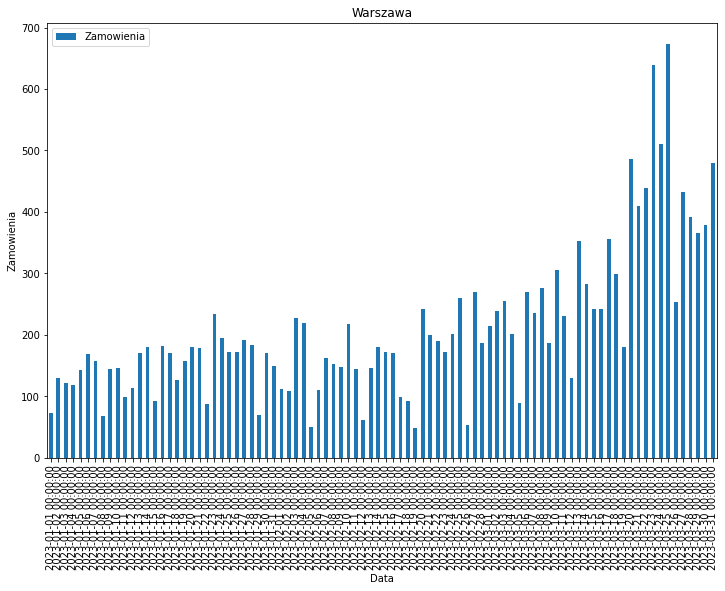

In [188]:
# przyszle daty do predykcji na 2023 rok
def predict_sales_in_new_shop(city, opening_date, time_horizon):

#     miasta z duza iloscia zamowien
    big_city_list = ['Kraków' 'Łódź' 'Katowice' 'Warszawa' 'Wrocław' 'Poznań' 'Gdańsk' 'Szczecin']
    
#    jezeli miasto dla ktorego wykonujemy predykcje nalezy do grupy miast z duza
#    liczba zamowien, wowczas korzystamy z modelu wchodzenia sklepu na rynek w tym miescie
#    w przeciwnym wypadku, korzystamy z usrednionego modelu dla calego kraju
    
    if city in big_city_list:
        new_shop_model = mixed_new_shop_model_for_city(city, time_horizon)
    else:
        new_shop_model = mixed_new_shop_model_for_country(time_horizon)
    rates = new_shop_model['Order']

#   przygotowanie danych o ilosci zamowien w miastach w kolejnych dniach
    city_df = df[df['MiastoSklepu'].str.match(city)]
    city_data_date = city_df.groupby(pd.to_datetime(city_df['DataRozpoczecia']).dt.date).agg({"Lp":"sum"})
    
    city_sales = city_data_date
    city_sales['Date'] = city_sales.index
    city_sales = city_sales.reset_index()
    city_sales=city_sales.rename(columns={"Lp": "Sales"}, errors="raise")
    city_sales['Date']= pd.to_datetime(city_sales['Date'], format='%Y-%m-%d')
    city_sales = city_sales[['Date','Sales']]
    city_sales = city_sales.rename(columns = {'Date': 'ds',
                                    'Sales': 'y'})
#     usunięcie niedziel
    city_df_no_weekdays = city_sales[sales['ds'].dt.dayofweek < 6]
    city_df_no_weekdays = city_df_no_weekdays.reset_index()
    city_df_no_weekdays = city_df_no_weekdays.drop(columns=['index'])
#     df.rename(columns={'ds': 'ds', 'y': 'y'}, inplace=True)
        
#     przyszle daty
    datetime.datetime.strptime(opening_date, '%Y-%m-%d')
    date_series = pd.date_range(opening_date, periods=time_horizon, freq="D")
    future_dates = pd.DataFrame(date_series, columns=['ds'])
    
#     predykcja

    model = prophet.Prophet(yearly_seasonality=True,
                           weekly_seasonality=True,
                           daily_seasonality=False,
                           seasonality_mode = 'multiplicative',
                           holidays = holidays
                           )
    
    model.fit(city_df_no_weekdays)
    forecast = model.predict(future_dates)   
    y_hat = forecast['yhat']
    for i in range(len(y_hat)):
        if y_hat[i] < 0:
            y_hat[i] = 0
        
    orders_forecast = [r * f for r, f in zip(rates, forecast['yhat'])]
    
    predicition_df = pd.DataFrame(orders_forecast, columns=['Zamowienia'])
    predicition_df['Data'] = date_series
    predicition_df.set_index(['Data'], inplace=True, drop=True) 
    predicition_df.plot(kind='bar',title=city,xlabel='Data', ylabel='Zamowienia');

predict_sales_in_new_shop('Warszawa', '2023-01-01', 90)

In [157]:
# predykcje na 2023 rok
forecast_2023 = model_1.predict(dates_2023)

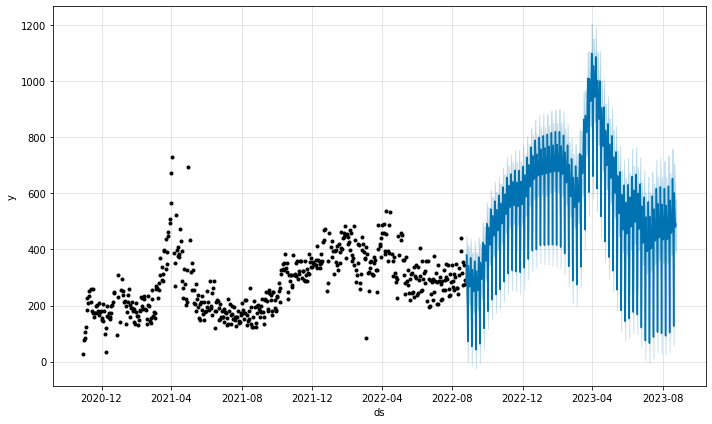

In [103]:
model_1.plot(forecast_2023);

In [782]:
future_dates = pd.DataFrame(data['ds'])

In [783]:
future_dates.tail(2)

,ds
542,2022-08-23
543,2022-08-24


In [784]:
train1.tail(2)

,ds,y
535,2022-08-13,310
536,2022-08-16,442


In [785]:
forecast = model_1.predict(future_dates)

In [786]:
y_true = data['y'][-7:].values #bez niedziel
y_pred = forecast['yhat'][-7:].values
# data.tail(3)
# forecast.tail(3)

In [787]:
y_true

array([396, 315, 356, 273, 344, 292, 277])

In [788]:
y_pred

array([239.12481762, 248.41538261, 348.44868456, 279.95026453,
       318.00423945, 280.74685236, 248.26157827])

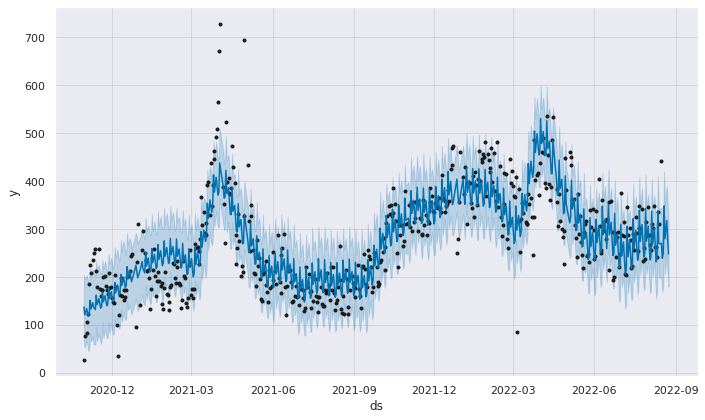

In [789]:
model_1.plot(forecast);

In [ ]:
# przewidywanie dla 2023


In [790]:
def metrics(y, y_hat):
    print('MAE:', np.mean(np.abs(y - y_hat)))
    print('RMSE:', np.sqrt(np.mean(np.square(y - y_hat))))
    print('MAPE:', np.mean(np.abs((y - y_hat)/y)*100))
    print('MAX:', np.max(np.abs(y - y_hat)))

In [791]:
metrics(y_true, y_pred)

MAE: 43.42124423667321
RMSE: 66.30769449312373
MAPE: 12.45793794242063
MAX: 156.875182377274


<AxesSubplot:>

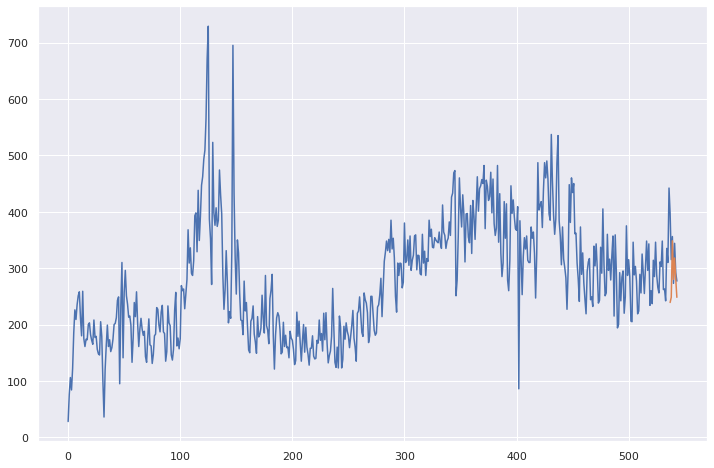

In [792]:
data['y'].plot()
forecast['yhat'][-7:].plot()

In [286]:
#Podział na miasta

In [82]:
df.groupby('MiastoSklepu').count()['NumerZlecenia']

MiastoSklepu
Białystok                 543
Bielsko-Biała             548
Bytom                     369
Chorzów                   103
Gdańsk                   5275
Gliwice                   937
Jaworzno                   37
Katowice                 4476
Kraków                  23812
Lublin                    338
Piotrków Trybunalski       21
Poznań                   5663
Radom                      52
Rybnik                     79
Sosnowiec                  58
Szczecin                 5822
Warszawa                23090
Wołomin                    58
Wrocław                  9039
Łódź                     5758
Name: NumerZlecenia, dtype: int64

In [180]:
#Wykresy dla poszczególnych 3 miast - Warszawa, Kraków, Wrocław

In [83]:
miasta = ['Warszawa','Kraków','Wrocław']

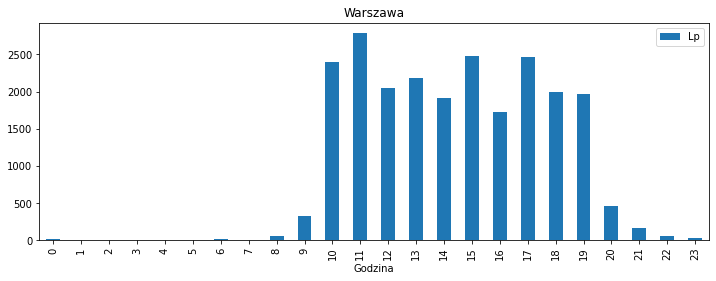

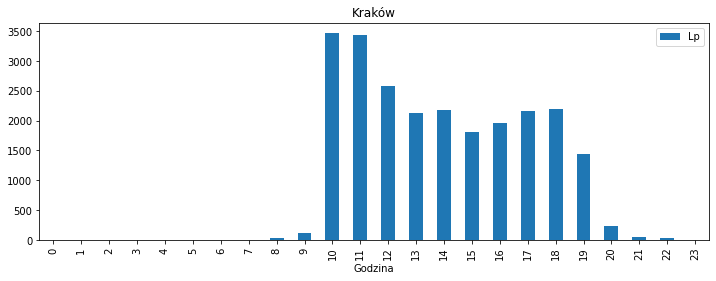

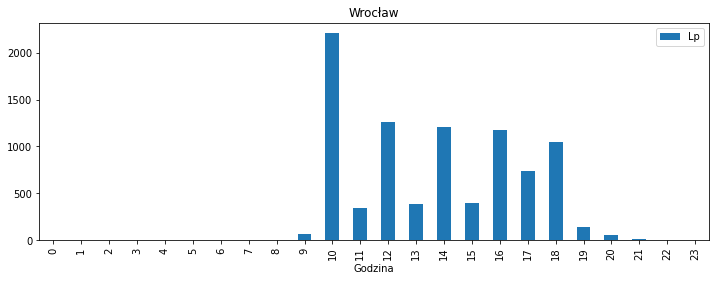

In [84]:
plt.rcParams["figure.figsize"] = (12,4)
#Ilość zamówień w danej godzinie
for miasto in miasta:
    df_test=df[df['MiastoSklepu'].str.match(miasto)].groupby(df['DataRozpoczecia'].dt.hour).agg({"Lp":"sum"})
    for i in range(24):
        if not i in df_test.index:
            df_test.loc[i+ .5] = 0
    df_test = df_test.sort_index().reset_index(drop=True)
    df_test.plot(kind='bar',title=miasto,xlabel='Godzina');

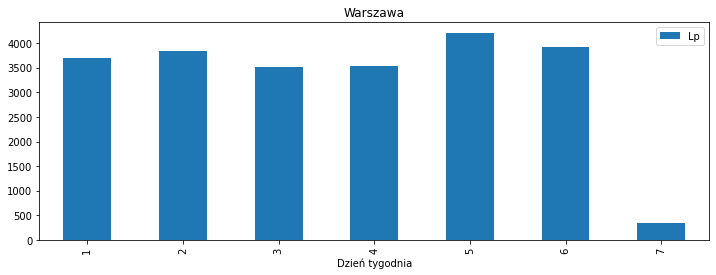

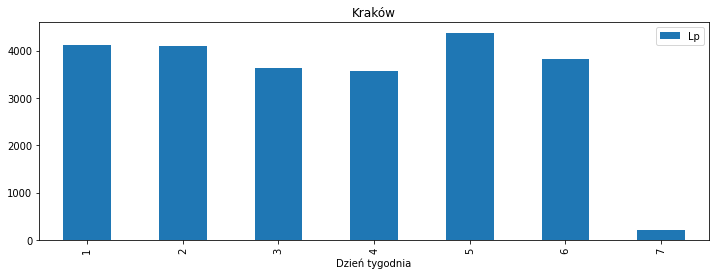

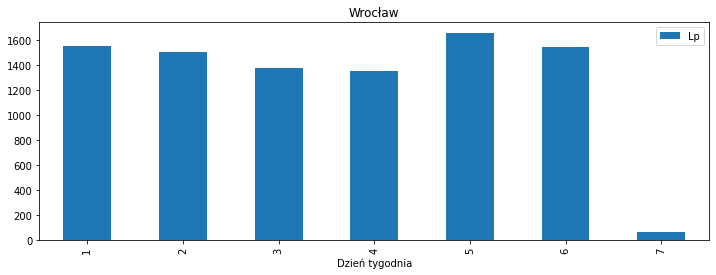

In [85]:
#Sprzedaż danego dnia tygodnia
for miasto in miasta:
    df_test=df[df['MiastoSklepu'].str.match(miasto)].groupby(df['day_of_week']).agg({"Lp":"sum"})
    df_test.index += 1
    df_test.plot(kind='bar',title=miasto,xlabel='Dzień tygodnia');

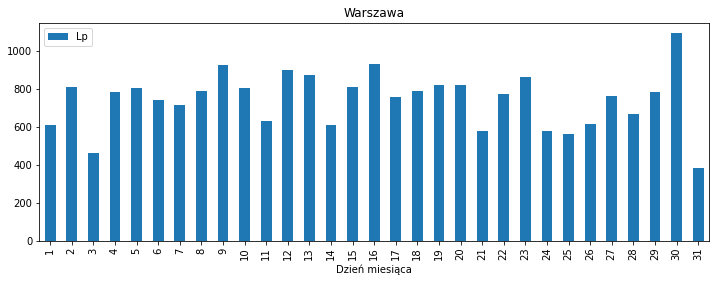

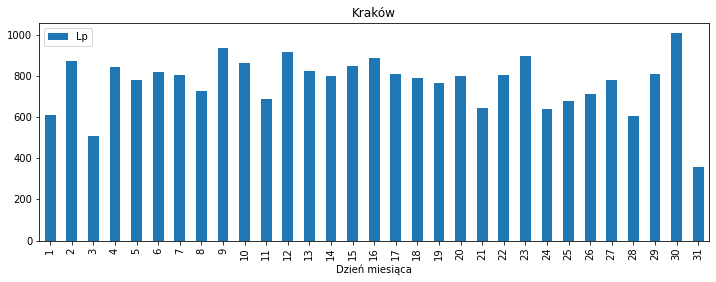

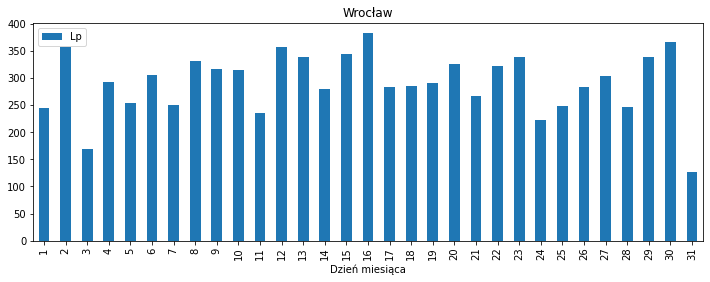

In [86]:
#Sprzedaż danego dnia miesiąca
for miasto in miasta:
    df_test=df[df['MiastoSklepu'].str.match(miasto)].groupby(df['DataRozpoczecia'].dt.day).agg({"Lp":"sum"})
    #df_test.index += 1
    df_test.plot(kind='bar',title=miasto,xlabel='Dzień miesiąca');

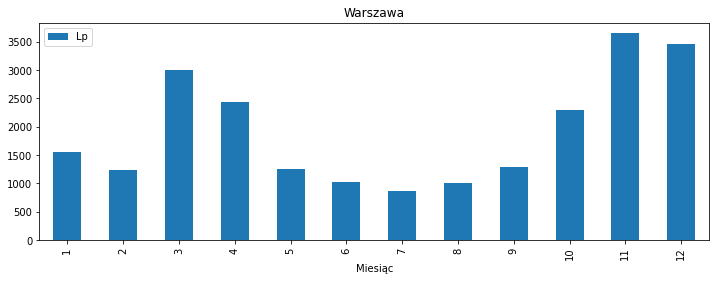

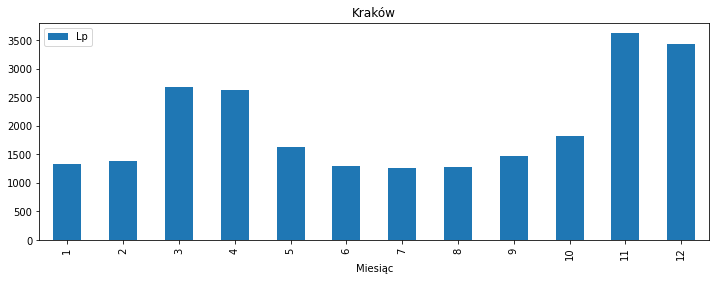

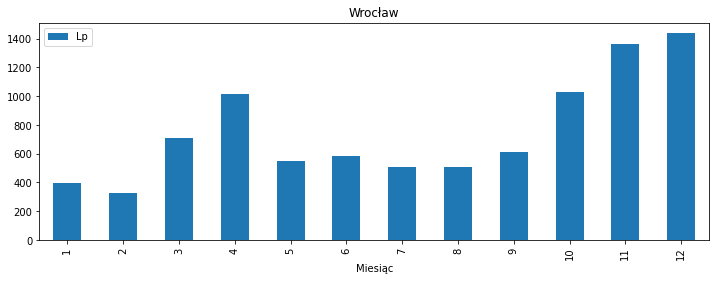

In [87]:
#Sprzedaż danego miesiąca
for miasto in miasta:
    df_test=df[df['MiastoSklepu'].str.match(miasto)].groupby(df['DataRozpoczecia'].dt.month).agg({"Lp":"sum"})
    #df_test.index += 1
    df_test.plot(kind='bar',title=miasto,xlabel='Miesiąc');

/tmp/ipykernel_4092/999893020.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_test=df[df['MiastoSklepu'].str.match(miasto)].groupby(df['DataRozpoczecia'].dt.week).agg({"Lp":"sum"})
/tmp/ipykernel_4092/999893020.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_test=df[df['MiastoSklepu'].str.match(miasto)].groupby(df['DataRozpoczecia'].dt.week).agg({"Lp":"sum"})
/tmp/ipykernel_4092/999893020.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_test=df[df['MiastoSklepu'].str.match(miasto)].groupby(df['DataRozpoczecia'].dt.week).agg({"Lp":"sum"})


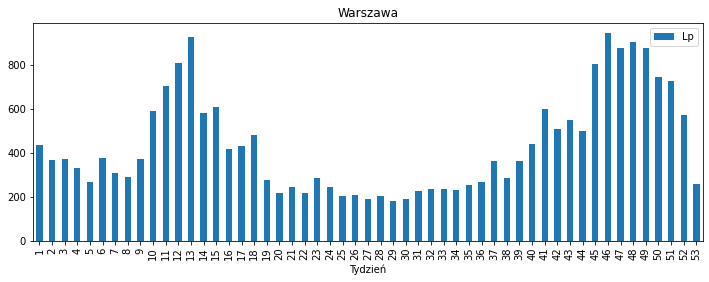

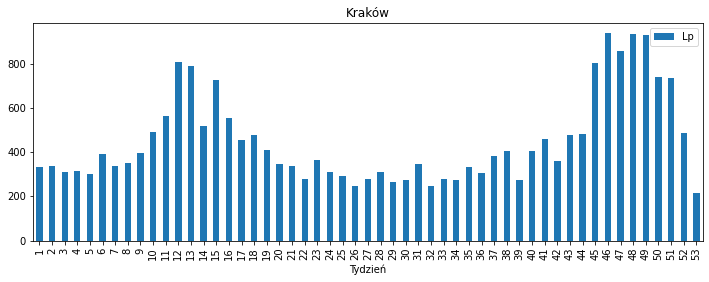

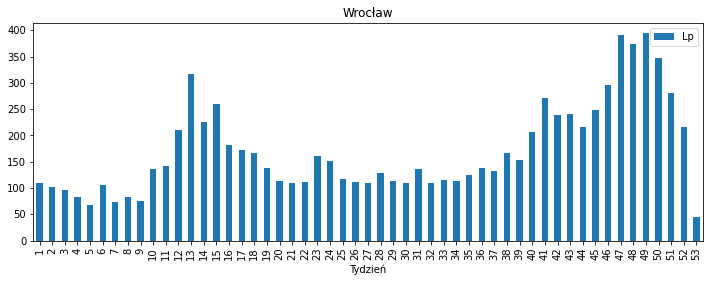

In [88]:
#Sprzedaż danego tygodnia w roku
for miasto in miasta:
    df_test=df[df['MiastoSklepu'].str.match(miasto)].groupby(df['DataRozpoczecia'].dt.week).agg({"Lp":"sum"})
    #df_test.index += 1
    df_test.plot(kind='bar',title=miasto,xlabel='Tydzień');

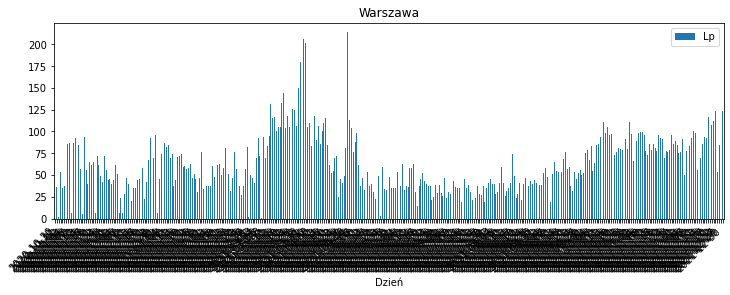

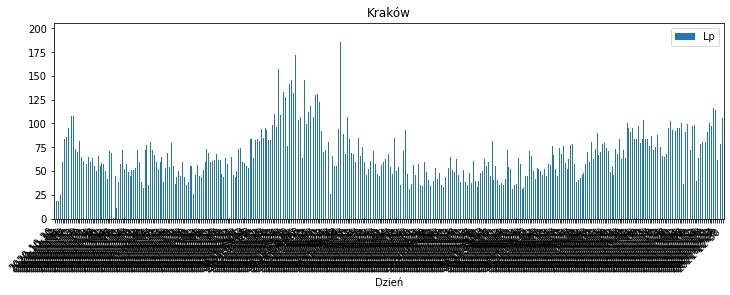

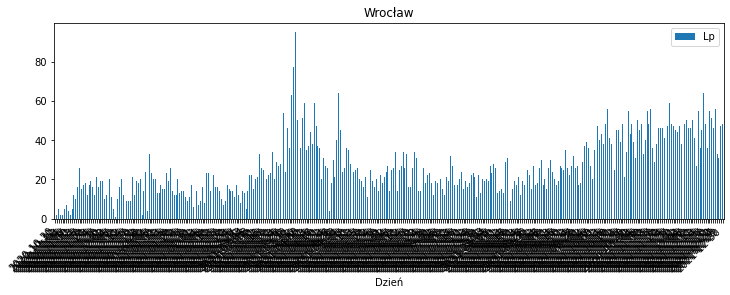

In [89]:
#data początkowa 2.11.2020 - poniedziałek - cały przebieg

formatter = dates.DateFormatter('%Y-%m-%d')
startdate = pd.to_datetime("2020-10-30").date()

i=0
daily=[]

for miasto in miasta:
    df_test=df[df['MiastoSklepu'].str.match(miasto)].groupby(pd.to_datetime(df['PlanowanaDataRozpoczecia']).dt.date).agg({"Lp":"sum"})
    df_test.loc[startdate:].plot(kind='bar',title=miasto,xlabel='Dzień');
    daily.append(df_test.loc[startdate:])

    ax.xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate(rotation=45)
    ax.xaxis.set_major_locator(dates.DayLocator(interval=60))


    plt.show()

In [90]:
for miasto in miasta:
    df_test=df[df['MiastoSklepu'].str.match(miasto)].groupby(pd.to_datetime(df['PlanowanaDataRozpoczecia']).dt.date).agg({"Lp":"sum"})
    print(len(df_test.loc[startdate:]))

366
357
354


In [91]:
#poczatek listopada 2020 - polowa styczen 2021
#połowa lutego 2021 - polowa maja 2021
#początek wrzesnia 2021 - do konca 2021

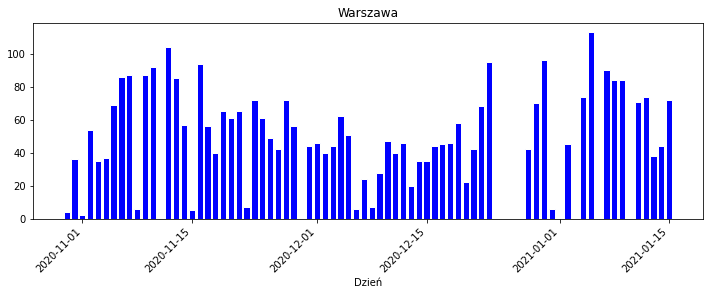

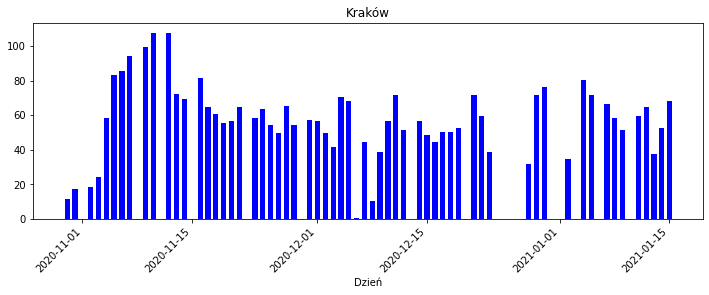

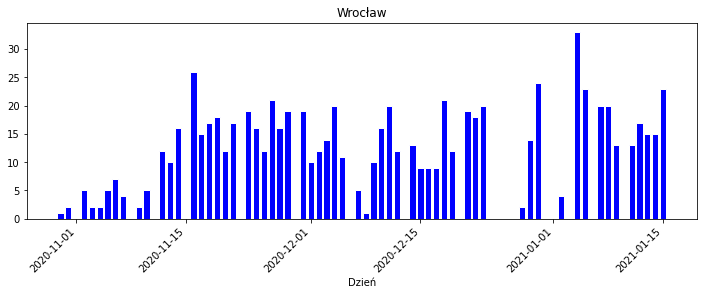

In [92]:
#Boże Narodzenie 2020

enddate = pd.to_datetime("2021-01-15").date()

for miasto in miasta:
    df_test=df[df['LokalizacjaPoczatkowa'].str.match(miasto)].groupby(pd.to_datetime(df['PlanowanaDataRozpoczecia']).dt.date).agg({"Lp":"sum"})
    #df_test.loc[startdate:enddate].plot(kind='bar',title=miasto,xlabel='Dzień');
    plt.bar(df_test.loc[:enddate].index,df_test.loc[:enddate]['Lp'],color="blue",edgecolor='white', width=0.8)
    plt.title(miasto)
    plt.xlabel('Dzień')
    #print(df_test.head())

    ax.xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate(rotation=45)
    ax.xaxis.set_major_locator(dates.DayLocator(interval=1))


    plt.show()

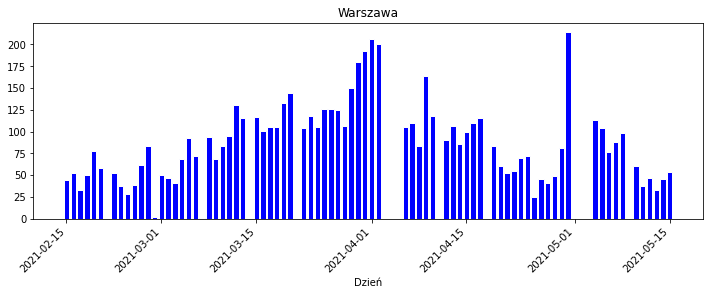

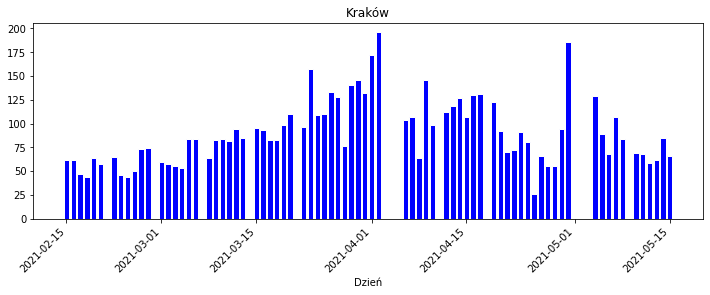

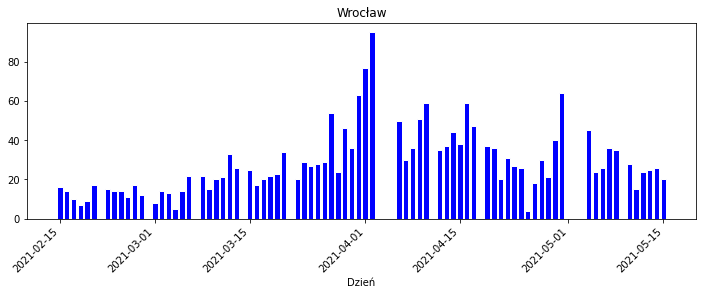

In [93]:
#Wielkanoc 2021
startdate = pd.to_datetime("2021-02-15").date()
enddate = pd.to_datetime("2021-05-15").date()

for miasto in miasta:
    df_test=df[df['LokalizacjaPoczatkowa'].str.match(miasto)].groupby(pd.to_datetime(df['PlanowanaDataRozpoczecia']).dt.date).agg({"Lp":"sum"})
    #df_test.loc[startdate:enddate].plot(kind='bar',title=miasto,xlabel='Dzień');
    plt.bar(df_test.loc[startdate:enddate].index,df_test.loc[startdate:enddate]['Lp'],color="blue",edgecolor='white', width=0.8)
    plt.title(miasto)
    plt.xlabel('Dzień')
    #print(df_test.head())

    ax.xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate(rotation=45)
    ax.xaxis.set_major_locator(dates.DayLocator(interval=1))


    plt.show()

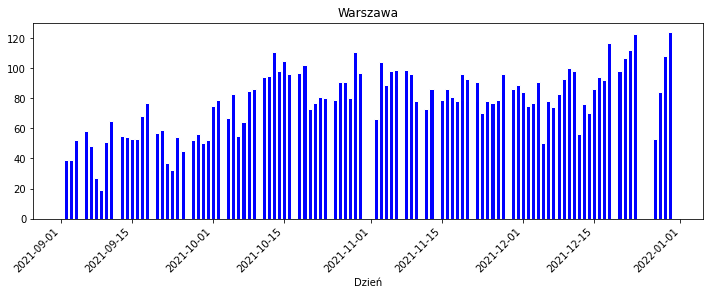

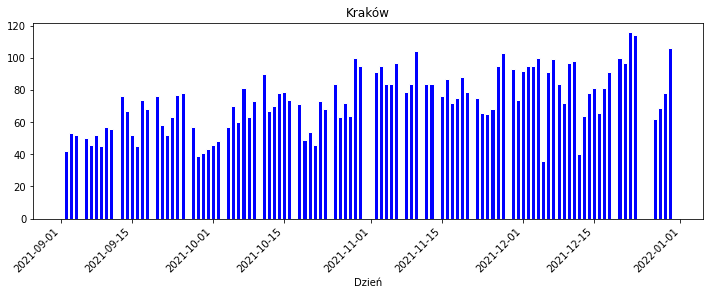

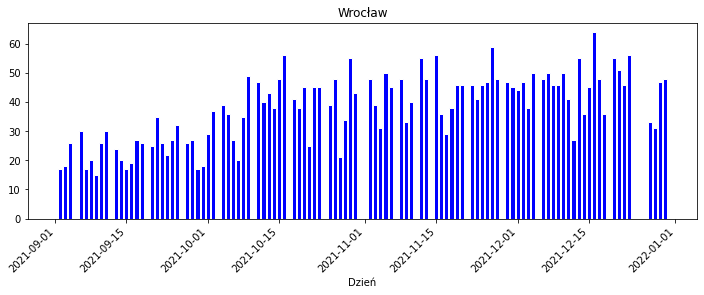

In [192]:
#Boże Narodzenie 2021
startdate = pd.to_datetime("2021-09-02").date()
enddate = pd.to_datetime("2021-12-24").date()

for miasto in miasta:
    df_test=df[df['LokalizacjaPoczatkowa'].str.match(miasto)].groupby(pd.to_datetime(df['PlanowanaDataRozpoczecia']).dt.date).agg({"Lp":"sum"})
    #df_test.loc[startdate:enddate].plot(kind='bar',title=miasto,xlabel='Dzień');
    plt.bar(df_test.loc[startdate:].index,df_test.loc[startdate:]['Lp'],color="blue",edgecolor='white', width=0.8)
    plt.title(miasto)
    plt.xlabel('Dzień')
    #print(df_test.head())

    ax.xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate(rotation=45)
    ax.xaxis.set_major_locator(dates.DayLocator(interval=5))


    plt.show()

In [193]:
#wyrzucenie 4 ostatnich dni, ze względu na zwiększenie błędu przy predykcji(znaczny spadek po świętach, 27,28.12)
#lub usunięcie kolejnego całego tygodnia, gdyż wyniki nie są charakterystyczne, ze wzglęgu na stały wzrost
for i in range(len(daily)):
    #daily[i] = daily[i][:-4]
    daily[i] = daily[i][:-11]
    daily[i]['Date'] = daily[i].index
    daily[i] = daily[i].reset_index()
    daily[i]=daily[i].drop(columns=['PlanowanaDataRozpoczecia'])
    daily[i]=daily[i].rename(columns={"Lp": "Sales"}, errors="raise")
    daily[i]['Date']= pd.to_datetime(daily[i]['Date'], format='%Y-%m-%d')
    daily[i] = daily[i][['Date','Sales']]

    daily[i] = daily[i].rename(columns = {'Date': 'ds',
                                'Sales': 'y'})

In [194]:
daily[0].tail(7)

,ds,y
348,2021-12-09,93
349,2021-12-10,100
350,2021-12-11,98
351,2021-12-12,56
352,2021-12-13,76
353,2021-12-14,70
354,2021-12-15,86


In [195]:
#Usunięcie niedziel i dni z ilością zleceń poniżej 5
daily_1=[]
for i in range(len(daily)):
    daily_1.append(daily[i][daily[i]['ds'].dt.dayofweek < 6])
    daily_1[i] = daily_1[i][daily_1[i]['y'] > 5]
    daily_1[i] = daily_1[i].reset_index()
    daily_1[i]=daily_1[i].drop(columns=['index'])

In [196]:
#wyciecie zbioru dla testu wybranych okresów
#for i in range(len(daily_1)):
    #daily_1[i] = daily_1[i][:-33] #5.11
    #daily_1[i] = daily_1[i][:-86] #3.09
    #daily_1[i] = daily_1[i][:-116] #30.07
    #daily_1[i] = daily_1[i][:-139] #3.07
    #daily_1[i] = daily_1[i][:-187] #7.05
    #daily_1[i] = daily_1[i][:-209] #9.04
    #daily_1[i] = daily_1[i][:-231] #12.03
    #daily_1[i] = daily_1[i][:-261] #5.02

In [197]:
daily_1[0].tail()

,ds,y
334,2021-12-10,100
335,2021-12-11,98
336,2021-12-13,76
337,2021-12-14,70
338,2021-12-15,86


In [198]:
#wyznaczenie zbiorów treningowych dla różnych okresów(7,14,30dni)
train1, train2, train3 = [], [], []

In [199]:
for i in range(len(daily_1)):
    train1.append(daily_1[i].drop(daily_1[i].index[-7:]))
    train2.append(daily_1[i].drop(daily_1[i].index[-14:]))
    train3.append(daily_1[i].drop(daily_1[i].index[-30:]))

In [200]:
'''
for i in range(len(daily)):
    train1.append(daily[i].drop(daily[i].index[-7:]))
    train2.append(daily[i].drop(daily[i].index[-14:]))
    train3.append(daily[i].drop(daily[i].index[-30:]))
    
'''

'''
for i in range(len(daily_1)):
    train1.append(daily_1[i].drop(daily_1[i].index[-7:]))
    train2.append(daily_1[i].drop(daily_1[i].index[-14:]))
    train3.append(daily_1[i].drop(daily_1[i].index[-30:]))
'''

'\nfor i in range(len(daily_1)):\n    train1.append(daily_1[i].drop(daily_1[i].index[-7:]))\n    train2.append(daily_1[i].drop(daily_1[i].index[-14:]))\n    train3.append(daily_1[i].drop(daily_1[i].index[-30:]))\n'

In [203]:
train1[0].tail()

,ds,y
327,2021-12-02,75
328,2021-12-03,77
329,2021-12-04,91
330,2021-12-06,78
331,2021-12-07,74


In [202]:
#wybór miasta 0-Warszawa,1-Kraków,2-Wrocław
m = 0

In [205]:
#Model
model_1 = prophet.Prophet(interval_width = 0.95,
                          changepoint_prior_scale = 0.05,
                          seasonality_prior_scale = 0.1,
                          holidays_prior_scale = 0.1,
                          yearly_seasonality=True,
                          weekly_seasonality=True,
                          daily_seasonality=False,
                          seasonality_mode = 'multiplicative',
                          holidays = holidays
                           )

In [206]:
model_1.fit(train1[m])
#model_1.fit(train2[m])
#model_1.fit(train3[m])

16:45:25 - cmdstanpy - INFO - Chain [1] start processing
16:45:25 - cmdstanpy - INFO - Chain [1] done processing


In [207]:
#future_dates = pd.DataFrame(daily[m]['ds'])
future_dates = pd.DataFrame(daily_1[m]['ds'])

In [208]:
forecast = model_1.predict(future_dates)

In [209]:
#calculate MAE between expected and predicted values 
#y_true = daily[m]['y'][-7:].values #z niedzielami
y_true = daily_1[m]['y'][-7:].values #bez niedziel
y_pred = forecast['yhat'][-7:].values

#y_true = daily[m]['y'][-14:].values
#y_true = daily_1[m]['y'][-14:].values
#y_pred = forecast['yhat'][-14:].values

#y_true = daily[m]['y'][-30:].values
#y_true = daily_1[m]['y'][-30:].values
#y_pred = forecast['yhat'][-30:].values

In [210]:
metrics(y_true, y_pred)

26.5285
27.9905
29.9963
38.2364
1101.4286


In [211]:
y_true

array([ 83,  93, 100,  98,  76,  70,  86])

In [212]:
y_pred

array([56.00486731, 54.76363363, 70.94317637, 66.37908993, 61.47563054,
       57.70893589, 53.02533025])

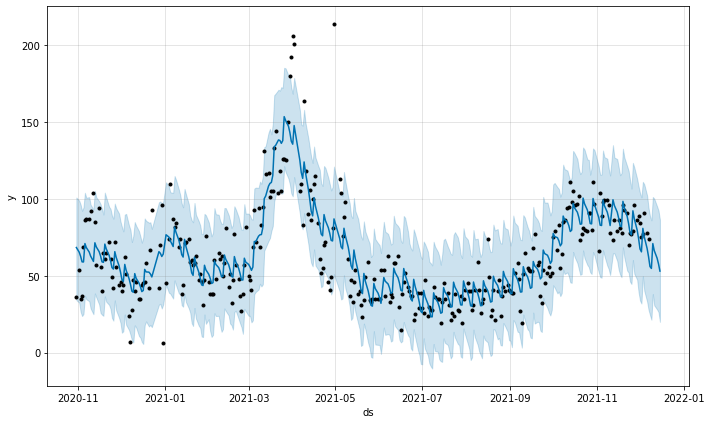

In [213]:
model_1.plot(forecast);

<AxesSubplot:>

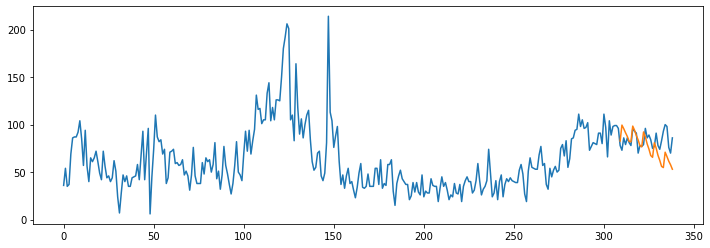

In [214]:
daily_1[m]['y'].plot()
forecast['yhat'][-30:].plot()
#forecast['yhat_upper'].plot()

<AxesSubplot:>

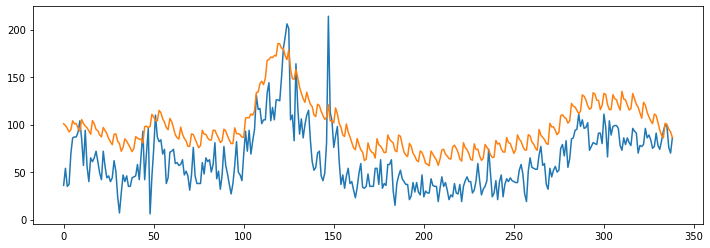

In [215]:
daily_1[m]['y'].plot()
forecast['yhat_upper'].plot()

In [216]:
daily_1[m]

,ds,y
0,2020-10-31,36
1,2020-11-02,54
2,2020-11-03,35
3,2020-11-04,37
4,2020-11-05,69
...,...,...
334,2021-12-10,100
335,2021-12-11,98
336,2021-12-13,76
337,2021-12-14,70


In [217]:
forecast[130:140]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
130,2021-04-10,63.884813,81.859777,149.369021,63.884813,63.884813,0.0,0.0,0.0,0.831492,...,0.062386,0.062386,0.062386,0.769106,0.769106,0.769106,0.0,0.0,0.0,117.004515
131,2021-04-12,63.979513,70.572790,139.321034,63.979513,63.979513,0.0,0.0,0.0,0.658845,...,0.005881,0.005881,0.005881,0.652965,0.652965,0.652965,0.0,0.0,0.0,106.132120
132,2021-04-13,64.026863,63.353642,133.022749,64.026863,64.026863,0.0,0.0,0.0,0.553435,...,-0.045295,-0.045295,-0.045295,0.598730,0.598730,0.598730,0.0,0.0,0.0,99.461552
133,2021-04-14,64.074213,58.269576,127.207453,64.074213,64.074213,0.0,0.0,0.0,0.435438,...,-0.112419,-0.112419,-0.112419,0.547857,0.547857,0.547857,0.0,0.0,0.0,91.974558
134,2021-04-15,64.121563,56.127216,123.395536,64.121563,64.121563,0.0,0.0,0.0,0.387266,...,-0.113545,-0.113545,-0.113545,0.500812,0.500812,0.500812,0.0,0.0,0.0,88.953673
135,2021-04-16,64.168913,67.156055,134.071298,64.168913,64.168913,0.0,0.0,0.0,0.571449,...,0.113508,0.113508,0.113508,0.457941,0.457941,0.457941,0.0,0.0,0.0,100.838185
136,2021-04-17,64.216263,56.649397,126.868784,64.216263,64.216263,0.0,0.0,0.0,0.481858,...,0.062386,0.062386,0.062386,0.419472,0.419472,0.419472,0.0,0.0,0.0,95.159376
137,2021-04-19,64.310963,53.820553,121.344265,64.310963,64.310963,0.0,0.0,0.0,0.361905,...,0.005881,0.005881,0.005881,0.356025,0.356025,0.356025,0.0,0.0,0.0,87.585440
138,2021-04-20,64.358310,48.870723,118.968083,64.358310,64.358310,0.0,0.0,0.0,0.285600,...,-0.045295,-0.045295,-0.045295,0.330895,0.330895,0.330895,0.0,0.0,0.0,82.739020
139,2021-04-21,64.405657,42.513833,110.091464,64.405657,64.405657,0.0,0.0,0.0,0.197456,...,-0.112419,-0.112419,-0.112419,0.309875,0.309875,0.309875,0.0,0.0,0.0,77.122929


In [218]:
def metrics(y, y_hat):
    koszt = 0
    for i in range(len(y)):
        #koszt += (y[i] - y_hat[i]) // 10 * 10 + ((y[i]- y_hat[i]) // 10 - 1) * 5
        koszt += math.floor(np.abs(y[i]-y_hat[i])) + (math.floor(np.abs(y[i]-y_hat[i])) // 10 ) * 5
    print('MAE:', np.mean(np.abs(y - y_hat)))
    print('RMSE:', np.sqrt(np.mean(np.square(y - y_hat))))
    print('MAPE:', np.mean(np.abs((y - y_hat)/y)*100))
    print('MAX:', np.max(np.abs(y - y_hat)))
    print('koszt:', koszt * 30 / len(y))

In [219]:
##########################

In [220]:
#Dodanie dodatkowego regresora dla okresu przedświątecznego
d2 = daily_1[m].drop(daily_1[m].index[-7:])
future_dates = pd.DataFrame(daily_1[m]['ds'])

In [221]:
def is_before(ds):
    date = pd.to_datetime(ds)
    if date.month == 3 and date.day > 25:
        return 1
    elif date.month == 4 and date.day < 5:
        return 1
    elif date.month == 4 and date.day > 25:
        return 1
    elif date.month == 5 and date.day < 5:
        return 1
    else:
        return 0

d2['is_before'] = d2['ds'].apply(is_before)
future_dates['is_before'] = future_dates['ds'].apply(is_before)

In [223]:
m1 = prophet.Prophet(interval_width = 1,
                          changepoint_prior_scale = 0.5,
                          seasonality_prior_scale = 0.5,
                          holidays_prior_scale = 1,
                          yearly_seasonality=True,
                          weekly_seasonality=True,
                          daily_seasonality=False,
                          seasonality_mode = 'additive',
                          holidays = holidays
                           )
m1.add_regressor('is_before',prior_scale = 10)
m1.fit(d2)

forecast = m1.predict(future_dates)
#fig = m1.plot_components(forecast)

16:49:43 - cmdstanpy - INFO - Chain [1] start processing
16:49:43 - cmdstanpy - INFO - Chain [1] done processing


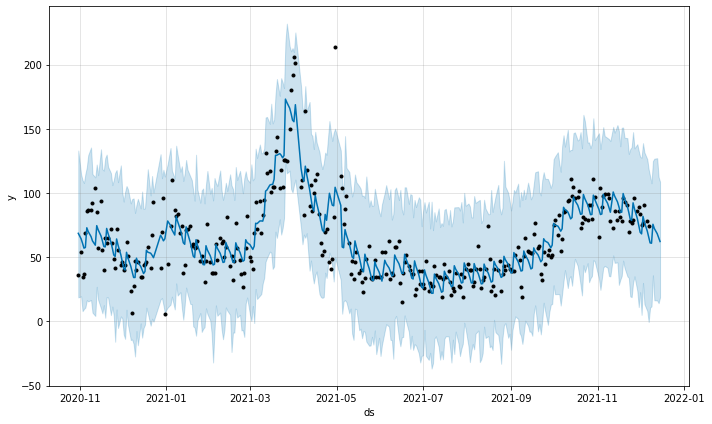

In [224]:
m1.plot(forecast);

<AxesSubplot:>

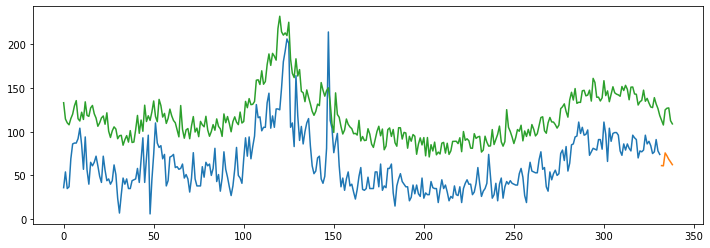

In [225]:
d2['y'].plot()
forecast['yhat'][-7:].plot()
forecast['yhat_upper'].plot()

In [226]:
future_dates

,ds,is_before
0,2020-10-31,0
1,2020-11-02,0
2,2020-11-03,0
3,2020-11-04,0
4,2020-11-05,0
...,...,...
334,2021-12-10,0
335,2021-12-11,0
336,2021-12-13,0
337,2021-12-14,0


In [227]:
d2

,ds,y,is_before
0,2020-10-31,36,0
1,2020-11-02,54,0
2,2020-11-03,35,0
3,2020-11-04,37,0
4,2020-11-05,69,0
...,...,...,...
327,2021-12-02,75,0
328,2021-12-03,77,0
329,2021-12-04,91,0
330,2021-12-06,78,0


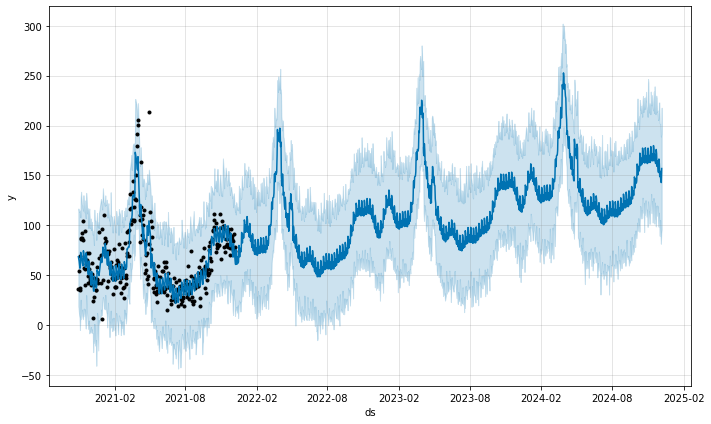

In [228]:
future_dates = m1.make_future_dataframe(periods = 3*365)
future_dates['is_before'] = future_dates['ds'].apply(is_before)
forecast = m1.predict(future_dates)
m1.plot(forecast);

<AxesSubplot:>

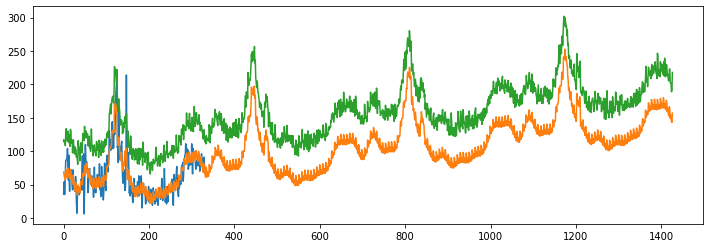

In [229]:
d2['y'].plot()
forecast['yhat'].plot()
forecast['yhat_upper'].plot()

In [335]:
#dodać szum do forecast-yhat

In [236]:
def metrics(y, y_hat):
    koszt = 0
    for i in range(len(y)):
        #koszt += (y[i] - y_hat[i]) // 10 * 10 + ((y[i]- y_hat[i]) // 10 - 1) * 5
        koszt += math.floor(np.abs(y[i]-y_hat[i])) + (math.floor(np.abs(y[i]-y_hat[i])) // 10 ) * 5
    print('MAE:', np.mean(np.abs(y - y_hat)))
    print('RMSE:', np.sqrt(np.mean(np.square(y - y_hat))))
    print('MAPE:', np.mean(np.abs((y - y_hat)/y)*100))
    print('MAX:', np.max(np.abs(y - y_hat)))
    print('koszt:', koszt)

In [237]:
#Procentowe metryki - nie można użyć z przebiegami posiadającymi wartości zerowe

In [238]:
holidays=['2020-01-01','2020-01-06','2020-04-12','2020-04-13','2020-05-01','2020-05-03',
          '2020-05-31', '2020-06-11','2020-08-15','2020-11-01','2020-11-11','2020-12-25',
          '2020-12-26','2021-01-01','2021-01-06','2021-04-04','2021-04-05','2021-05-01',
          '2021-05-03','2021-05-23','2021-06-03','2021-08-15','2021-11-01','2021-11-11',
          '2021-12-25','2021-12-26'
         ]

In [233]:
#dodanie dni przed swietami rowniez jako swieta
holidays=['2020-01-01','2020-01-06','2020-04-12','2020-04-13','2020-05-01','2020-05-03',
          '2020-05-31', '2020-06-11','2020-08-15','2020-11-01','2020-11-11','2020-12-25',
          '2020-12-26','2021-01-01','2021-01-06',
          '2021-04-01','2021-04-02','2021-04-03','2021-04-04','2021-04-05',
          '2021-04-27','2021-04-28','2021-04-29','2021-04-30',
          '2021-05-01', '2021-05-02','2021-05-03','2021-05-04',
          '2021-05-23','2021-06-03','2021-08-15','2021-11-01','2021-11-11',
          '2021-12-25','2021-12-26',
          '2022-01-01','2022-01-06', '2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05',
          '2022-04-27','2022-04-28','2022-04-29','2022-04-30',
          '2022-05-01', '2022-05-02','2022-05-03','2022-05-04',
          '2022-05-23','2022-06-03','2022-08-15','2022-11-01','2022-11-11',
          '2022-12-25','2022-12-26',
          '2023-01-01','2023-01-06', '2023-04-01','2023-04-02','2023-04-03','2023-04-04','2023-04-05',
          '2023-04-27','2023-04-28','2023-04-29','2023-04-30',
          '2023-05-01', '2023-05-02','2023-05-03','2023-05-04',
          '2023-05-23','2023-06-03','2023-08-15','2023-11-01','2023-11-11',
          '2023-12-25','2023-12-26',
          '2024-01-01','2024-01-06','2024-04-01','2024-04-02','2024-04-03','2024-04-04','2024-04-05',
          '2024-04-27','2024-04-28','2024-04-29','2024-04-30',
          '2024-05-01','2024-05-02','2024-05-03','2024-05-04',
          '2024-05-23','2024-06-03','2024-08-15','2024-11-01','2024-11-11',
          '2024-12-25','2024-12-26'
         ]

In [234]:

state = pd.DataFrame({'ds': pd.to_datetime(holidays),
                      'holiday': 'state_holiday'
                      })
holidays = state
holidays

,ds,holiday
0,2020-01-01,state_holiday
1,2020-01-06,state_holiday
2,2020-04-12,state_holiday
3,2020-04-13,state_holiday
4,2020-05-01,state_holiday
...,...,...
96,2024-08-15,state_holiday
97,2024-11-01,state_holiday
98,2024-11-11,state_holiday
99,2024-12-25,state_holiday


In [235]:
'''
MAE, RMSE, MAPE

MAX:(y - y_hat)

Tabelki porównujące różne przypadki,
przypadek - lipiec - wrzesień - standardowy przebieg

Sprawdzić unikatową ilość sklepów do danego okresu czasu - luty/marzec , lipiec/sierpien 2021

poprzednie lata zasymulować 

'''

'\nMAE, RMSE, MAPE\n\nMAX:(y - y_hat)\n\nTabelki porównujące różne przypadki,\nprzypadek - lipiec - wrzesień - standardowy przebieg\n\nSprawdzić unikatową ilość sklepów do danego okresu czasu - luty/marzec , lipiec/sierpien 2021\n\npoprzednie lata zasymulować \n\n'

In [342]:
'''
Sprawdzić suwaki
Czy z innych danych mozna skorzystac które maja dluzszy zakres

Dodac syntetycznie poprzednie lata, zrobić symulację w różnych miejscach w czasie(zdjecie slack), 
Sprawdzić pliki z poprzednich lat dla innej kategorii (holding)
Stworzyć tabele - metryki MAE, RMSE, MAPE,MAX:(y - y_hat)
Sprawdzić unikatową ilość sklepów do danego okresu czasu(zdj mail, unique - nazwa sklepu)

'''

'\nSprawdzić suwaki\nCzy z innych danych mozna skorzystac które maja dluzszy zakres\n\nDodac syntetycznie poprzednie lata, zrobić symulację w różnych miejscach w czasie(zdjecie slack), \nSprawdzić pliki z poprzednich lat dla innej kategorii (holding)\nStworzyć tabele - metryki MAE, RMSE, MAPE,MAX:(y - y_hat)\nSprawdzić unikatową ilość sklepów do danego okresu czasu(zdj mail, unique - nazwa sklepu)\n\n'

In [343]:
df1=df[df['MiastoSklepu'].str.match('Kraków')].reset_index()

In [344]:
'''
Warszawa - różnica w ilości zamówień dla carrefour a pozostałych - dołączenie kolejnych sklepów musi byc 
dodatkowo przeskalowane przez 'wagę' sklepu
'''

"\nWarszawa - różnica w ilości zamówień dla carrefour a pozostałych - dołączenie kolejnych sklepów musi byc \ndodatkowo przeskalowane przez 'wagę' sklepu\n"

In [345]:
'''
Warszawa 
początkowo 4 sklepy, 10.11.2020 dochodzi kolejny Carrefour, 21.11.2020, następne 3 sklepy, 20/24.11 ostatnie sklepy

'''

'\nWarszawa \npoczątkowo 4 sklepy, 10.11.2020 dochodzi kolejny Carrefour, 21.11.2020, następne 3 sklepy, 20/24.11 ostatnie sklepy\n\n'

In [346]:
df[df['MiastoSklepu'].str.match('Kraków')].groupby(df['AdresSklepu']).count()['AdresSklepu']

AdresSklepu
Daszyńskiego 3  31-537 Kraków      1233
M.Medweckiego 2  31-870 Kraków     3117
Pawia 5  31-154 Kraków             8018
Pokoju 44  31-564 Kraków           3576
Witosa 7  30-612 Kraków            7868
Name: AdresSklepu, dtype: int64

In [347]:
#df1[0:400].groupby(df1['AdresSklepu']).count()['AdresSklepu']

In [348]:
#df1[0:1350].tail()['DataDodania']

In [349]:
for i in df1['AdresSklepu'].unique():
    x = df1[df1['AdresSklepu']==i].head(3)
    print(x['DataDodania'],x['NazwaSklepu'][0:1],x['AdresSklepu'][0:1])

0    2020-10-30 09:57:22.430943200
51   2020-11-02 14:38:29.970727800
57   2020-11-03 09:30:31.350396900
Name: DataDodania, dtype: datetime64[ns] 0    Carrefour Plaza
Name: NazwaSklepu, dtype: object 0    Pokoju 44  31-564 Kraków 
Name: AdresSklepu, dtype: object
1    2020-10-30 09:59:23.319151400
4    2020-10-30 10:57:22.636812100
47   2020-11-02 12:13:51.790121900
Name: DataDodania, dtype: datetime64[ns] 1    Carrefour Czyżyny
Name: NazwaSklepu, dtype: object 1    M.Medweckiego 2  31-870 Kraków 
Name: AdresSklepu, dtype: object
2    2020-10-30 10:06:25.251951500
8    2020-10-30 11:42:23.421849100
13   2020-10-30 12:48:25.400675000
Name: DataDodania, dtype: datetime64[ns] 2    Carrefour Witosa
Name: NazwaSklepu, dtype: object 2    Witosa 7  30-612 Kraków 
Name: AdresSklepu, dtype: object
3   2020-10-30 10:51:38.025605600
5   2020-10-30 11:25:26.999301600
6   2020-10-30 11:36:37.075508000
Name: DataDodania, dtype: datetime64[ns] 3    SPOŁEM Kraków
Name: NazwaSklepu, dtype: object 3    

In [350]:
for i in df1['AdresSklepu'].unique():
    x = df1[df1['AdresSklepu']==i].head(3)
    print(x['DataDodania'].dt.date)

0     2020-10-30
51    2020-11-02
57    2020-11-03
Name: DataDodania, dtype: object
1     2020-10-30
4     2020-10-30
47    2020-11-02
Name: DataDodania, dtype: object
2     2020-10-30
8     2020-10-30
13    2020-10-30
Name: DataDodania, dtype: object
3    2020-10-30
5    2020-10-30
6    2020-10-30
Name: DataDodania, dtype: object
1163    2020-11-20
1199    2020-11-20
1219    2020-11-20
Name: DataDodania, dtype: object


In [351]:
df1['AdresSklepu'].unique()

array(['Pokoju 44  31-564 Kraków ', 'M.Medweckiego 2  31-870 Kraków ',
       'Witosa 7  30-612 Kraków ', 'Daszyńskiego 3  31-537 Kraków ',
       'Pawia 5  31-154 Kraków '], dtype=object)

In [352]:
tmp=[]
for sklep in df1['AdresSklepu'].unique():
    tmp.append(df1[df1['AdresSklepu'].str.match(sklep)].reset_index())

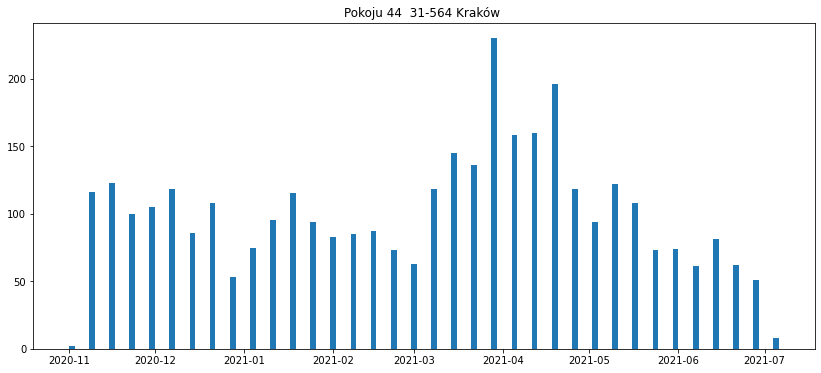

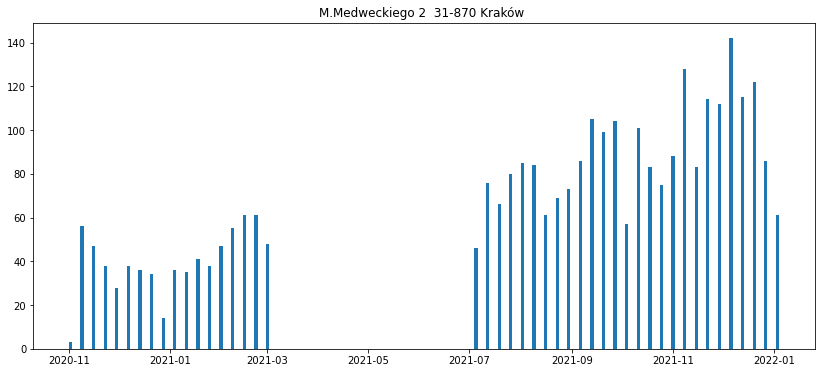

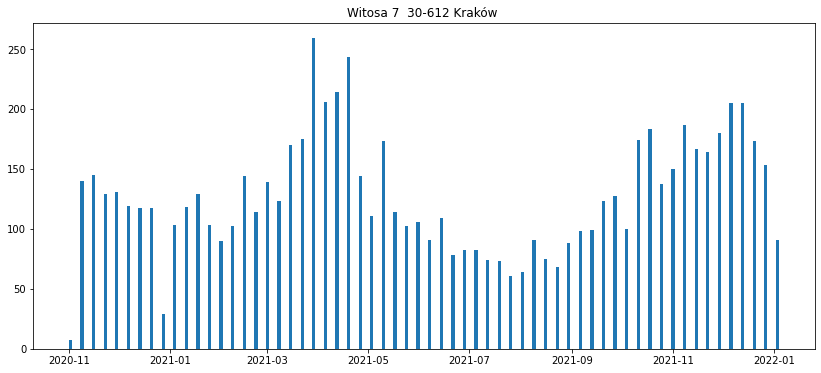

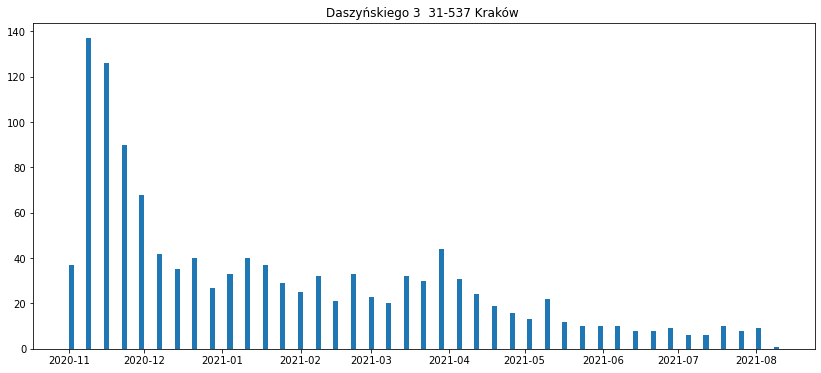

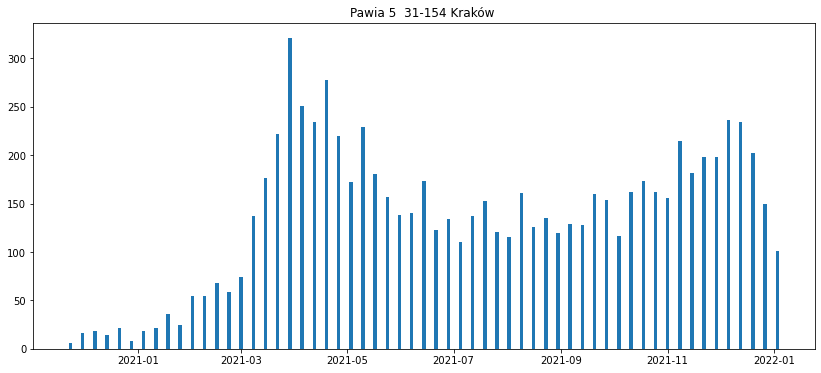

In [353]:
plt.rcParams["figure.figsize"] = (14,6)
for i in range(len(tmp)):
    week_date = tmp[i].resample('W-Mon', on='DataRozpoczecia').sum().reset_index().sort_values(by='DataRozpoczecia')[['DataRozpoczecia','Lp']]

    plt.bar(week_date['DataRozpoczecia'], week_date['Lp'], label='Tydzień', width=2)
    
    plt.title(tmp[i]['AdresSklepu'][0])
    plt.show()
    
    #result = seasonal_decompose(week_date['DataRozpoczecia'], model='additive')
    #result.plot()

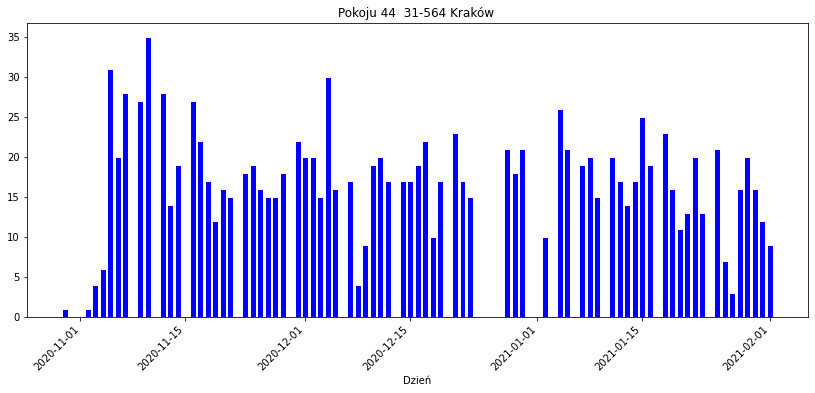

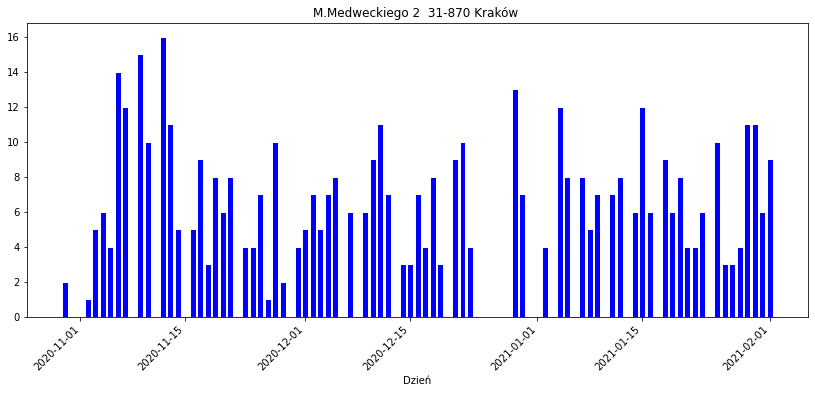

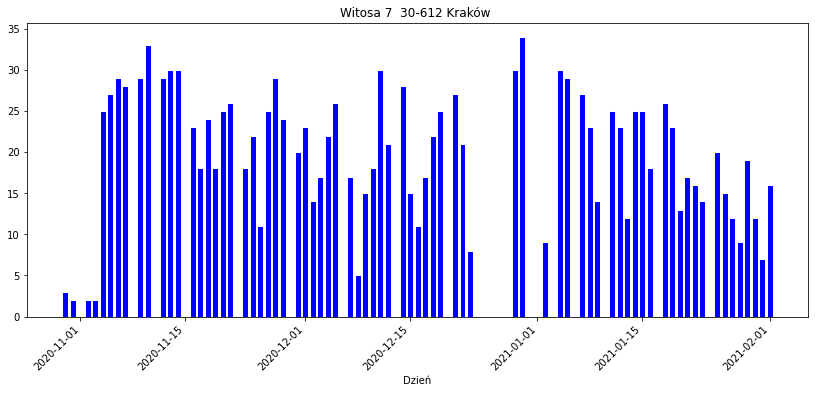

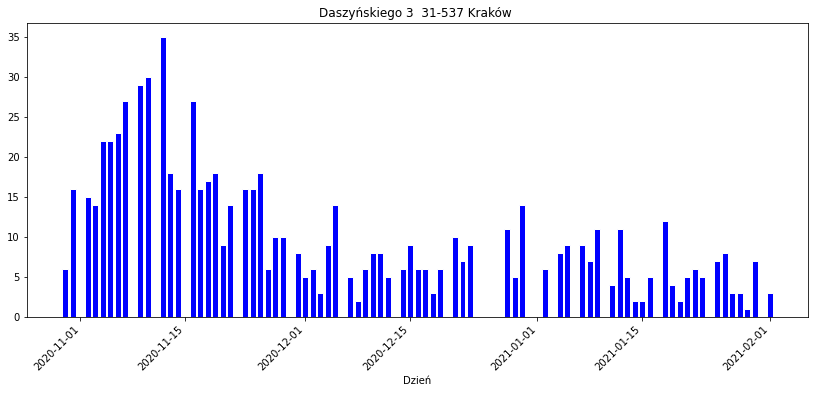

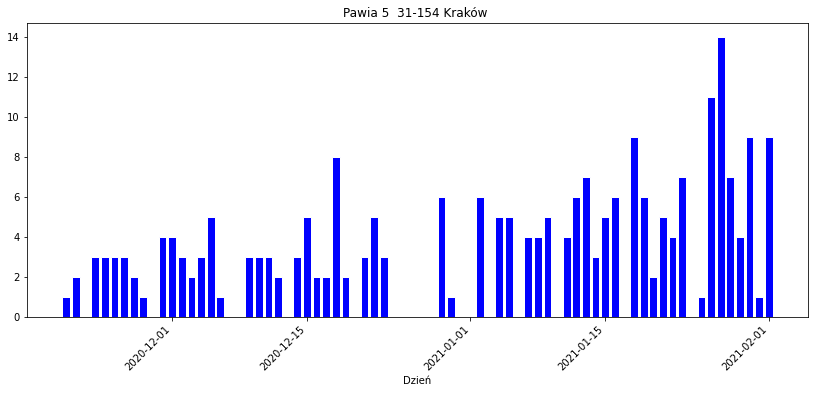

In [354]:
startdate = pd.to_datetime("2020-11-01").date()
enddate = pd.to_datetime("2021-02-01").date()
for i in range(len(tmp)): 
    data_date = tmp[i].groupby(pd.to_datetime(tmp[i]['DataRozpoczecia']).dt.date).agg({"Lp":"sum"})
    #data_date.loc[startdate:enddate].plot(kind='bar',title=miasto,xlabel='Dzień');
    #plt.bar(data_date['DataRozpoczecia'], data_date['Lp'], label='Dzień', width=0.8)
    #plt.bar(data_date[0:90].index, data_date[0:90]['Lp'], label='Dzień', width=0.8)
    plt.bar(data_date.loc[:enddate].index,data_date.loc[:enddate]['Lp'],color="blue",edgecolor='white', width=0.8)
    plt.title(tmp[i]['AdresSklepu'][0])
    plt.xlabel('Dzień')
    #print(df_test.head())

    ax.xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate(rotation=45)
    ax.xaxis.set_major_locator(dates.DayLocator(interval=1))


    plt.show()

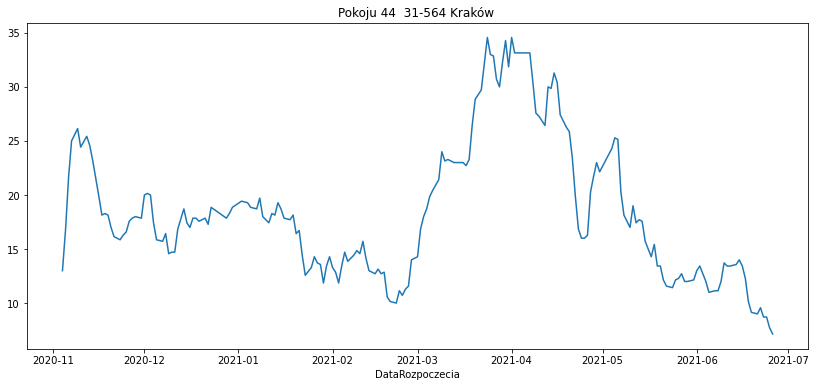

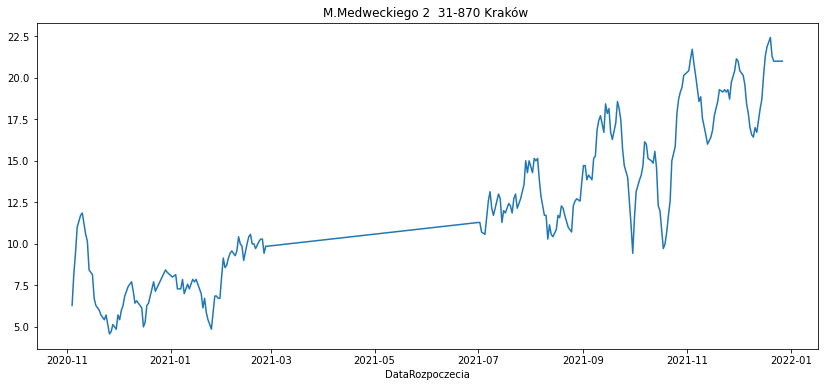

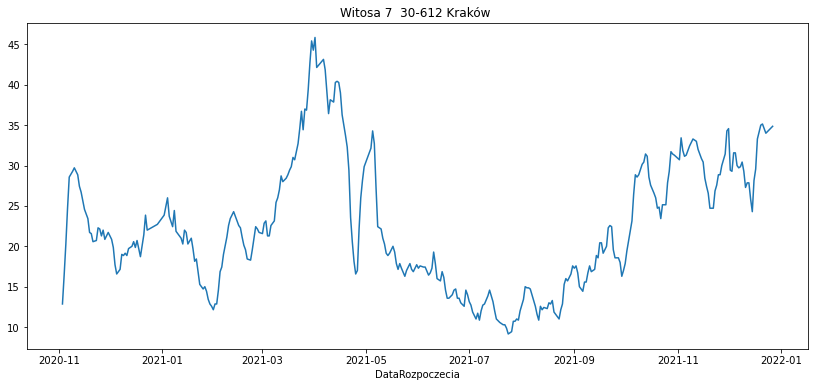

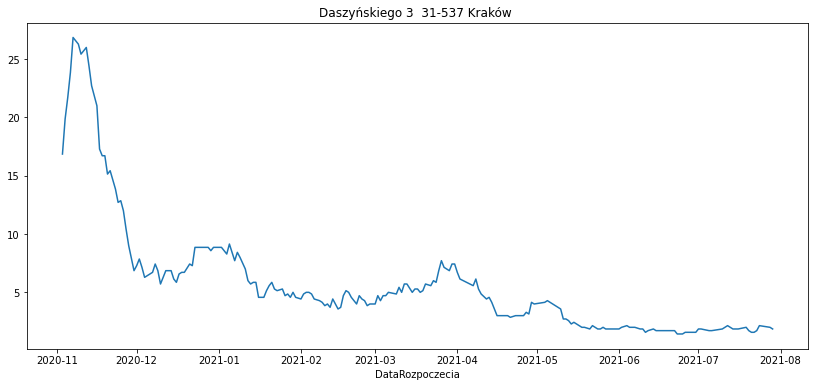

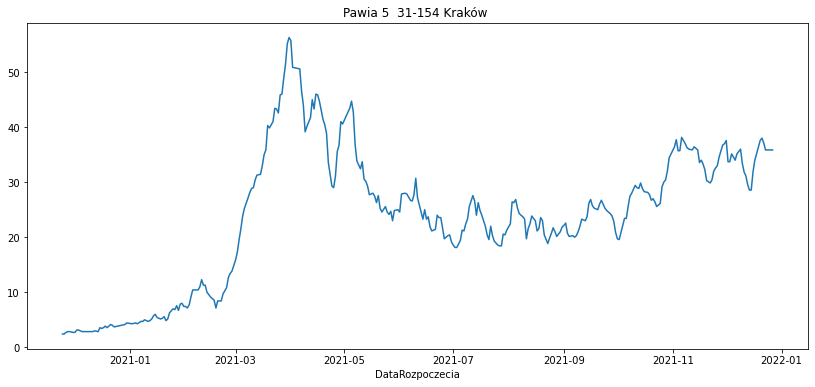

In [355]:
for i in range(len(tmp)): 
    data_date = tmp[i].groupby(pd.to_datetime(tmp[i]['DataRozpoczecia']).dt.date).agg({"Lp":"sum"})
    
    result = seasonal_decompose(data_date, model='additive',period = 7)
    result.trend.plot()
    plt.title(tmp[i]['AdresSklepu'][0])
    plt.show()

In [356]:
'''
Tabela
Zestawienie parametrów
1 Tabela - Warszawa 7 dni
2 Tabela Warszawa 14 dni
5 skala błedów - taka różnica danego dnia - tyle złotych kary, 10bledow zł, 20bl - 25zł (20 + 5), 30błędow - 40
'''

'\nTabela\nZestawienie parametrów\n1 Tabela - Warszawa 7 dni\n2 Tabela Warszawa 14 dni\n5 skala błedów - taka różnica danego dnia - tyle złotych kary, 10bledow zł, 20bl - 25zł (20 + 5), 30błędow - 40\n'

In [357]:
###############################################################

In [358]:
#Załadowanie kategorii z dłyższym okresem

In [359]:
files

['.ipynb_checkpoints',
 '2019.csv',
 '2020.csv',
 '2021.csv',
 '2021_calosc.csv',
 'zakupy 2020.xlsx',
 'zakupy 2021.xlsx',
 'Zakupy.ipynb',
 'Zlecenia.ipynb',
 'Zlecenia_csv.ipynb',
 'ZlecenieTransportowe 2016.xlsx',
 'ZlecenieTransportowe 2017.xlsx',
 'ZlecenieTransportowe 2018.xlsx',
 'ZlecenieTransportowe 2019.xlsx',
 'ZlecenieTransportowe 2020.xlsx',
 'ZlecenieTransportowe 2021.xlsx']

In [360]:
files_csv = [f for f in files if f[:8] == 'Zlecenie']
files_csv

['ZlecenieTransportowe 2016.xlsx',
 'ZlecenieTransportowe 2017.xlsx',
 'ZlecenieTransportowe 2018.xlsx',
 'ZlecenieTransportowe 2019.xlsx',
 'ZlecenieTransportowe 2020.xlsx',
 'ZlecenieTransportowe 2021.xlsx']

In [361]:
df_1 = pd.DataFrame()

In [362]:
for f in files_csv:
    data = pd.read_excel(f)
    df_1 = df_1.append(data)

In [363]:
df_1=df_1.reset_index()
del df_1['index']

In [364]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113280 entries, 0 to 2113279
Data columns (total 34 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   NumerZlecenia                 object 
 1   LokalizacjaAkcji              object 
 2   LokalizacjaPoczatkowa         object 
 3   LokalizacjaKoncowa            object 
 4   CzasPrzejazdu                 object 
 5   PrzebytyDystans               object 
 6   SredniaPredkosc               object 
 7   OcenaJazdyExpress             object 
 8   OcenaPredkosciExpress         object 
 9   OcenaOgolnaExpress            object 
 10  NajwyzszaPredkosc             object 
 11  OcenaRezerwacjiCms            object 
 12  IdWsparciaCms                 float64
 13  IdRezerwacjiCms               float64
 14  OddzialObslugujacy            object 
 15  AsystaDoId                    object 
 16  NadrzedneZlecenieGodzinoweId  object 
 17  Id                            int64  
 18  PlanowanaDataRozpoczec

In [365]:
#df_1.LokalizacjaAkcji.fillna(df_1.MiastoSklepu, inplace=True)
#df_1 = df_1.dropna(subset=['PlanowanaDataRozpoczecia'])

In [366]:
df_1['PlanowanaDataRozpoczecia']= pd.to_datetime(df_1['PlanowanaDataRozpoczecia'], errors='coerce')
df_1['PlanowanaDataZakonczenia']= pd.to_datetime(df_1['PlanowanaDataZakonczenia'], errors='coerce')
df_1['DataZakonczenia']= pd.to_datetime(df_1['DataZakonczenia'], errors='coerce')
df_1['ZadeklarowanaData']= pd.to_datetime(df_1['ZadeklarowanaData'], errors='coerce')
df_1['DataRozpoczecia']= pd.to_datetime(df_1['DataRozpoczecia'], errors='coerce')
df_1['DataDodania']= pd.to_datetime(df_1['DataDodania'], errors='coerce')

In [367]:
df_1 = df_1.dropna(subset=['PlanowanaDataRozpoczecia'])

In [368]:
df_1=df_1.reset_index()
del df_1['index']

In [369]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113273 entries, 0 to 2113272
Data columns (total 34 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   NumerZlecenia                 object        
 1   LokalizacjaAkcji              object        
 2   LokalizacjaPoczatkowa         object        
 3   LokalizacjaKoncowa            object        
 4   CzasPrzejazdu                 object        
 5   PrzebytyDystans               object        
 6   SredniaPredkosc               object        
 7   OcenaJazdyExpress             object        
 8   OcenaPredkosciExpress         object        
 9   OcenaOgolnaExpress            object        
 10  NajwyzszaPredkosc             object        
 11  OcenaRezerwacjiCms            object        
 12  IdWsparciaCms                 float64       
 13  IdRezerwacjiCms               float64       
 14  OddzialObslugujacy            object        
 15  AsystaDoId                    ob

In [370]:
#df_1 = df_1[df_1['DataZakonczenia']>df_1['DataRozpoczecia']]

In [371]:
df_1['day_of_week'] = df_1['PlanowanaDataRozpoczecia'].dt.dayofweek #wartosć numeryczna

In [372]:
df_1['KategoriaZlecenia'].value_counts()

Zlecenie odbioru                                       643328
Zlecenie podstawienia                                  623008
Transport logistyczny - transport między oddziałami    135857
Zakupy                                                  89584
Nocne wsparcie techniczne                               82786
Zwrot z serwisu                                         81622
Transport do myjni                                      69730
Transport z myjni                                       68786
Zlecenie asysty                                         61637
Zlecenie godzinowe                                      53547
Podstawienie do serwisu                                 50413
Myjnia wewnętrzna                                       43982
Wsparcie techniczne Traficar                            32174
Transport logistyczny - wycofanie                       20564
Zlecenie opisania                                       16598
Inna                                                    15669
Pickup  

In [373]:
df_1.head()

,NumerZlecenia,LokalizacjaAkcji,LokalizacjaPoczatkowa,LokalizacjaKoncowa,CzasPrzejazdu,PrzebytyDystans,SredniaPredkosc,OcenaJazdyExpress,OcenaPredkosciExpress,OcenaOgolnaExpress,...,RezerwacjaWydanieId,SamochodId,NumerRejestracyjny,Subsystem,Stan,DataDodania,Uwagi,LokalizacjaDocelowa,LacznyCzasPracy,day_of_week
0,ZT/2016/371051,NaN,"Wrocław, PKP Dworzec Główny","Wrocław, PKP Dworzec Główny",NaN,NaN,NaN,NaN,NaN,NaN,...,300678,8809,KR867XA,brak,Zamkniete,2016-01-01 09:13:47.755275200,NaN,NaN,NaN,4
1,ZT/2016/371052,NaN,"Wrocław, PKP Dworzec Główny","Wrocław, PKP Dworzec Główny",NaN,NaN,NaN,NaN,NaN,NaN,...,300678,8809,KR867XA,brak,Anulowane,2016-01-01 09:13:47.880077600,NaN,NaN,NaN,2
2,ZT/2016/371053,NaN,"Warszawa, ul. Bokserska 64 - 24h","Warszawa, ul. Bokserska 64 - 24h",NaN,NaN,NaN,NaN,NaN,NaN,...,293947,18315,WI4027X,brak,Anulowane,2016-01-01 09:40:34.071365300,NaN,NaN,NaN,0
3,ZT/2016/371054,NaN,Rzeszów,Rzeszów,NaN,NaN,NaN,NaN,NaN,NaN,...,300680,20530,WI6193Y,brak,Zamkniete,2016-01-01 10:07:48.499196000,NaN,NaN,NaN,5
4,ZT/2016/371055,NaN,Rzeszów,Rzeszów,NaN,NaN,NaN,NaN,NaN,NaN,...,300680,20530,WI6193Y,brak,Zamkniete,2016-01-01 10:07:48.561597200,NaN,NaN,NaN,0


In [374]:
df_2=df_1.loc[df_1['KategoriaZlecenia'] == 'Zlecenie podstawienia']

In [375]:
df_2=df_2.reset_index()
del df_2['index']

In [376]:
df_2['Lp']=1

In [377]:
df_2 = df_2[df_2['PlanowanaDataRozpoczecia'].dt.year > 2015]

In [378]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622579 entries, 0 to 623007
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   NumerZlecenia                 622570 non-null  object        
 1   LokalizacjaAkcji              7 non-null       object        
 2   LokalizacjaPoczatkowa         594059 non-null  object        
 3   LokalizacjaKoncowa            298830 non-null  object        
 4   CzasPrzejazdu                 149870 non-null  object        
 5   PrzebytyDystans               149870 non-null  object        
 6   SredniaPredkosc               149870 non-null  object        
 7   OcenaJazdyExpress             149117 non-null  object        
 8   OcenaPredkosciExpress         149117 non-null  object        
 9   OcenaOgolnaExpress            149117 non-null  object        
 10  NajwyzszaPredkosc             149870 non-null  object        
 11  OcenaRezerwac

In [379]:
#Sprzedaż danego dnia tygodnia
data_sales_weekday = df_2.groupby(df_2['day_of_week']).agg({"Lp":"sum"})
#Sprzedaż w danych godzinach
data_sales_hour = df_2.groupby(df_2['PlanowanaDataRozpoczecia'].dt.hour).agg({"Lp":"sum"})
#Sprzedaż danego dnia miesiąca
data_sales_day = df_2.groupby(df_2['PlanowanaDataRozpoczecia'].dt.day).agg({"Lp":"sum"})
#Sprzedaż danego miesiąca
data_sales_month = df_2.groupby(df_2['PlanowanaDataRozpoczecia'].dt.month).agg({"Lp":"sum"})
#Sprzedaż danego roku
data_sales_year = df_2.groupby(df_2['PlanowanaDataRozpoczecia'].dt.year).agg({"Lp":"sum"})
#Sprzedaż w danych godzinach - Data zakończenia
data_sales_hour_z = df_2.groupby(df_2['PlanowanaDataRozpoczecia'].dt.hour).agg({"Lp":"sum"})
#Sprzedaż danego tygodnia w roku
data_sales_week = df_2.groupby(df_2['PlanowanaDataRozpoczecia'].dt.week).agg({"Lp":"sum"})

<ipython-input-379-673766895286>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_sales_week = df_2.groupby(df_2['PlanowanaDataRozpoczecia'].dt.week).agg({"Lp":"sum"})


In [380]:
plt.rcParams["figure.figsize"] = (16,12)

<AxesSubplot:xlabel='Tydzień w roku'>

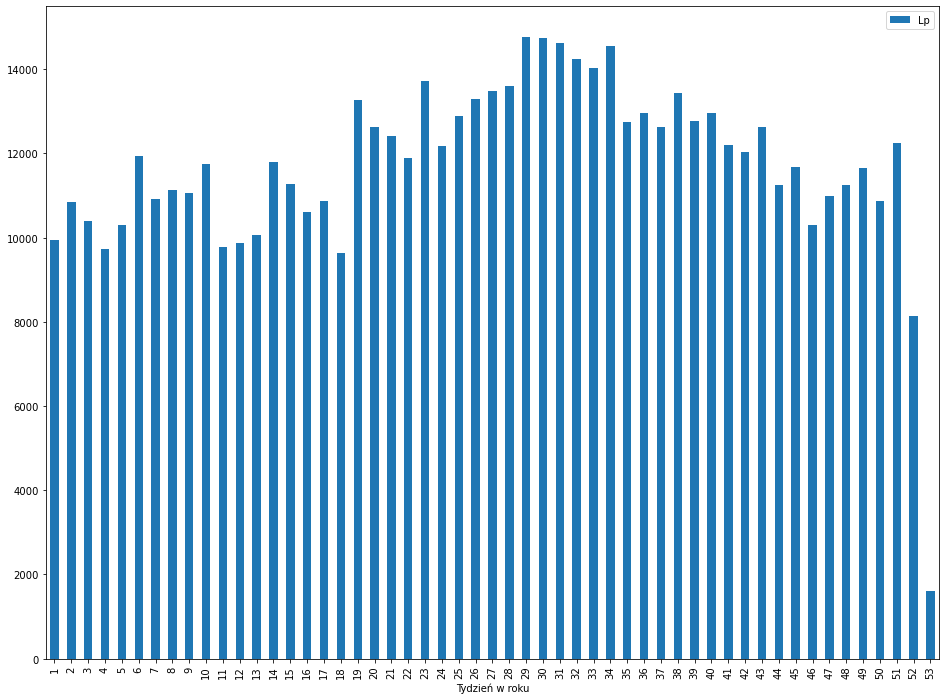

In [381]:
data_sales_week.plot(xlabel='Tydzień w roku',kind="bar")

<AxesSubplot:xlabel='Dzień Tygodnia'>

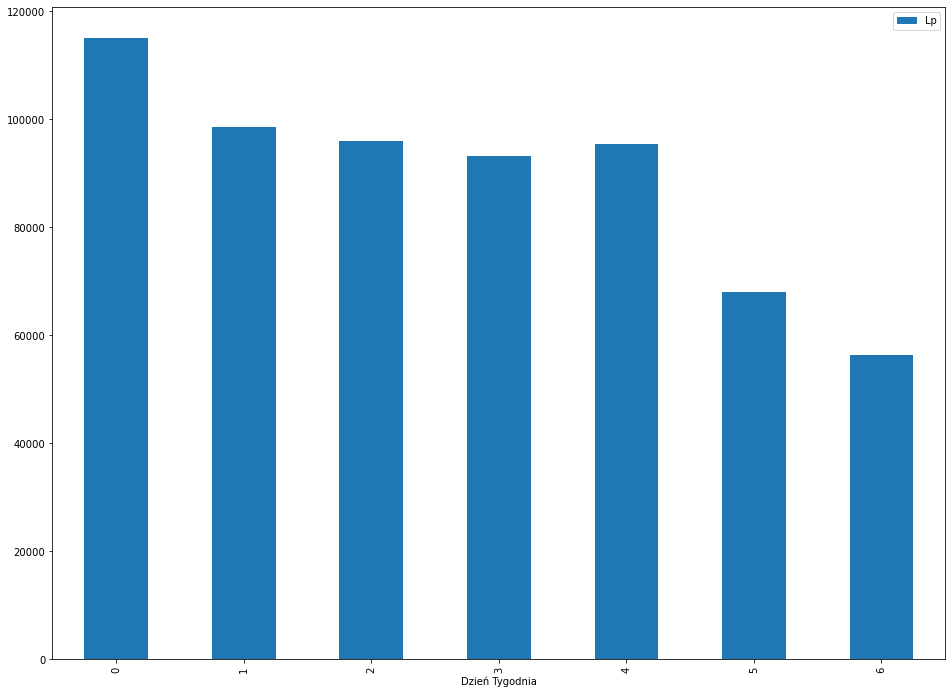

In [382]:
data_sales_weekday.plot(xlabel='Dzień Tygodnia',kind="bar")

<AxesSubplot:xlabel='Godzina'>

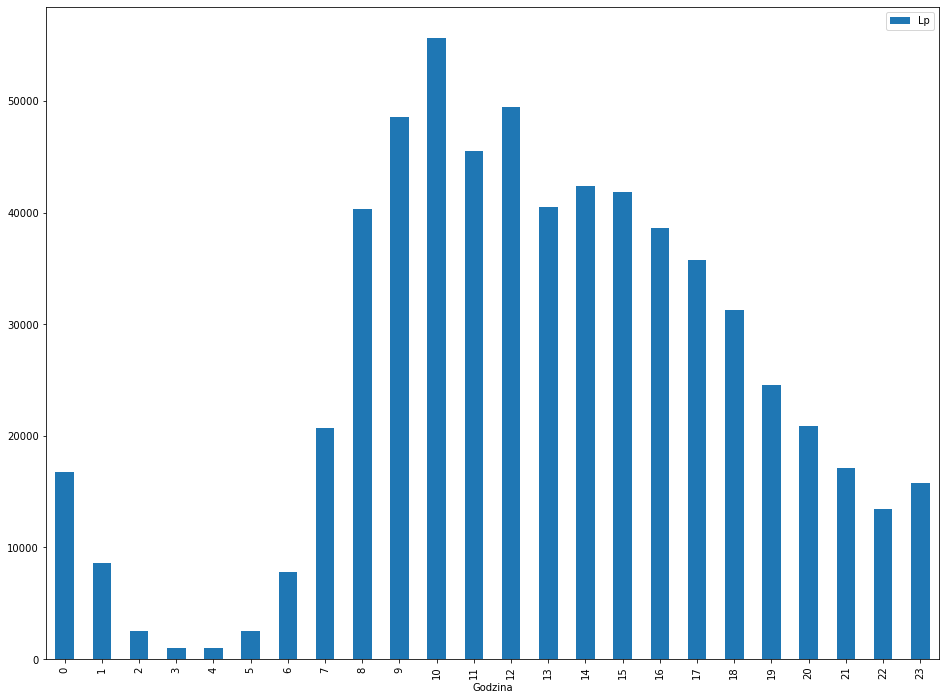

In [383]:
data_sales_hour.plot(xlabel='Godzina',kind="bar")

<AxesSubplot:xlabel='Dzień'>

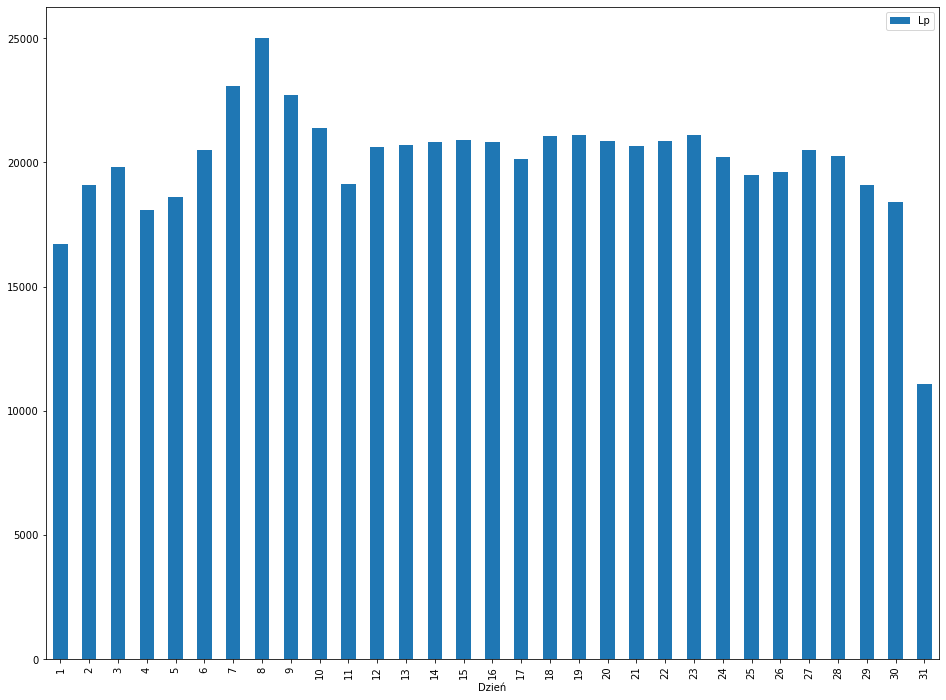

In [384]:
data_sales_day.plot(xlabel='Dzień',kind="bar")

<AxesSubplot:xlabel='Miesiąc'>

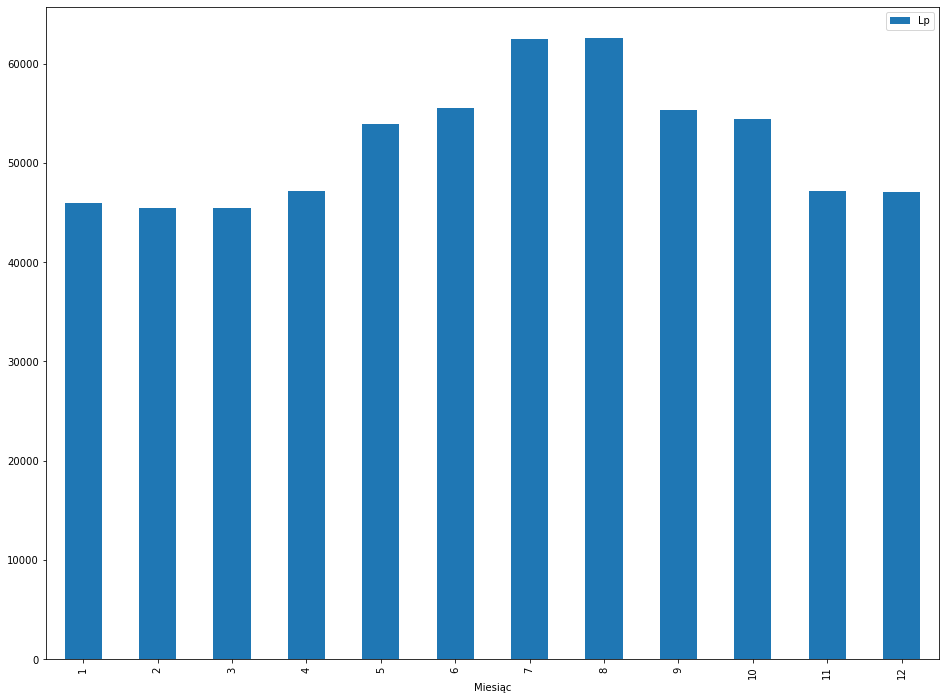

In [385]:
data_sales_month.plot(xlabel="Miesiąc",kind="bar")

<AxesSubplot:xlabel='Rok'>

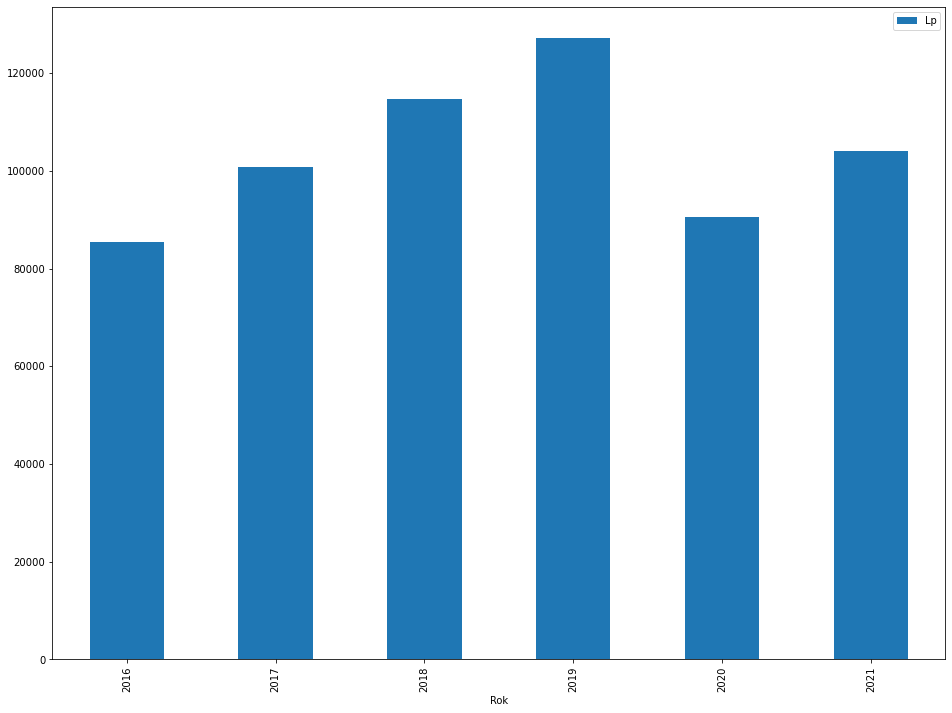

In [386]:
data_sales_year.plot(xlabel="Rok",kind="bar")

<AxesSubplot:xlabel='Dzień'>

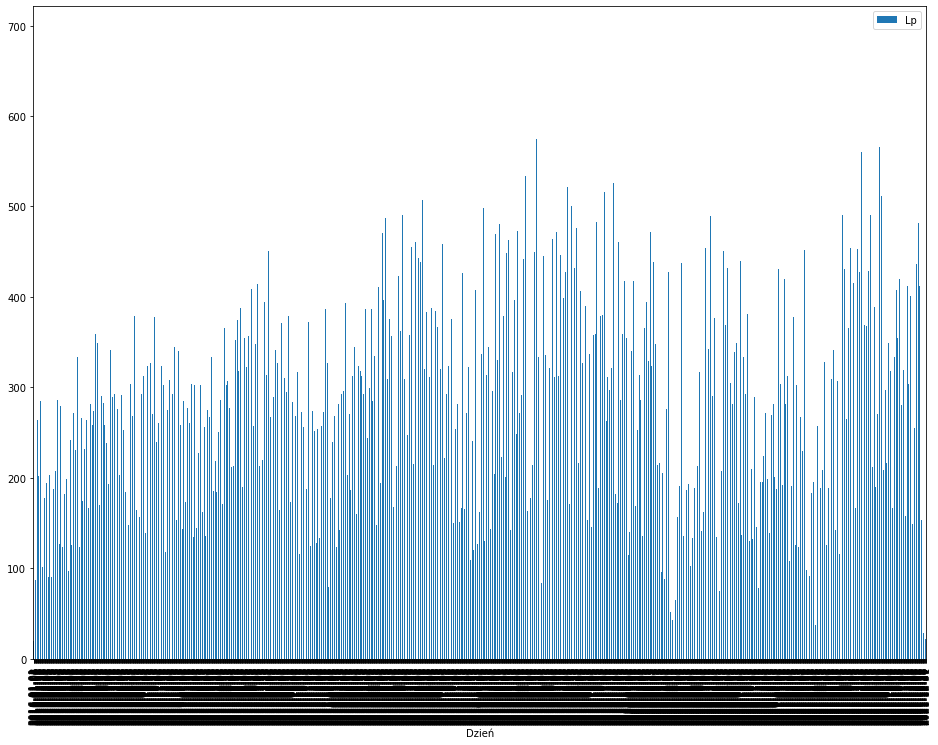

In [387]:
data_date = df_2.groupby(pd.to_datetime(df_2['PlanowanaDataRozpoczecia']).dt.date).agg({"Lp":"sum"})
data_date.plot(xlabel="Dzień",kind="bar")

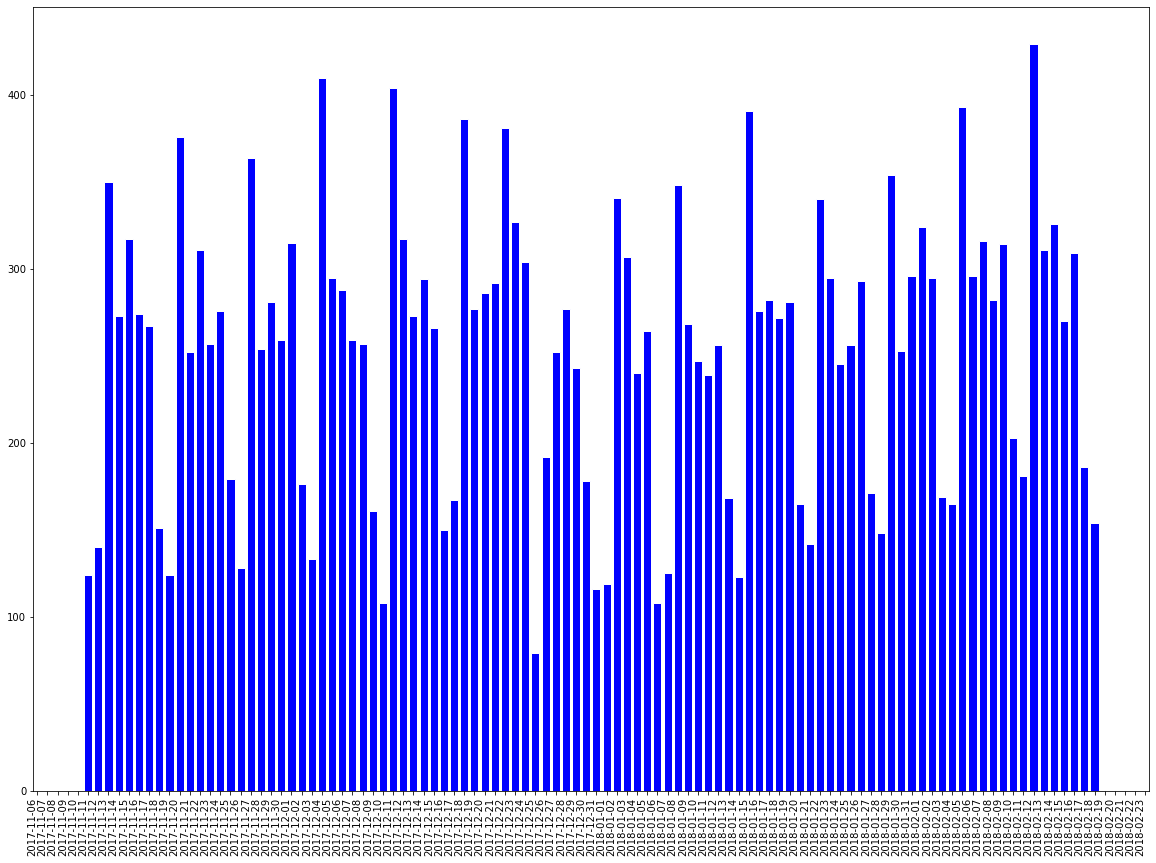

In [388]:
fig, ax = plt.subplots(figsize=(20, 16))
#converted_dates_1 = list(map(datetime.datetime.strptime, data_date.index, len(data_date.index)*['%Y-%m-%d']))
formatter = dates.DateFormatter('%Y-%m-%d')

#plt.bar(data_date.index[120:190],data_date['Lp'][120:190],color="blue",edgecolor='white', width=0.8)
#plt.bar(data_date.index[210:300],data_date['Lp'][210:300],color="blue",edgecolor='white', width=0.8)
plt.bar(data_date.index[680:780],data_date['Lp'][680:780],color="blue",edgecolor='white', width=0.8)

ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=90)
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))


plt.show()

<AxesSubplot:xlabel='Miesiąc'>

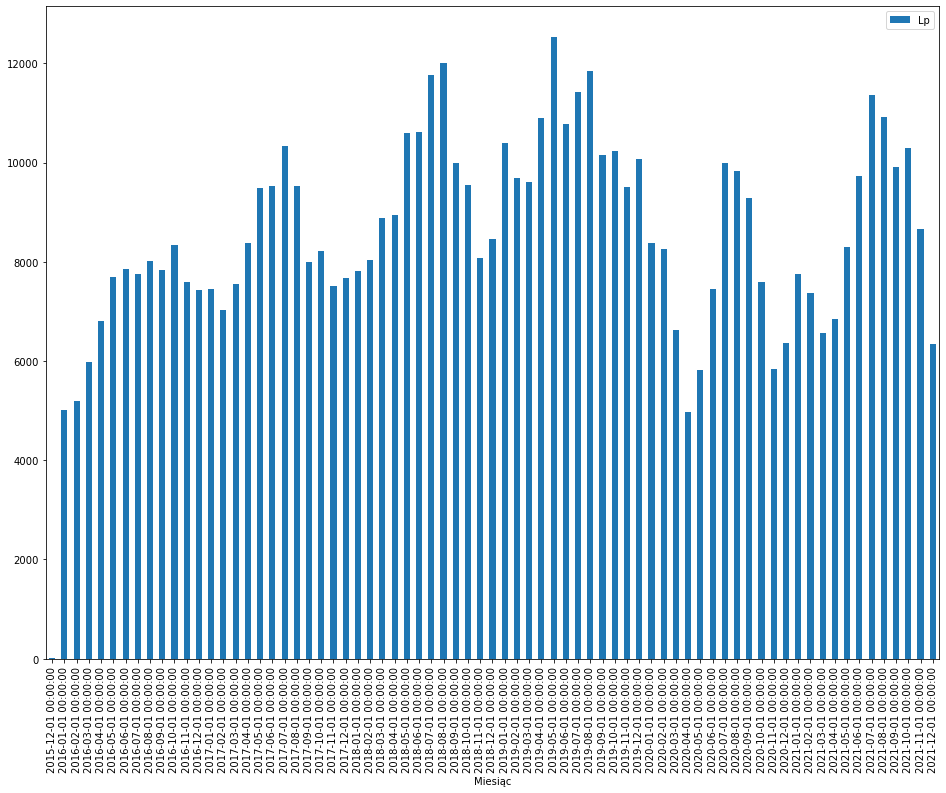

In [389]:
month_date = df_2.groupby(pd.to_datetime(df_2['PlanowanaDataRozpoczecia']).dt.date - pd.offsets.MonthBegin(1)).agg({"Lp":"sum"})
month_date.plot(xlabel="Miesiąc",kind="bar")

In [390]:
week_date = df_2.resample('W-Mon', on='PlanowanaDataRozpoczecia').sum().reset_index().sort_values(by='PlanowanaDataRozpoczecia')[['PlanowanaDataRozpoczecia','Lp']]

<BarContainer object of 314 artists>

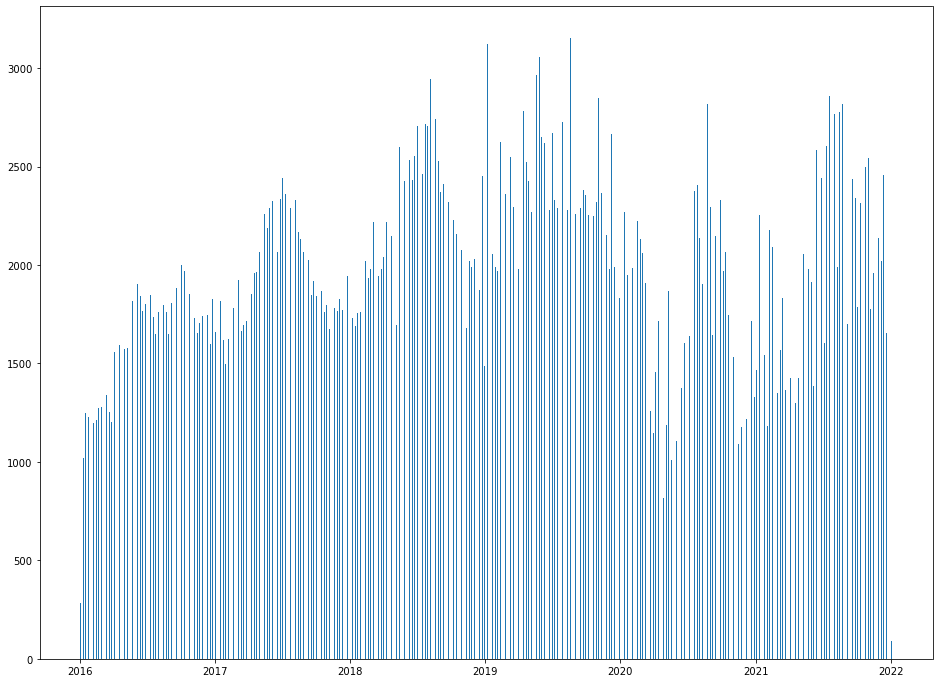

In [391]:
plt.bar(week_date['PlanowanaDataRozpoczecia'], week_date['Lp'], label='Tydzień', width=2)

In [392]:
#Prophet
sales = data_date

In [393]:
sales['Date'] = sales.index
sales = sales.reset_index()
sales=sales.drop(columns=['PlanowanaDataRozpoczecia'])
sales=sales.rename(columns={"Lp": "Sales"}, errors="raise")
sales['Date']= pd.to_datetime(sales['Date'], format='%Y-%m-%d')
sales = sales[['Date','Sales']]
sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales.head()

,ds,y
0,2016-01-01,19
1,2016-01-02,52
2,2016-01-03,55
3,2016-01-04,155
4,2016-01-05,163


In [394]:
sales.tail()

,ds,y
2187,2021-12-27,67
2188,2021-12-28,30
2189,2021-12-29,23
2190,2021-12-30,22
2191,2021-12-31,15


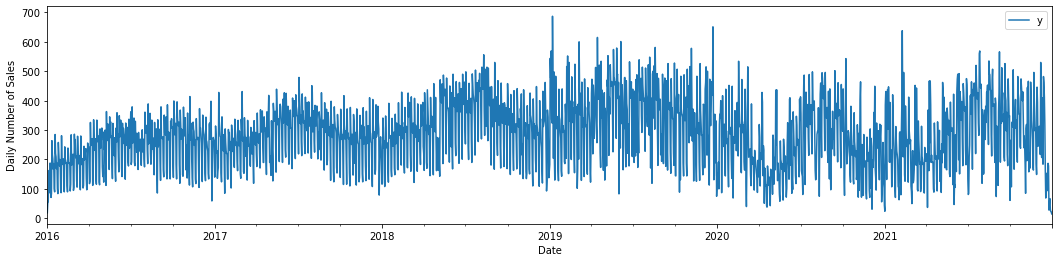

In [395]:
# plot daily sales
ax = sales.set_index('ds').plot(figsize = (18, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [396]:
train1 =[]
train1 = sales.drop(sales.index[-14:])

In [397]:
train1.tail()

,ds,y
2173,2021-12-13,482
2174,2021-12-14,462
2175,2021-12-15,412
2176,2021-12-16,316
2177,2021-12-17,165


In [398]:
sales.tail(10)

,ds,y
2182,2021-12-22,147
2183,2021-12-23,187
2184,2021-12-24,178
2185,2021-12-25,28
2186,2021-12-26,54
2187,2021-12-27,67
2188,2021-12-28,30
2189,2021-12-29,23
2190,2021-12-30,22
2191,2021-12-31,15


In [399]:
#predykcja dla kategorii zlecen podstawienia(5lat)
d1 = sales[:-174]

In [400]:
train=pd.DataFrame()
future_dates=[]

train = d1.drop(d1.index[-30:])
    
future_dates.append(pd.DataFrame(d1[:-23]['ds']))
future_dates.append(pd.DataFrame(d1[:-16]['ds']))
future_dates.append(pd.DataFrame(d1['ds']))


In [401]:
train

,ds,y
0,2016-01-01,19
1,2016-01-02,52
2,2016-01-03,55
3,2016-01-04,155
4,2016-01-05,163
...,...,...
1983,2021-06-06,159
1984,2021-06-07,430
1985,2021-06-08,473
1986,2021-06-09,490


MAE: 110.52467688068829
RMSE: 132.03318673117073
MAPE: 30.47600109714838
MAX: 258.5078796295671
koszt: 1136


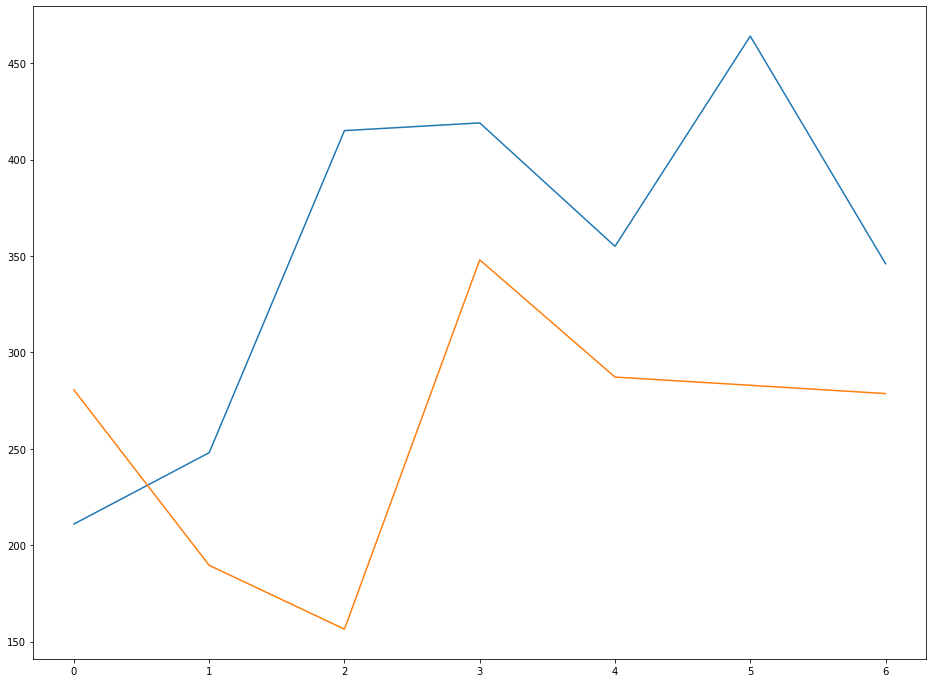

MAE: 143.72452759235085
RMSE: 168.4217222992153
MAPE: 70.50160782796742
MAX: 297.5078796295671
koszt: 2986


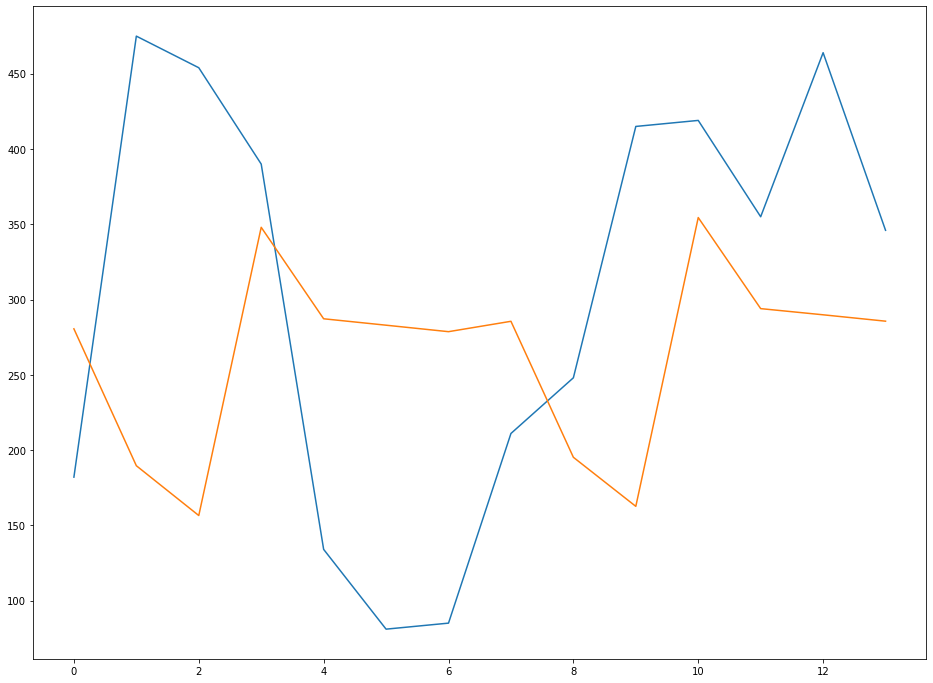

MAE: 101.88111521579506
RMSE: 118.20550098258397
MAPE: 40.63888423388277
MAX: 302.4196432182315
koszt: 4499


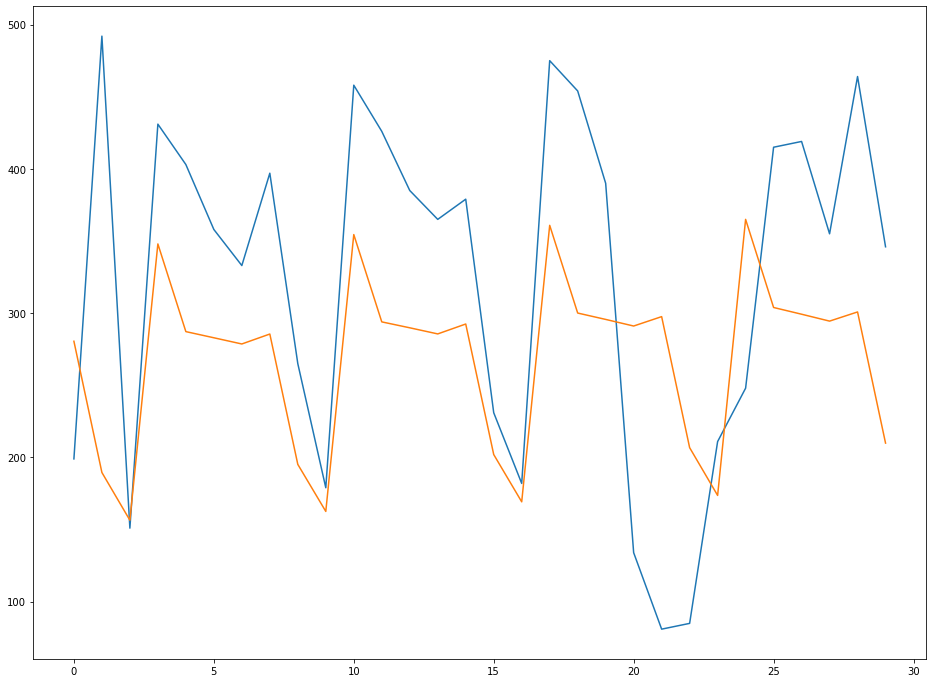

In [402]:
f=[7,14,30]


y_true=[]
y_true.append(d1['y'][-7:].values)
y_true.append(d1['y'][-14:].values)
y_true.append(d1['y'][-30:].values)
m = prophet.Prophet(interval_width = 0.95,
                    changepoint_prior_scale = 0.05,
                    seasonality_prior_scale = 0.1,
                    daily_seasonality=True,
                    weekly_seasonality=True,
                    yearly_seasonality=True 
                   )
m.add_country_holidays(country_name='PL')
m.fit(train)
for j in range(len(future_dates)):                      #przedziały czasowe - predict
    y_pred=[]
    forecast = m.predict(future_dates[j])
    #m.plot(forecast)
    y_pred = forecast['yhat'][-f[j]:].values
    #print(y_true[j],y_pred)
    metrics(y_true[j],y_pred)
    #print(y_true[j],y_pred)
    plt.plot(y_true[j])
    plt.plot(y_pred)
    plt.show()

In [403]:
#########

In [404]:
m = prophet.Prophet(interval_width = 0.95,
                    changepoint_prior_scale = 0.5,
                    seasonality_prior_scale = 0.1,
                    #holidays_prior_scale = 0.5,
                    daily_seasonality=True,
                    weekly_seasonality=True,
                    yearly_seasonality=True
                   )
m.add_country_holidays(country_name='PL')

In [405]:
#m = prophet.Prophet()

In [406]:
future_dates = pd.DataFrame(sales['ds'])
m.fit(train1)

In [407]:
forecast = m.predict(future_dates)

In [408]:
y_true = sales['y'][-14:].values 
y_pred = forecast['yhat'][-14:].values

In [409]:
print(y_true)
print(y_pred)

[ 69  76 153  94 147 187 178  28  54  67  30  23  22  15]
[253.93103083 217.61733449 411.15224758 353.76704068 345.80085562
 336.24662066 342.13020824  37.6991318   60.71059765 408.53852873
 350.38114182 341.770444   331.6934484  337.16657383]


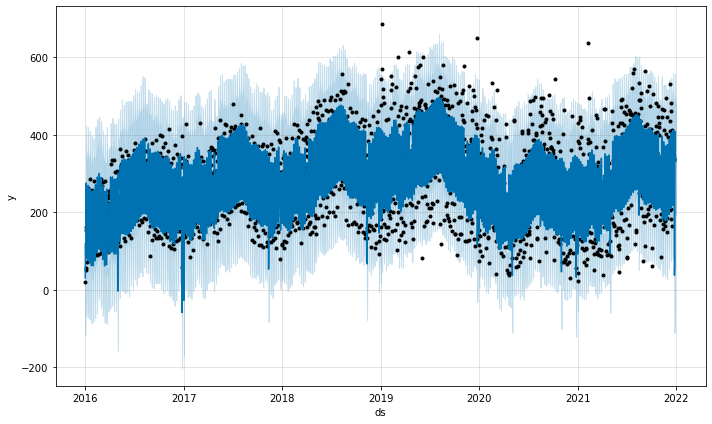

In [410]:
m.plot(forecast);

In [411]:
train1

,ds,y
0,2016-01-01,19
1,2016-01-02,52
2,2016-01-03,55
3,2016-01-04,155
4,2016-01-05,163
...,...,...
2173,2021-12-13,482
2174,2021-12-14,462
2175,2021-12-15,412
2176,2021-12-16,316


In [412]:
future_dates

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
2187,2021-12-27
2188,2021-12-28
2189,2021-12-29
2190,2021-12-30


In [413]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boże Narodzenie (drugi dzień),Boże Narodzenie (drugi dzień)_lower,Boże Narodzenie (drugi dzień)_upper,Boże Narodzenie (pierwszy dzień),...,Święto Państwowe,Święto Państwowe_lower,Święto Państwowe_upper,Święto Trzech Króli,Święto Trzech Króli_lower,Święto Trzech Króli_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,201.479563,-117.015972,177.120606,201.479563,201.479563,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.777164
1,2016-01-02,201.693277,-31.814770,279.254765,201.693277,201.693277,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.235261
2,2016-01-03,201.906992,-64.332007,223.361810,201.906992,201.906992,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.701768
3,2016-01-04,202.120706,118.095511,423.180731,202.120706,202.120706,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.212861
4,2016-01-05,202.334421,76.584232,366.344646,202.334421,202.334421,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.983799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021-12-27,328.037957,262.922842,558.293256,327.683360,328.539046,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408.538529
2188,2021-12-28,328.215325,194.103332,502.236748,327.759599,328.811717,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350.381142
2189,2021-12-29,328.392692,197.470991,492.962310,327.860426,329.085883,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,341.770444
2190,2021-12-30,328.570060,194.670181,480.918838,327.912411,329.336827,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331.693448


In [414]:
'''
poprawa modelu, do tego samego zestawu treningowego
poprawa metryk błędu, normalizacja kary
tabele sredniej, maksymalnej
zakupy dla kolejnych sklepów w największych miastach
automatyzacja wyników błędów
'''

'\npoprawa modelu, do tego samego zestawu treningowego\npoprawa metryk błędu, normalizacja kary\ntabele sredniej, maksymalnej\nzakupy dla kolejnych sklepów w największych miastach\nautomatyzacja wyników błędów\n'

In [415]:
#wyniki zrzucić do jedej tabeli, suma indywidualnych / liczba pomiarow
#poprawić date konca nauki modelu, okres treningowy o takiej samej dlugosci
#rozłożyc kary na taki sam okres czasu, miesiac 7/30, 14/30
#wykresy dla osobnych sklepow z danego miasta(pierwsze 3 miesiace jak wygladaja)

#Poszukac jakie parametry są najlepsze dla propheta
#Srednia dla tych 3 miast

In [416]:
#Wycinanie od poczatku do danego miejsca w czasie
#for i in range(len(d1)):
    #d1[i] = d1[i][:-33] #5.11
    #d1[i] = d1[i][:-86] #3.09
    #d1[i] = d1[i][:-116] #30.07
    #d1[i] = d1[i][:-139] #3.07
    #d1[i] = d1[i][:-187] #7.05
    #d1[i] = d1[i][:-209] #9.04
    #d1[i] = d1[i][:-231] #12.03
    #d1[i] = d1[i][:-261] #5.02

In [417]:
#Model dla tego samego okresu treningowego
#Daty do których przeprowadzany jest trening (train):
#9.11.2021 - 15.12 - 9.11 na 31 pozycji od konca daily_1
#29.10.2021 - 6.12 daily_1[0][:-8]
#27.08 - 1.10 daily_1[0][:-62]
#23.07 - 27.08 daily_1[0][:-92]
#25.06 - 30.07 daily_1[0][:-116]
#30.04 - 8.06 daily_1[0][:-161]
#2.04 - 12.05 daily_1[0][:-183]
#5.03 - 12.04 daily_1[0][:-207]
#29.01 - 5.03 daily_1[0][:-237]

In [475]:
#kara = []

In [559]:
#kara_1 = []

In [650]:
#d1=daily_1

In [674]:
#d1 - data[2]- cały przedział, train + 30 - kolejne linie z wyzszej komorki
d1=[]
#d1=daily_1
for i in range(len(daily_1)):
    d1.append(daily_1[i][:-237])

In [675]:
train=[]
future_dates=[]

for i in range(len(d1)):
    train.append(d1[i].drop(d1[i].index[-30:]))
    
future_dates.append(pd.DataFrame(d1[0][:-23]['ds']))
future_dates.append(pd.DataFrame(d1[0][:-16]['ds']))
future_dates.append(pd.DataFrame(d1[0]['ds']))


In [676]:
f=[7,14,30]

for i in range(len(train)):                            #miasta
    y_true=[]
    y_true.append(d1[i]['y'][-7:].values)
    y_true.append(d1[i]['y'][-14:].values)
    y_true.append(d1[i]['y'][-30:].values)
    m = prophet.Prophet(interval_width = 0.95,
                        changepoint_prior_scale = 0.3,
                        seasonality_prior_scale = 2,
                        holidays_prior_scale = 2,
                        daily_seasonality=False,
                        weekly_seasonality=True,
                        yearly_seasonality=False,
                        holidays=holidays
                       )
    m.fit(train[i])
    for j in range(len(future_dates)):                      #przedziały czasowe - predict
        y_pred=[]
        forecast = m.predict(future_dates[j])
        y_pred = forecast['yhat'][-f[j]:].values
        #print(y_true[j],y_pred)
        #metrics(y_true[j],y_pred)
        print(miasta[i], f[j])
        print(round(np.mean(np.abs(y_true[j] - y_pred)), 4))
        print(round(np.sqrt(np.mean(np.square(y_true[j] - y_pred))), 4))
        print(round(np.mean(np.abs((y_true[j] - y_pred)/y_true[j])*100), 4))
        print(round(np.max(np.abs(y_true[j] - y_pred)), 4))
        #koszt.append(metrics(y_true[j],y_pred));
        print(round(metrics(y_true[j],y_pred), 4));
        print(round(metrics(y_true[j],y_pred) / sum(y_true[2]), 4));
       

Warszawa 7
12.9406
17.4538
18.5622
35.7818
505.7143
0.3126
Warszawa 14
14.8581
19.2706
30.9181
38.7183
606.4286
0.3748
Warszawa 30
11.5671
14.5163
22.6035
35.4213
436.0
0.2695
Kraków 7
15.6008
19.5202
21.8207
36.6041
604.2857
0.3459
Kraków 14
12.2419
15.1364
19.165
31.1311
454.2857
0.26
Kraków 30
11.9793
14.4466
19.2351
35.5121
452.0
0.2587
Wrocław 7
1.7541
2.0011
15.84
3.6177
34.2857
0.0842
Wrocław 14
3.4925
4.3759
33.1421
10.9139
98.5714
0.2422
Wrocław 30
4.5956
5.7419
34.6998
12.5383
139.0
0.3415


In [608]:
#1 przypadek 27.08 - 1.10 - lekki wzrost, po wakacjach 2
#2 przypadek 9.11 - 15.12 - boże narodzenie 2
#3 przypadek 5.03 - 12.04 - wielkanoc 1.5
#4 przypadek 2.04 - 12.05 - wielkanoc/majowka 0.5
#5 przypadek 29.01 - 5.03 - stabilny okres zimowy 3 
#6 przypadek 23.07 - 27.08 - stabilny okres wakacyjny 3
f = [7, 14, 30]
#iws = [0.8, 0.9, 0.95]
#cps = [0.05, 0.1, 0.2, 0.5, 1, 2, 5]
#sps = [0.05, 0.1, 0.5, 1, 2, 5]
#hps = [0.05, 0.1, 0.5, 1, 2, 5]

iws = [0.95]
cps = [0.15, 0.2, 0.25, 0.3, 0.35]
sps = [0.1, 2]
hps = [1, 2, 5]

mae, rmse, mape, max1, koszt = [], [], [], [], []
kara1 = [] #srednia kara
kara2 = [] #max kara
kara3 = [] #srednia mape
param1 = []
for iw in iws:
    for cp in cps:
        for sp in sps:
            for hp in hps:

                    for i in range(len(train)):                            #miasta
                        y_true=[]
                        y_true.append(d1[i]['y'][-7:].values)
                        y_true.append(d1[i]['y'][-14:].values)
                        y_true.append(d1[i]['y'][-30:].values)
                        m = prophet.Prophet(interval_width = iw,
                                            changepoint_prior_scale = cp,
                                            seasonality_prior_scale = sp,
                                            holidays_prior_scale = hp,
                                            daily_seasonality=False,
                                            weekly_seasonality=True,
                                            yearly_seasonality=False,
                                            holidays=holidays
                                           )
                        m.fit(train[i])
                        for j in range(len(future_dates)):                      #przedziały czasowe - predict
                            y_pred=[]
                            forecast = m.predict(future_dates[j])
                            y_pred = forecast['yhat'][-f[j]:].values
                            #print(y_true[j],y_pred)
                            metrics(y_true[j],y_pred)
                            print(miasta[i], f[j], iw, cp, sp, hp)
                            mae.append(round(np.mean(np.abs(y_true[j] - y_pred)), 4))
                            rmse.append(round(np.sqrt(np.mean(np.square(y_true[j] - y_pred))), 4))
                            mape.append(round(np.mean(np.abs((y_true[j] - y_pred)/y_true[j])*100), 4))
                            max1.append(round(np.max(np.abs(y_true[j] - y_pred)), 4))
                            #koszt.append(metrics(y_true[j],y_pred));
                            koszt.append(metrics(y_true[j],y_pred) / sum(y_true[2])); # podzielone przez ilosc rzeczywsitych zamowien danego miesiaca
                    kara1.append(np.mean(koszt[-9:]))
                    kara2.append(max(koszt[-9:]))
                    kara3.append(np.mean(mape[-9:]))
                    param1.append([iw,cp,sp,hp]) #informacja o parametrach w danej iteracji

Warszawa 7 0.95 0.15 0.1 1
Warszawa 14 0.95 0.15 0.1 1
Warszawa 30 0.95 0.15 0.1 1
Kraków 7 0.95 0.15 0.1 1
Kraków 14 0.95 0.15 0.1 1
Kraków 30 0.95 0.15 0.1 1
Wrocław 7 0.95 0.15 0.1 1
Wrocław 14 0.95 0.15 0.1 1
Wrocław 30 0.95 0.15 0.1 1
Warszawa 7 0.95 0.15 0.1 2
Warszawa 14 0.95 0.15 0.1 2
Warszawa 30 0.95 0.15 0.1 2
Kraków 7 0.95 0.15 0.1 2
Kraków 14 0.95 0.15 0.1 2
Kraków 30 0.95 0.15 0.1 2
Wrocław 7 0.95 0.15 0.1 2
Wrocław 14 0.95 0.15 0.1 2
Wrocław 30 0.95 0.15 0.1 2
Warszawa 7 0.95 0.15 0.1 5
Warszawa 14 0.95 0.15 0.1 5
Warszawa 30 0.95 0.15 0.1 5
Kraków 7 0.95 0.15 0.1 5
Kraków 14 0.95 0.15 0.1 5
Kraków 30 0.95 0.15 0.1 5
Wrocław 7 0.95 0.15 0.1 5
Wrocław 14 0.95 0.15 0.1 5
Wrocław 30 0.95 0.15 0.1 5
Warszawa 7 0.95 0.15 2 1
Warszawa 14 0.95 0.15 2 1
Warszawa 30 0.95 0.15 2 1
Kraków 7 0.95 0.15 2 1
Kraków 14 0.95 0.15 2 1
Kraków 30 0.95 0.15 2 1
Wrocław 7 0.95 0.15 2 1
Wrocław 14 0.95 0.15 2 1
Wrocław 30 0.95 0.15 2 1
Warszawa 7 0.95 0.15 2 2
Warszawa 14 0.95 0.15 2 2
Warszaw

In [568]:
len(param1)

30

In [609]:
'''
kara.append(kara1)
kara.append(kara2)
kara.append(kara3)
'''

kara_1.append(kara1)
kara_1.append(kara2)
kara_1.append(kara3)

In [610]:
#len(kara)
len(kara_1)

18

In [611]:
kara_1

[[0.46389384526695426,
  0.46350788799911186,
  0.46568119649844175,
  0.46807039408356244,
  0.46723705652677705,
  0.4587486627508725,
  0.42726635096769006,
  0.4210188408136618,
  0.4295095202688465,
  0.42052012059148036,
  0.414480143395463,
  0.41723630319546223,
  0.4089663350513825,
  0.41021148265933594,
  0.40549381428628134,
  0.4024908199500108,
  0.40899746968387185,
  0.4098753380734619,
  0.3994664251966793,
  0.3931907190661035,
  0.3956723372876596,
  0.3973852321542599,
  0.39610622252954636,
  0.3947817462995144,
  0.39106078829110813,
  0.3909895389344003,
  0.39138730771533525,
  0.3887029433096256,
  0.38594124989811895,
  0.39162810829175865],
 [0.6779012064343163,
  0.6822098525469169,
  0.6807736595174263,
  0.6807736595174263,
  0.6807736595174263,
  0.6850823726541555,
  0.6477403485254691,
  0.6319417560321715,
  0.6348142761394102,
  0.627633109919571,
  0.6147070375335121,
  0.627633109919571,
  0.6003447050938338,
  0.6261968498659518,
  0.60034470509383

In [527]:
wyniki = []
for i in range(len(kara[0])):
    wyniki.append(kara[0][i]*2 +kara[3][i]*2 +kara[6][i]*1.5 + kara[9][i]* 0.5 +kara[12][i]* 3 +kara[15][i]* 3)

In [540]:
a_list = nsmallest(40, wyniki)

In [549]:
for j in range(0, len(a_list), 3):
    indices = []
    for i in range(len(wyniki)):
        if wyniki[i] == a_list[j]:
            indices.append(i)
    print(indices)
    for i1 in indices:
        print(param1[i1])

[99, 351, 603]
[0.8, 0.2, 2, 1]
[0.9, 0.2, 2, 1]
[0.95, 0.2, 2, 1]
[83, 335, 587]
[0.8, 0.2, 0.1, 5]
[0.9, 0.2, 0.1, 5]
[0.95, 0.2, 0.1, 5]
[82, 334, 586]
[0.8, 0.2, 0.1, 2]
[0.9, 0.2, 0.1, 2]
[0.95, 0.2, 0.1, 2]
[94, 346, 598]
[0.8, 0.2, 1, 2]
[0.9, 0.2, 1, 2]
[0.95, 0.2, 1, 2]
[81, 333, 585]
[0.8, 0.2, 0.1, 1]
[0.9, 0.2, 0.1, 1]
[0.95, 0.2, 0.1, 1]
[75, 327, 579]
[0.8, 0.2, 0.05, 1]
[0.9, 0.2, 0.05, 1]
[0.95, 0.2, 0.05, 1]
[98, 350, 602]
[0.8, 0.2, 2, 0.5]
[0.9, 0.2, 2, 0.5]
[0.95, 0.2, 2, 0.5]
[92, 344, 596]
[0.8, 0.2, 1, 0.5]
[0.9, 0.2, 1, 0.5]
[0.95, 0.2, 1, 0.5]
[77, 329, 581]
[0.8, 0.2, 0.05, 5]
[0.9, 0.2, 0.05, 5]
[0.95, 0.2, 0.05, 5]
[100, 352, 604]
[0.8, 0.2, 2, 2]
[0.9, 0.2, 2, 2]
[0.95, 0.2, 2, 2]
[97, 349, 601]
[0.8, 0.2, 2, 0.1]
[0.9, 0.2, 2, 0.1]
[0.95, 0.2, 2, 0.1]
[76, 328, 580]
[0.8, 0.2, 0.05, 2]
[0.9, 0.2, 0.05, 2]
[0.95, 0.2, 0.05, 2]
[104, 356, 608]
[0.8, 0.2, 5, 0.5]
[0.9, 0.2, 5, 0.5]
[0.95, 0.2, 5, 0.5]
[101, 353, 605]
[0.8, 0.2, 2, 5]
[0.9, 0.2, 2, 5]
[0.95, 0

In [555]:
len(param1) / 21

36.0

In [556]:
for i in range(10, len(param1), 36):
    print(param1[i])

[0.8, 0.05, 0.1, 2]
[0.8, 0.1, 0.1, 2]
[0.8, 0.2, 0.1, 2]
[0.8, 0.5, 0.1, 2]
[0.8, 1, 0.1, 2]
[0.8, 2, 0.1, 2]
[0.8, 5, 0.1, 2]
[0.9, 0.05, 0.1, 2]
[0.9, 0.1, 0.1, 2]
[0.9, 0.2, 0.1, 2]
[0.9, 0.5, 0.1, 2]
[0.9, 1, 0.1, 2]
[0.9, 2, 0.1, 2]
[0.9, 5, 0.1, 2]
[0.95, 0.05, 0.1, 2]
[0.95, 0.1, 0.1, 2]
[0.95, 0.2, 0.1, 2]
[0.95, 0.5, 0.1, 2]
[0.95, 1, 0.1, 2]
[0.95, 2, 0.1, 2]
[0.95, 5, 0.1, 2]


In [553]:
param1[70]

[0.8, 0.1, 5, 2]

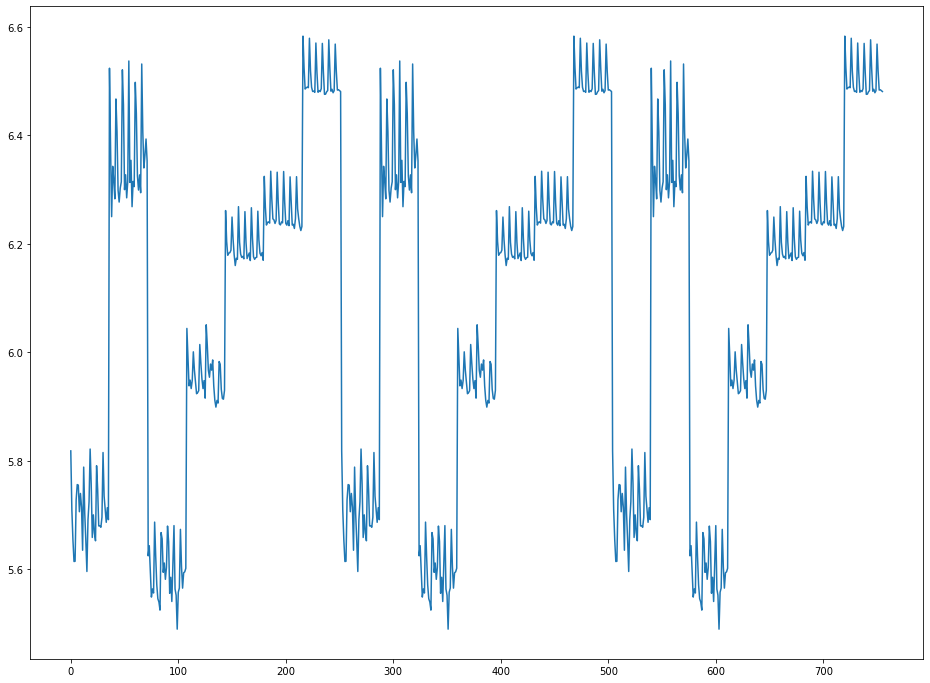

In [550]:
plt.plot(wyniki)

In [613]:
#zagęszczone wyniki
wyniki_1 = []
for i in range(len(kara_1[0])):
    wyniki_1.append(kara_1[0][i]*2 +kara_1[3][i]*2 +kara_1[6][i]*1.5 + kara_1[9][i]* 0.5 +kara_1[12][i]* 3 +kara_1[15][i]* 3)

In [614]:
a_list_1 = nsmallest(40, wyniki_1)

In [617]:
#for j in range(0, len(a_list_1), 3):
for j in range(0, len(a_list_1)):
    indices = []
    for i in range(len(wyniki_1)):
        if wyniki_1[i] == a_list_1[j]:
            indices.append(i)
    print(indices)
    for i1 in indices:
        print(param1[i1])

[22]
[0.95, 0.3, 2, 2]
[21]
[0.95, 0.3, 2, 1]
[18]
[0.95, 0.3, 0.1, 1]
[23]
[0.95, 0.3, 2, 5]
[20]
[0.95, 0.3, 0.1, 5]
[29]
[0.95, 0.35, 2, 5]
[27]
[0.95, 0.35, 2, 1]
[19]
[0.95, 0.3, 0.1, 2]
[25]
[0.95, 0.35, 0.1, 2]
[28]
[0.95, 0.35, 2, 2]
[24]
[0.95, 0.35, 0.1, 1]
[9]
[0.95, 0.2, 2, 1]
[13]
[0.95, 0.25, 0.1, 2]
[26]
[0.95, 0.35, 0.1, 5]
[12]
[0.95, 0.25, 0.1, 1]
[14]
[0.95, 0.25, 0.1, 5]
[15]
[0.95, 0.25, 2, 1]
[17]
[0.95, 0.25, 2, 5]
[16]
[0.95, 0.25, 2, 2]
[8]
[0.95, 0.2, 0.1, 5]
[7]
[0.95, 0.2, 0.1, 2]
[6]
[0.95, 0.2, 0.1, 1]
[10]
[0.95, 0.2, 2, 2]
[11]
[0.95, 0.2, 2, 5]
[5]
[0.95, 0.15, 2, 5]
[3]
[0.95, 0.15, 2, 1]
[1]
[0.95, 0.15, 0.1, 2]
[4]
[0.95, 0.15, 2, 2]
[2]
[0.95, 0.15, 0.1, 5]
[0]
[0.95, 0.15, 0.1, 1]


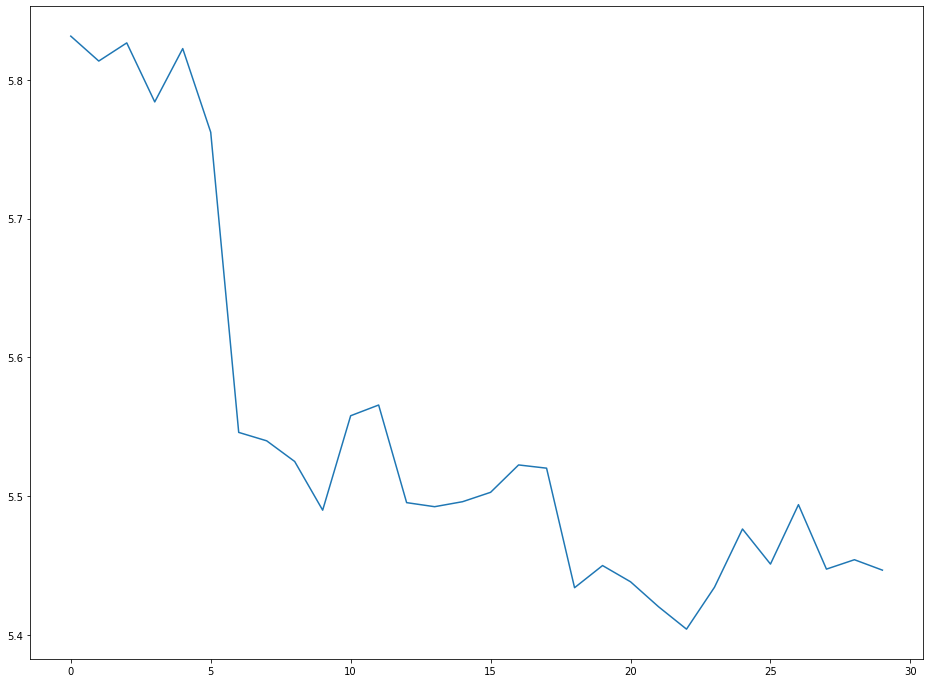

In [616]:
plt.plot(wyniki_1)

In [618]:
param1

[[0.95, 0.15, 0.1, 1],
 [0.95, 0.15, 0.1, 2],
 [0.95, 0.15, 0.1, 5],
 [0.95, 0.15, 2, 1],
 [0.95, 0.15, 2, 2],
 [0.95, 0.15, 2, 5],
 [0.95, 0.2, 0.1, 1],
 [0.95, 0.2, 0.1, 2],
 [0.95, 0.2, 0.1, 5],
 [0.95, 0.2, 2, 1],
 [0.95, 0.2, 2, 2],
 [0.95, 0.2, 2, 5],
 [0.95, 0.25, 0.1, 1],
 [0.95, 0.25, 0.1, 2],
 [0.95, 0.25, 0.1, 5],
 [0.95, 0.25, 2, 1],
 [0.95, 0.25, 2, 2],
 [0.95, 0.25, 2, 5],
 [0.95, 0.3, 0.1, 1],
 [0.95, 0.3, 0.1, 2],
 [0.95, 0.3, 0.1, 5],
 [0.95, 0.3, 2, 1],
 [0.95, 0.3, 2, 2],
 [0.95, 0.3, 2, 5],
 [0.95, 0.35, 0.1, 1],
 [0.95, 0.35, 0.1, 2],
 [0.95, 0.35, 0.1, 5],
 [0.95, 0.35, 2, 1],
 [0.95, 0.35, 2, 2],
 [0.95, 0.35, 2, 5]]

In [ ]:
##########

In [ ]:
# changepoint_prior_scale najbardziej wpływa na różnice
# Warszawa - 0 - 8 mae
# Kraków - 9 -
# Wrocław - 0 - 8 - 30dni, mape dla krótszych 16 -
for i in range(8,int(len(koszt)),9):
    print(mape[i])

In [426]:
#0.05 >= cp  0.05 0.05 5 , 0.05 0.1 0.1, 0.05 0.1 0.5, 0.05 0.1 1, 0.05 0.5 1, 0.05 0.5 5, 0.05 1 0.05
#0.05 0.005 0.1, 0.05 0.1 5, 0.05 0.5 1
#
# 0.5 5 5 , 0.5 0.5 5, 0.05 5 5, 0.5 5 0.5, 0.5 5 0.1, 0.5 0.5 0.1, 0.5 0.05 0.5


In [427]:
def metrics(y, y_hat):
    koszt = 0
    for i in range(len(y)):
        #koszt += (y[i] - y_hat[i]) // 10 * 10 + ((y[i]- y_hat[i]) // 10 - 1) * 5
        koszt += math.floor(np.abs(y[i]-y_hat[i])) + (math.floor(np.abs(y[i]-y_hat[i])) // 10 ) * 5
    koszt = round(koszt * 30 / len(y), 4)
    mae = round(np.mean(np.abs(y - y_hat)), 4)
    rmse = round(np.sqrt(np.mean(np.square(y - y_hat))), 4)
    mape = round(np.mean(np.abs((y - y_hat)/y)*100), 4)
    max1 = round(np.max(np.abs(y - y_hat)), 4)
    print(mae)
    print(rmse)
    print(mape)
    print(max1)
    print(koszt)
    #print('\n')

In [439]:
def metrics(y, y_hat):
    koszt = 0
    for i in range(len(y)):
        #koszt += (y[i] - y_hat[i]) // 10 * 10 + ((y[i]- y_hat[i]) // 10 - 1) * 5
        koszt += math.floor(np.abs(y[i]-y_hat[i])) + (math.floor(np.abs(y[i]-y_hat[i])) // 10 ) * 5
    koszt = round(koszt * 30 / len(y), 4)
    #print(round(np.mean(np.abs(y - y_hat)), 4))
    #print(round(np.sqrt(np.mean(np.square(y - y_hat))), 4))
    #print(round(np.mean(np.abs((y - y_hat)/y)*100), 4))
    #print(round(np.max(np.abs(y - y_hat)), 4))
    #print(round(koszt * 30 / len(y), 4))
    return koszt
    #print('\n')

In [429]:
def metrics(y, y_hat):
    koszt = 0
    for i in range(len(y)):
        #koszt += (y[i] - y_hat[i]) // 10 * 10 + ((y[i]- y_hat[i]) // 10 - 1) * 5
        koszt += math.floor(np.abs(y[i]-y_hat[i])) + (math.floor(np.abs(y[i]-y_hat[i])) // 10 ) * 5
    print('MAE:', round(np.mean(np.abs(y - y_hat)), 4))
    print('RMSE:', round(np.sqrt(np.mean(np.square(y - y_hat))), 4))
    print('MAPE:', round(np.mean(np.abs((y - y_hat)/y)*100), 4))
    print('MAX:', round(np.max(np.abs(y - y_hat)), 4))
    print('koszt:', round(koszt * 30 / len(y), 4))



In [430]:
#do raportu tylko średnia i max tabela plus opis 
#przy najlepszych parametrach kilka predykcji, np. z dodaniem nowego sklepu
#Kare znormalizowac - kara / obrot miesieczny w danym miesiacu
#Jeden wskaznik dla danego miasta średnia(miasta, typy prognozy) , średnia(miast) - dla kazdej prognozy odzielnie

#przeszukanie trendów dla otwarcia danych sklepów
#wyniki wieloletnich zamówień


In [ ]:
#9.11, 25.06 - 12
#29.10, 27.08, 23.07, 29.01
